# Initial

In [3]:
from string import Template
from IPython.display import HTML, Javascript, display
from IPython.core.magic import register_line_magic, register_cell_magic, register_line_cell_magic

display(Javascript('''
// Load our libraries from a CDN instead of wherever this notebook is hosted.
require.config({
    paths: {
        'babel'     : 'https://unpkg.com/babel-standalone@6/babel.min',
        'react'     : 'https://unpkg.com/react@16/umd/react.production.min',
        'react-dom' : 'https://unpkg.com/react-dom@16/umd/react-dom.production.min'
    }
})
'''))

@register_cell_magic
def jsx(line, cell):
    display(Javascript((Template('''
        require(['babel', 'react', 'react-dom'], (Babel, React, ReactDOM) => {
            eval(Babel.transform($quoted_script, {presets: ['react']}).code)
        })
    ''').substitute(quoted_script=json.dumps(cell)))))
    
@register_cell_magic
def css(line, cell):
    display(HTML((Template("<style>$quoted_script</style>").substitute(quoted_script=cell))))

@register_cell_magic
def load_js(line, cell):
    for idx, js_file in enumerate(filter(None, line.split() + cell.split())):
        with open(js_file, encoding='utf-8') as f:
            print('Load[%d]: %s' % (idx, js_file))
            display(Javascript(f.read()))
            
@register_cell_magic
def load_css(line, cell):
    for idx, css_file in enumerate(filter(None, line.split() + cell.split())):
        with open(css_file, encoding='utf-8') as f:
            print('Load[%d]: %s' % (idx, css_file))
            display(HTML((Template("<style>$quoted_script</style>").substitute(quoted_script=f.read()))))
            
@register_line_cell_magic
def load_html(line, cell=""):
    for idx, html_file in enumerate(filter(None, line.split() + cell.split())):
        with open(html_file, encoding='utf-8') as f:
            print('Load[%d]: %s' % (idx, html_file))
            display(HTML(f.read()))

<IPython.core.display.Javascript object>

# React

In [1]:
%%javascript

require.config({
    paths: {
        'react'             : 'https://unpkg.com/react@16/umd/react.production.min',
        'react-dom'         : 'https://unpkg.com/react-dom@16/umd/react-dom.production.min',
//        'react'             : 'http://127.0.0.1:8888/files/react.production.min.js?token=a71d3a1475f5a8a0b5f88ae041e69bead47fa94f81f6bfac',
//        'react-dom'         : 'http://127.0.0.1:8888/files/react-dom.production.min.js?token=a71d3a1475f5a8a0b5f88ae041e69bead47fa94f81f6bfac',
        'react-grid-layout' : 'https://cdnjs.cloudflare.com/ajax/libs/react-grid-layout/0.16.6/react-grid-layout.min',
        'react-transition-group' : 'https://unpkg.com/react-transition-group@2.6.1/dist/react-transition-group.min',
        'reactstrap'        : 'https://cdnjs.cloudflare.com/ajax/libs/reactstrap/4.8.0/reactstrap.min',
        'antd'              : 'https://cdnjs.cloudflare.com/ajax/libs/antd/3.15.1/antd-with-locales.min'
    }
})

<IPython.core.display.Javascript object>

In [4]:
%%css

.react-grid-layout {
  position: relative;
  transition: height 200ms ease;
}
.react-grid-item {
  transition: all 200ms ease;
  transition-property: left, top;
  background: #EEE;
}
.react-grid-item.cssTransforms {
  transition-property: transform;
}
.react-grid-item.resizing {
  z-index: 1;
  will-change: width, height;
}

.react-grid-item.react-draggable-dragging {
  transition: none;
  z-index: 3;
  will-change: transform;
}

.react-grid-item.react-grid-placeholder {
  background: red;
  opacity: 0.2;
  transition-duration: 100ms;
  z-index: 2;
  -webkit-user-select: none;
  -moz-user-select: none;
  -ms-user-select: none;
  -o-user-select: none;
  user-select: none;
}

.react-grid-item > .react-resizable-handle {
  position: absolute;
  width: 20px;
  height: 20px;
  bottom: 0;
  right: 0;
  cursor: se-resize;
}

.react-grid-item > .react-resizable-handle::after {
  content: "";
  position: absolute;
  right: 3px;
  bottom: 3px;
  width: 5px;
  height: 5px;
  border-right: 2px solid rgba(0, 0, 0, 0.4);
  border-bottom: 2px solid rgba(0, 0, 0, 0.4);
}

Load[0]: ./css/antd@3.15.1.css



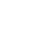

In [32]:
%%load_css
./css/antd@3.15.1.css

In [10]:
import ipywidgets as widgets
from traitlets import Unicode

class HelloWidget(widgets.DOMWidget):
    _view_name = Unicode('HelloView').tag(sync=True)
    _view_module = Unicode('hello').tag(sync=True)
    _view_module_version = Unicode('0.1.0').tag(sync=True)
    value = Unicode().tag(sync=True)
    def __init__(self, value, **kwargs):
        super(HelloWidget, self).__init__(**kwargs)
        self.value = value

In [5]:
%%jsx

require.undef('hello')
define("hello", [
    "@jupyter-widgets/base", 
    "react", 
    "react-dom", 
    "react-grid-layout",
    "reactstrap"
], function(widgets, React, ReactDOM, GridLayout, RS) {
  // React helper
  const e = React.createElement;
  var Button = RS.Button;
  var Container = RS.Container;
  var Row = RS.Row;
  var Col = RS.Col;
    
  // Backbone wrapper
  const HelloView = widgets.DOMWidgetView.extend({
    initialize() {
      const backbone = this;

      class Hello extends React.Component {
        constructor(props) {
          super(props);
          this.state = {
            value: backbone.model.get("value")
          };
        }

        onChange(model) {
          this.setState(model.changed);
        }

        componentDidMount() {
          backbone.listenTo(backbone.model, "change", this.onChange.bind(this));
        }

        render() {
          return e("h1", {}, `Hello ${this.state.value}`);
        }
      }
        
      class MyFirstGrid extends React.Component {
        
        constructor(props) {
          super(props);
          this.state = {
            value: backbone.model.get("value")
          };
        }

        onChange(model) {
          this.setState(model.changed);
        }

        componentDidMount() {
          backbone.listenTo(backbone.model, "change", this.onChange.bind(this));
        }
          
        render() {
          return (
              <Container>
                <Row>
                  <Col>.col</Col>
                </Row>
                <Row>
                  <Col>.col</Col>
                  <Col>.col</Col>
                  <Col>.col</Col>
                  <Col>.col</Col>
                </Row>
                <Row>
                  <Col xs="3">.col-3</Col>
                  <Col xs="auto">.col-auto - variable width content</Col>
                  <Col xs="3">.col-3</Col>
                </Row>
                <Row>
                  <Col xs="6">.col-6</Col>
                  <Col xs="6">.col-6</Col>
                </Row>
                <Row>
                  <Col xs="6" sm="4">.col-6 .col-sm-4</Col>
                  <Col xs="6" sm="4">.col-6 .col-sm-4</Col>
                  <Col sm="4">.col-sm-4</Col>
                </Row>
                <Row>
                  <Col sm={{ size: 6, order: 2, offset: 1 }}>.col-sm-6 .order-sm-2 .offset-sm-1</Col>
                </Row>
                <Row>
                  <Col sm="12" md={{ size: 6, offset: 3 }}>.col-sm-12 .col-md-6 .offset-md-3</Col>
                </Row>
                <Row>
                  <Col sm={{ size: 'auto', offset: 1 }}>.col-sm-auto .offset-sm-1</Col>
                  <Col sm={{ size: 'auto', offset: 1 }}>.col-sm-auto .offset-sm-1</Col>
                </Row>
              </Container>
          )
        }
      }  
        
      const $app = document.createElement("div");
      const App = e(MyFirstGrid);
      ReactDOM.render(App, $app);

      backbone.el.append($app);
    }
  });

  return {
    HelloView
  };
});

<IPython.core.display.Javascript object>

In [28]:
%%jsx

require.undef('hello')
define("hello", [
    "@jupyter-widgets/base", 
    "react", 
    "react-dom", 
    "antd"
], function(widgets, React, ReactDOM, ANTD) {
  // React helper
  const e = React.createElement;
  const Button = ANTD.Button;
  const DatePicker = ANTD.DatePicker;
  const { MonthPicker, RangePicker, WeekPicker } = DatePicker;
    
  // Backbone wrapper
  const HelloView = widgets.DOMWidgetView.extend({
    initialize() {
      const backbone = this;

      class Hello extends React.Component {
        constructor(props) {
          super(props);
          this.state = {
            value: backbone.model.get("value")
          };
        }

        onChange(model) {
          this.setState(model.changed);
        }

        componentDidMount() {
          backbone.listenTo(backbone.model, "change", this.onChange.bind(this));
        }

        render() {
          return e("h1", {}, `Hello ${this.state.value}`);
        }
      }
        
      class MyFirstGrid extends React.Component {
        
        constructor(props) {
          super(props);
          this.state = {
            value: backbone.model.get("value")
          };
        }

        onChange(model) {
          this.setState(model.changed);
        }

        componentDidMount() {
          backbone.listenTo(backbone.model, "change", this.onChange.bind(this));
        }
          
        render() {
          return (
            <div>
                <DatePicker />
                <br />
                <MonthPicker placeholder="Select month" />
                <br />
                <RangePicker />
                <br />
                <WeekPicker placeholder="Select week" />
              </div>
          )
        }
      }  
        
      const $app = document.createElement("div");
      const App = e(MyFirstGrid);
      ReactDOM.render(App, $app);

      backbone.el.append($app);
    }
  });

  return {
    HelloView
  };
});

<IPython.core.display.Javascript object>

In [29]:
w = HelloWidget(value="Test")
w

HelloWidget(value='Test')

In [7]:
%%html

<style>
#AAA div {
  border: 1px solid #000;
}
</style>

<div id="AAA">

<div class="row">
  <div class="col-md-1">.col-md-1</div>
  <div class="col-md-1">.col-md-1</div>
  <div class="col-md-1">.col-md-1</div>
  <div class="col-md-1">.col-md-1</div>
  <div class="col-md-1">.col-md-1</div>
  <div class="col-md-1">.col-md-1</div>
  <div class="col-md-1">.col-md-1</div>
  <div class="col-md-1">.col-md-1</div>
  <div class="col-md-1">.col-md-1</div>
  <div class="col-md-1">.col-md-1</div>
  <div class="col-md-1">.col-md-1</div>
  <div class="col-md-1">.col-md-1</div>
</div>
<div class="row">
  <div class="col-md-8">.col-md-8</div>
  <div class="col-md-4">.col-md-4</div>
</div>
<div class="row">
  <div class="col-md-4">.col-md-4</div>
  <div class="col-md-4">.col-md-4</div>
  <div class="col-md-4">.col-md-4</div>
</div>
<div class="row">
  <div class="col-md-6">.col-md-6</div>
  <div class="col-md-6">.col-md-6</div>
</div>

</div>

# Vue

In [1]:
import ipywidgets as widgets
from traitlets import Unicode

class HelloWidget(widgets.DOMWidget):
    _view_name = Unicode('HelloView').tag(sync=True)
    _view_module = Unicode('hello').tag(sync=True)
    _view_module_version = Unicode('0.1.0').tag(sync=True)
    value = Unicode().tag(sync=True)
    def __init__(self, value, **kwargs):
        super(HelloWidget, self).__init__(**kwargs)
        self.value = value

In [3]:
%%css

@charset "UTF-8";@font-face{font-family:element-icons;src:url(fonts/element-icons.woff) format("woff"),url(fonts/element-icons.ttf) format("truetype");font-weight:400;font-style:normal}[class*=" el-icon-"],[class^=el-icon-]{font-family:element-icons!important;speak:none;font-style:normal;font-weight:400;font-variant:normal;text-transform:none;line-height:1;vertical-align:baseline;display:inline-block;-webkit-font-smoothing:antialiased;-moz-osx-font-smoothing:grayscale}.el-icon-info:before{content:"\e61a"}.el-icon-error:before{content:"\e62c"}.el-icon-success:before{content:"\e62d"}.el-icon-warning:before{content:"\e62e"}.el-icon-question:before{content:"\e634"}.el-icon-back:before{content:"\e606"}.el-icon-arrow-left:before{content:"\e600"}.el-icon-arrow-down:before{content:"\e603"}.el-cascader-menu__item--extensible:after,.el-icon-arrow-right:before{content:"\e604"}.el-icon-arrow-up:before{content:"\e605"}.el-icon-caret-left:before{content:"\e60a"}.el-icon-caret-bottom:before{content:"\e60b"}.el-icon-caret-top:before{content:"\e60c"}.el-icon-caret-right:before{content:"\e60e"}.el-icon-d-arrow-left:before{content:"\e610"}.el-icon-d-arrow-right:before{content:"\e613"}.el-icon-minus:before{content:"\e621"}.el-icon-plus:before{content:"\e62b"}.el-icon-remove:before{content:"\e635"}.el-icon-circle-plus:before{content:"\e601"}.el-icon-remove-outline:before{content:"\e63c"}.el-icon-circle-plus-outline:before{content:"\e602"}.el-icon-close:before{content:"\e60f"}.el-icon-check:before{content:"\e611"}.el-icon-circle-close:before{content:"\e607"}.el-icon-circle-check:before{content:"\e639"}.el-icon-circle-close-outline:before{content:"\e609"}.el-icon-circle-check-outline:before{content:"\e63e"}.el-icon-zoom-out:before{content:"\e645"}.el-icon-zoom-in:before{content:"\e641"}.el-icon-d-caret:before{content:"\e615"}.el-icon-sort:before{content:"\e640"}.el-icon-sort-down:before{content:"\e630"}.el-icon-sort-up:before{content:"\e631"}.el-icon-tickets:before{content:"\e63f"}.el-icon-document:before{content:"\e614"}.el-icon-goods:before{content:"\e618"}.el-icon-sold-out:before{content:"\e63b"}.el-icon-news:before{content:"\e625"}.el-icon-message:before{content:"\e61b"}.el-icon-date:before{content:"\e608"}.el-icon-printer:before{content:"\e62f"}.el-icon-time:before{content:"\e642"}.el-icon-bell:before{content:"\e622"}.el-icon-mobile-phone:before{content:"\e624"}.el-icon-service:before{content:"\e63a"}.el-icon-view:before{content:"\e643"}.el-icon-menu:before{content:"\e620"}.el-icon-more:before{content:"\e646"}.el-icon-more-outline:before{content:"\e626"}.el-icon-star-on:before{content:"\e637"}.el-icon-star-off:before{content:"\e63d"}.el-icon-location:before{content:"\e61d"}.el-icon-location-outline:before{content:"\e61f"}.el-icon-phone:before{content:"\e627"}.el-icon-phone-outline:before{content:"\e628"}.el-icon-picture:before{content:"\e629"}.el-icon-picture-outline:before{content:"\e62a"}.el-icon-delete:before{content:"\e612"}.el-icon-search:before{content:"\e619"}.el-icon-edit:before{content:"\e61c"}.el-icon-edit-outline:before{content:"\e616"}.el-icon-rank:before{content:"\e632"}.el-icon-refresh:before{content:"\e633"}.el-icon-share:before{content:"\e636"}.el-icon-setting:before{content:"\e638"}.el-icon-upload:before{content:"\e60d"}.el-icon-upload2:before{content:"\e644"}.el-icon-download:before{content:"\e617"}.el-icon-loading:before{content:"\e61e"}.el-icon-loading{-webkit-animation:rotating 2s linear infinite;animation:rotating 2s linear infinite}.el-icon--right{margin-left:5px}.el-icon--left{margin-right:5px}@-webkit-keyframes rotating{0%{-webkit-transform:rotateZ(0);transform:rotateZ(0)}100%{-webkit-transform:rotateZ(360deg);transform:rotateZ(360deg)}}@keyframes rotating{0%{-webkit-transform:rotateZ(0);transform:rotateZ(0)}100%{-webkit-transform:rotateZ(360deg);transform:rotateZ(360deg)}}.el-pagination{white-space:nowrap;padding:2px 5px;color:#303133;font-weight:700}.el-pagination::after,.el-pagination::before{display:table;content:""}.el-pagination::after{clear:both}.el-pagination button,.el-pagination span:not([class*=suffix]){display:inline-block;font-size:13px;min-width:35.5px;height:28px;line-height:28px;vertical-align:top;-webkit-box-sizing:border-box;box-sizing:border-box}.el-pager li,.el-pagination__editor{-webkit-box-sizing:border-box;text-align:center}.el-pagination .el-input__inner{text-align:center;-moz-appearance:textfield;line-height:normal}.el-pagination .el-input__suffix{right:0;-webkit-transform:scale(.8);transform:scale(.8)}.el-pagination .el-select .el-input{width:100px;margin:0 5px}.el-pagination .el-select .el-input .el-input__inner{padding-right:25px;border-radius:3px}.el-pagination button{border:none;padding:0 6px;background:0 0}.el-pagination button:focus{outline:0}.el-pagination button:hover{color:#409EFF}.el-pagination button:disabled{color:#C0C4CC;background-color:#FFF;cursor:not-allowed}.el-pagination .btn-next,.el-pagination .btn-prev{background:center center no-repeat #FFF;background-size:16px;cursor:pointer;margin:0;color:#303133}.el-pagination .btn-next .el-icon,.el-pagination .btn-prev .el-icon{display:block;font-size:12px;font-weight:700}.el-pagination .btn-prev{padding-right:12px}.el-pagination .btn-next{padding-left:12px}.el-pagination .el-pager li.disabled{color:#C0C4CC;cursor:not-allowed}.el-pagination--small .btn-next,.el-pagination--small .btn-prev,.el-pagination--small .el-pager li,.el-pagination--small .el-pager li.btn-quicknext,.el-pagination--small .el-pager li.btn-quickprev,.el-pagination--small .el-pager li:last-child{border-color:transparent;font-size:12px;line-height:22px;height:22px;min-width:22px}.el-pagination--small .arrow.disabled{visibility:hidden}.el-pagination--small .more::before,.el-pagination--small li.more::before{line-height:24px}.el-pagination--small button,.el-pagination--small span:not([class*=suffix]){height:22px;line-height:22px}.el-pagination--small .el-pagination__editor,.el-pagination--small .el-pagination__editor.el-input .el-input__inner{height:22px}.el-pagination__sizes{margin:0 10px 0 0;font-weight:400;color:#606266}.el-pagination__sizes .el-input .el-input__inner{font-size:13px;padding-left:8px}.el-pagination__sizes .el-input .el-input__inner:hover{border-color:#409EFF}.el-pagination__total{margin-right:10px;font-weight:400;color:#606266}.el-pagination__jump{margin-left:24px;font-weight:400;color:#606266}.el-pagination__jump .el-input__inner{padding:0 3px}.el-pagination__rightwrapper{float:right}.el-pagination__editor{line-height:18px;padding:0 2px;height:28px;margin:0 2px;box-sizing:border-box;border-radius:3px}.el-pagination__editor.el-input{width:50px}.el-pagination__editor.el-input .el-input__inner{height:28px}.el-pagination__editor .el-input__inner::-webkit-inner-spin-button,.el-pagination__editor .el-input__inner::-webkit-outer-spin-button{-webkit-appearance:none;margin:0}.el-pagination.is-background .btn-next,.el-pagination.is-background .btn-prev,.el-pagination.is-background .el-pager li{margin:0 5px;background-color:#f4f4f5;color:#606266;min-width:30px;border-radius:2px}.el-pagination.is-background .btn-next.disabled,.el-pagination.is-background .btn-next:disabled,.el-pagination.is-background .btn-prev.disabled,.el-pagination.is-background .btn-prev:disabled,.el-pagination.is-background .el-pager li.disabled{color:#C0C4CC}.el-pagination.is-background .btn-next,.el-pagination.is-background .btn-prev{padding:0}.el-pagination.is-background .el-pager li:not(.disabled):hover{color:#409EFF}.el-pagination.is-background .el-pager li:not(.disabled).active{background-color:#409EFF;color:#FFF}.el-pagination.is-background.el-pagination--small .btn-next,.el-pagination.is-background.el-pagination--small .btn-prev,.el-pagination.is-background.el-pagination--small .el-pager li{margin:0 3px;min-width:22px}.el-pager,.el-pager li{vertical-align:top;margin:0;display:inline-block}.el-pager{-webkit-user-select:none;-moz-user-select:none;-ms-user-select:none;user-select:none;list-style:none;font-size:0;padding:0}.el-pager .more::before{line-height:30px}.el-pager li{padding:0 4px;background:#FFF;font-size:13px;min-width:35.5px;height:28px;line-height:28px;cursor:pointer;box-sizing:border-box}.el-pager li.btn-quicknext,.el-pager li.btn-quickprev{line-height:28px;color:#303133}.el-pager li.btn-quicknext.disabled,.el-pager li.btn-quickprev.disabled{color:#C0C4CC}.el-pager li.btn-quicknext:hover,.el-pager li.btn-quickprev:hover{cursor:pointer}.el-pager li.active+li{border-left:0}.el-pager li:hover{color:#409EFF}.el-pager li.active{color:#409EFF;cursor:default}@-webkit-keyframes v-modal-in{0%{opacity:0}}@-webkit-keyframes v-modal-out{100%{opacity:0}}.el-dialog{position:relative;margin:0 auto 50px;background:#FFF;border-radius:2px;-webkit-box-shadow:0 1px 3px rgba(0,0,0,.3);box-shadow:0 1px 3px rgba(0,0,0,.3);-webkit-box-sizing:border-box;box-sizing:border-box;width:50%}.el-dialog.is-fullscreen{width:100%;margin-top:0;margin-bottom:0;height:100%;overflow:auto}.el-dialog__wrapper{position:fixed;top:0;right:0;bottom:0;left:0;overflow:auto;margin:0}.el-dialog__header{padding:20px 20px 10px}.el-dialog__headerbtn{position:absolute;top:20px;right:20px;padding:0;background:0 0;border:none;outline:0;cursor:pointer;font-size:16px}.el-dialog__headerbtn .el-dialog__close{color:#909399}.el-dialog__headerbtn:focus .el-dialog__close,.el-dialog__headerbtn:hover .el-dialog__close{color:#409EFF}.el-dialog__title{line-height:24px;font-size:18px;color:#303133}.el-dialog__body{padding:30px 20px;color:#606266;font-size:14px}.el-dialog__footer{padding:10px 20px 20px;text-align:right;-webkit-box-sizing:border-box;box-sizing:border-box}.el-dialog--center{text-align:center}.el-dialog--center .el-dialog__body{text-align:initial;padding:25px 25px 30px}.el-dialog--center .el-dialog__footer{text-align:inherit}.dialog-fade-enter-active{-webkit-animation:dialog-fade-in .3s;animation:dialog-fade-in .3s}.dialog-fade-leave-active{-webkit-animation:dialog-fade-out .3s;animation:dialog-fade-out .3s}@-webkit-keyframes dialog-fade-in{0%{-webkit-transform:translate3d(0,-20px,0);transform:translate3d(0,-20px,0);opacity:0}100%{-webkit-transform:translate3d(0,0,0);transform:translate3d(0,0,0);opacity:1}}@keyframes dialog-fade-in{0%{-webkit-transform:translate3d(0,-20px,0);transform:translate3d(0,-20px,0);opacity:0}100%{-webkit-transform:translate3d(0,0,0);transform:translate3d(0,0,0);opacity:1}}@-webkit-keyframes dialog-fade-out{0%{-webkit-transform:translate3d(0,0,0);transform:translate3d(0,0,0);opacity:1}100%{-webkit-transform:translate3d(0,-20px,0);transform:translate3d(0,-20px,0);opacity:0}}@keyframes dialog-fade-out{0%{-webkit-transform:translate3d(0,0,0);transform:translate3d(0,0,0);opacity:1}100%{-webkit-transform:translate3d(0,-20px,0);transform:translate3d(0,-20px,0);opacity:0}}.el-autocomplete{position:relative;display:inline-block}.el-autocomplete-suggestion{margin:5px 0;-webkit-box-shadow:0 2px 12px 0 rgba(0,0,0,.1);box-shadow:0 2px 12px 0 rgba(0,0,0,.1);border-radius:4px;border:1px solid #E4E7ED;-webkit-box-sizing:border-box;box-sizing:border-box;background-color:#FFF}.el-autocomplete-suggestion__wrap{max-height:280px;padding:10px 0;-webkit-box-sizing:border-box;box-sizing:border-box}.el-autocomplete-suggestion__list{margin:0;padding:0}.el-autocomplete-suggestion li{padding:0 20px;margin:0;line-height:34px;cursor:pointer;color:#606266;font-size:14px;list-style:none;white-space:nowrap;overflow:hidden;text-overflow:ellipsis}.el-autocomplete-suggestion li.highlighted,.el-autocomplete-suggestion li:hover{background-color:#f5f7fa}.el-autocomplete-suggestion li.divider{margin-top:6px;border-top:1px solid #000}.el-autocomplete-suggestion li.divider:last-child{margin-bottom:-6px}.el-autocomplete-suggestion.is-loading li{text-align:center;height:100px;line-height:100px;font-size:20px;color:#999}.el-autocomplete-suggestion.is-loading li::after{display:inline-block;content:"";height:100%;vertical-align:middle}.el-autocomplete-suggestion.is-loading li:hover{background-color:#FFF}.el-autocomplete-suggestion.is-loading .el-icon-loading{vertical-align:middle}.el-dropdown{display:inline-block;position:relative;color:#606266;font-size:14px}.el-dropdown .el-button-group{display:block}.el-dropdown .el-button-group .el-button{float:none}.el-dropdown .el-dropdown__caret-button{padding-left:5px;padding-right:5px;position:relative;border-left:none}.el-dropdown .el-dropdown__caret-button::before{content:'';position:absolute;display:block;width:1px;top:5px;bottom:5px;left:0;background:rgba(255,255,255,.5)}.el-dropdown .el-dropdown__caret-button:hover::before{top:0;bottom:0}.el-dropdown .el-dropdown__caret-button .el-dropdown__icon{padding-left:0}.el-dropdown__icon{font-size:12px;margin:0 3px}.el-dropdown .el-dropdown-selfdefine:focus:active,.el-dropdown .el-dropdown-selfdefine:focus:not(.focusing){outline-width:0}.el-dropdown-menu{position:absolute;top:0;left:0;z-index:10;padding:10px 0;margin:5px 0;background-color:#FFF;border:1px solid #EBEEF5;border-radius:4px;-webkit-box-shadow:0 2px 12px 0 rgba(0,0,0,.1);box-shadow:0 2px 12px 0 rgba(0,0,0,.1);max-height:400px;overflow:auto}.el-dropdown-menu__item{list-style:none;line-height:36px;padding:0 20px;margin:0;font-size:14px;color:#606266;cursor:pointer;outline:0}.el-dropdown-menu__item:focus,.el-dropdown-menu__item:not(.is-disabled):hover{background-color:#ecf5ff;color:#66b1ff}.el-dropdown-menu__item i{margin-right:5px}.el-dropdown-menu__item--divided{position:relative;margin-top:6px;border-top:1px solid #EBEEF5}.el-dropdown-menu__item--divided:before{content:'';height:6px;display:block;margin:0 -20px;background-color:#FFF}.el-dropdown-menu__item.is-disabled{cursor:default;color:#bbb;pointer-events:none}.el-dropdown-menu--medium{padding:6px 0}.el-dropdown-menu--medium .el-dropdown-menu__item{line-height:30px;padding:0 17px;font-size:14px}.el-dropdown-menu--medium .el-dropdown-menu__item.el-dropdown-menu__item--divided{margin-top:6px}.el-dropdown-menu--medium .el-dropdown-menu__item.el-dropdown-menu__item--divided:before{height:6px;margin:0 -17px}.el-dropdown-menu--small{padding:6px 0}.el-dropdown-menu--small .el-dropdown-menu__item{line-height:27px;padding:0 15px;font-size:13px}.el-dropdown-menu--small .el-dropdown-menu__item.el-dropdown-menu__item--divided{margin-top:4px}.el-dropdown-menu--small .el-dropdown-menu__item.el-dropdown-menu__item--divided:before{height:4px;margin:0 -15px}.el-dropdown-menu--mini{padding:3px 0}.el-dropdown-menu--mini .el-dropdown-menu__item{line-height:24px;padding:0 10px;font-size:12px}.el-dropdown-menu--mini .el-dropdown-menu__item.el-dropdown-menu__item--divided{margin-top:3px}.el-dropdown-menu--mini .el-dropdown-menu__item.el-dropdown-menu__item--divided:before{height:3px;margin:0 -10px}.el-menu{border-right:solid 1px #e6e6e6;list-style:none;position:relative;margin:0;padding-left:0;background-color:#FFF}.el-menu--horizontal>.el-menu-item:not(.is-disabled):focus,.el-menu--horizontal>.el-menu-item:not(.is-disabled):hover,.el-menu--horizontal>.el-submenu .el-submenu__title:hover{background-color:#fff}.el-menu::after,.el-menu::before{display:table;content:""}.el-breadcrumb__item:last-child .el-breadcrumb__separator,.el-menu--collapse>.el-menu-item .el-submenu__icon-arrow,.el-menu--collapse>.el-submenu>.el-submenu__title .el-submenu__icon-arrow{display:none}.el-menu::after{clear:both}.el-menu.el-menu--horizontal{border-bottom:solid 1px #e6e6e6}.el-menu--horizontal{border-right:none}.el-menu--horizontal>.el-menu-item{float:left;height:60px;line-height:60px;margin:0;border-bottom:2px solid transparent;color:#909399}.el-menu--horizontal>.el-menu-item a,.el-menu--horizontal>.el-menu-item a:hover{color:inherit}.el-menu--horizontal>.el-submenu{float:left}.el-menu--horizontal>.el-submenu:focus,.el-menu--horizontal>.el-submenu:hover{outline:0}.el-menu--horizontal>.el-submenu:focus .el-submenu__title,.el-menu--horizontal>.el-submenu:hover .el-submenu__title{color:#303133}.el-menu--horizontal>.el-submenu.is-active .el-submenu__title{border-bottom:2px solid #409EFF;color:#303133}.el-menu--horizontal>.el-submenu .el-submenu__title{height:60px;line-height:60px;border-bottom:2px solid transparent;color:#909399}.el-menu--horizontal>.el-submenu .el-submenu__icon-arrow{position:static;vertical-align:middle;margin-left:8px;margin-top:-3px}.el-menu--horizontal .el-menu .el-menu-item,.el-menu--horizontal .el-menu .el-submenu__title{background-color:#FFF;float:none;height:36px;line-height:36px;padding:0 10px;color:#909399}.el-menu--horizontal .el-menu .el-menu-item.is-active,.el-menu--horizontal .el-menu .el-submenu.is-active>.el-submenu__title{color:#303133}.el-menu--horizontal .el-menu-item:not(.is-disabled):focus,.el-menu--horizontal .el-menu-item:not(.is-disabled):hover{outline:0;color:#303133}.el-menu--horizontal>.el-menu-item.is-active{border-bottom:2px solid #409EFF;color:#303133}.el-menu--collapse{width:64px}.el-menu--collapse>.el-menu-item [class^=el-icon-],.el-menu--collapse>.el-submenu>.el-submenu__title [class^=el-icon-]{margin:0;vertical-align:middle;width:24px;text-align:center}.el-menu--collapse>.el-menu-item span,.el-menu--collapse>.el-submenu>.el-submenu__title span{height:0;width:0;overflow:hidden;visibility:hidden;display:inline-block}.el-menu-item,.el-submenu__title{height:56px;line-height:56px;list-style:none}.el-menu--collapse>.el-menu-item.is-active i{color:inherit}.el-menu--collapse .el-menu .el-submenu{min-width:200px}.el-menu--collapse .el-submenu{position:relative}.el-menu--collapse .el-submenu .el-menu{position:absolute;margin-left:5px;top:0;left:100%;z-index:10;border:1px solid #E4E7ED;border-radius:2px;-webkit-box-shadow:0 2px 12px 0 rgba(0,0,0,.1);box-shadow:0 2px 12px 0 rgba(0,0,0,.1)}.el-menu--collapse .el-submenu.is-opened>.el-submenu__title .el-submenu__icon-arrow{-webkit-transform:none;transform:none}.el-menu--popup{z-index:100;min-width:200px;border:none;padding:5px 0;border-radius:2px;-webkit-box-shadow:0 2px 12px 0 rgba(0,0,0,.1);box-shadow:0 2px 12px 0 rgba(0,0,0,.1)}.el-menu--popup-bottom-start{margin-top:5px}.el-menu--popup-right-start{margin-left:5px;margin-right:5px}.el-menu-item{font-size:14px;color:#303133;padding:0 20px;cursor:pointer;position:relative;-webkit-transition:border-color .3s,background-color .3s,color .3s;transition:border-color .3s,background-color .3s,color .3s;-webkit-box-sizing:border-box;box-sizing:border-box;white-space:nowrap}.el-menu-item *{vertical-align:middle}.el-menu-item i{color:#909399}.el-menu-item:focus,.el-menu-item:hover{outline:0;background-color:#ecf5ff}.el-menu-item.is-disabled{opacity:.25;cursor:not-allowed;background:0 0!important}.el-radio,.el-submenu__title{cursor:pointer;position:relative;white-space:nowrap}.el-menu-item [class^=el-icon-]{margin-right:5px;width:24px;text-align:center;font-size:18px;vertical-align:middle}.el-menu-item.is-active{color:#409EFF}.el-menu-item.is-active i{color:inherit}.el-submenu{list-style:none;margin:0;padding-left:0}.el-submenu__title{font-size:14px;color:#303133;padding:0 20px;-webkit-transition:border-color .3s,background-color .3s,color .3s;transition:border-color .3s,background-color .3s,color .3s;-webkit-box-sizing:border-box;box-sizing:border-box}.el-submenu__title *{vertical-align:middle}.el-submenu__title i{color:#909399}.el-submenu__title:focus,.el-submenu__title:hover{outline:0;background-color:#ecf5ff}.el-submenu__title.is-disabled{opacity:.25;cursor:not-allowed;background:0 0!important}.el-submenu__title:hover{background-color:#ecf5ff}.el-submenu .el-menu{border:none}.el-submenu .el-menu-item{height:50px;line-height:50px;padding:0 45px;min-width:200px}.el-submenu__icon-arrow{position:absolute;top:50%;right:20px;margin-top:-7px;-webkit-transition:-webkit-transform .3s;transition:-webkit-transform .3s;transition:transform .3s;transition:transform .3s,-webkit-transform .3s;font-size:12px}.el-submenu.is-active .el-submenu__title{border-bottom-color:#409EFF}.el-submenu.is-opened>.el-submenu__title .el-submenu__icon-arrow{-webkit-transform:rotateZ(180deg);transform:rotateZ(180deg)}.el-submenu.is-disabled .el-menu-item,.el-submenu.is-disabled .el-submenu__title{opacity:.25;cursor:not-allowed;background:0 0!important}.el-radio__input.is-disabled .el-radio__inner,.el-radio__input.is-disabled.is-checked .el-radio__inner{background-color:#f5f7fa;border-color:#E4E7ED}.el-submenu [class^=el-icon-]{vertical-align:middle;margin-right:5px;width:24px;text-align:center;font-size:18px}.el-menu-item-group>ul{padding:0}.el-menu-item-group__title{padding:7px 0 7px 20px;line-height:normal;font-size:12px;color:#909399}.el-radio,.el-radio--medium.is-bordered .el-radio__label{font-size:14px}.horizontal-collapse-transition .el-submenu__title .el-submenu__icon-arrow{-webkit-transition:.2s;transition:.2s;opacity:0}.el-radio{color:#606266;font-weight:500;line-height:1;display:inline-block;outline:0;margin-right:30px;-moz-user-select:none;-webkit-user-select:none;-ms-user-select:none}.el-radio.is-bordered{padding:12px 20px 0 10px;border-radius:4px;border:1px solid #DCDFE6;-webkit-box-sizing:border-box;box-sizing:border-box;height:40px}.el-radio.is-bordered.is-checked{border-color:#409EFF}.el-radio.is-bordered.is-disabled{cursor:not-allowed;border-color:#EBEEF5}.el-radio.is-bordered+.el-radio.is-bordered{margin-left:10px}.el-radio--medium.is-bordered{padding:10px 20px 0 10px;border-radius:4px;height:36px}.el-radio--mini.is-bordered .el-radio__label,.el-radio--small.is-bordered .el-radio__label{font-size:12px}.el-radio--medium.is-bordered .el-radio__inner{height:14px;width:14px}.el-radio--small.is-bordered{padding:8px 15px 0 10px;border-radius:3px;height:32px}.el-radio--small.is-bordered .el-radio__inner{height:12px;width:12px}.el-radio--mini.is-bordered{padding:6px 15px 0 10px;border-radius:3px;height:28px}.el-radio--mini.is-bordered .el-radio__inner{height:12px;width:12px}.el-radio:last-child{margin-right:0}.el-radio__input{white-space:nowrap;cursor:pointer;outline:0;display:inline-block;line-height:1;position:relative;vertical-align:middle}.el-radio__input.is-disabled .el-radio__inner{cursor:not-allowed}.el-radio__input.is-disabled .el-radio__inner::after{cursor:not-allowed;background-color:#f5f7fa}.el-radio__input.is-disabled .el-radio__inner+.el-radio__label{cursor:not-allowed}.el-radio__input.is-disabled.is-checked .el-radio__inner::after{background-color:#C0C4CC}.el-radio__input.is-disabled+span.el-radio__label{color:#C0C4CC;cursor:not-allowed}.el-radio-button__inner,.el-radio__inner{-webkit-box-sizing:border-box;cursor:pointer}.el-radio__input.is-checked .el-radio__inner{border-color:#409EFF;background:#409EFF}.el-radio__input.is-checked .el-radio__inner::after{-webkit-transform:translate(-50%,-50%) scale(1);transform:translate(-50%,-50%) scale(1)}.el-radio__input.is-checked+.el-radio__label{color:#409EFF}.el-radio__input.is-focus .el-radio__inner{border-color:#409EFF}.el-radio__inner{border:1px solid #DCDFE6;border-radius:100%;width:14px;height:14px;background-color:#FFF;position:relative;display:inline-block;box-sizing:border-box}.el-radio__inner:hover{border-color:#409EFF}.el-radio__inner::after{width:4px;height:4px;border-radius:100%;background-color:#FFF;content:"";position:absolute;left:50%;top:50%;-webkit-transform:translate(-50%,-50%) scale(0);transform:translate(-50%,-50%) scale(0);-webkit-transition:-webkit-transform .15s ease-in;transition:-webkit-transform .15s ease-in;transition:transform .15s ease-in;transition:transform .15s ease-in,-webkit-transform .15s ease-in}.el-radio__original{opacity:0;outline:0;position:absolute;z-index:-1;top:0;left:0;right:0;bottom:0;margin:0}.el-radio-button,.el-radio-button__inner{display:inline-block;position:relative;outline:0}.el-radio:focus:not(.is-focus):not(:active):not(.is-disabled) .el-radio__inner{-webkit-box-shadow:0 0 2px 2px #409EFF;box-shadow:0 0 2px 2px #409EFF}.el-radio__label{font-size:14px;padding-left:10px}.el-radio-group{display:inline-block;line-height:1;vertical-align:middle;font-size:0}.el-radio-button__inner{line-height:1;white-space:nowrap;vertical-align:middle;background:#FFF;border:1px solid #DCDFE6;font-weight:500;border-left:0;color:#606266;-webkit-appearance:none;text-align:center;box-sizing:border-box;margin:0;-webkit-transition:all .3s cubic-bezier(.645,.045,.355,1);transition:all .3s cubic-bezier(.645,.045,.355,1);padding:12px 20px;font-size:14px;border-radius:0}.el-switch,.el-table .caret-wrapper{display:-webkit-inline-box;vertical-align:middle}.el-radio-button__inner.is-round{padding:12px 20px}.el-radio-button__inner:hover{color:#409EFF}.el-radio-button__inner [class*=el-icon-]{line-height:.9}.el-radio-button__inner [class*=el-icon-]+span{margin-left:5px}.el-radio-button:first-child .el-radio-button__inner{border-left:1px solid #DCDFE6;border-radius:4px 0 0 4px;-webkit-box-shadow:none!important;box-shadow:none!important}.el-radio-button__orig-radio{opacity:0;outline:0;position:absolute;z-index:-1}.el-radio-button__orig-radio:checked+.el-radio-button__inner{color:#FFF;background-color:#409EFF;border-color:#409EFF;-webkit-box-shadow:-1px 0 0 0 #409EFF;box-shadow:-1px 0 0 0 #409EFF}.el-radio-button__orig-radio:disabled+.el-radio-button__inner{color:#C0C4CC;cursor:not-allowed;background-image:none;background-color:#FFF;border-color:#EBEEF5;-webkit-box-shadow:none;box-shadow:none}.el-radio-button__orig-radio:disabled:checked+.el-radio-button__inner{background-color:#F2F6FC}.el-radio-button:last-child .el-radio-button__inner{border-radius:0 4px 4px 0}.el-radio-button:first-child:last-child .el-radio-button__inner{border-radius:4px}.el-radio-button--medium .el-radio-button__inner{padding:10px 20px;font-size:14px;border-radius:0}.el-radio-button--medium .el-radio-button__inner.is-round{padding:10px 20px}.el-radio-button--small .el-radio-button__inner{padding:9px 15px;font-size:12px;border-radius:0}.el-radio-button--small .el-radio-button__inner.is-round{padding:9px 15px}.el-radio-button--mini .el-radio-button__inner{padding:7px 15px;font-size:12px;border-radius:0}.el-radio-button--mini .el-radio-button__inner.is-round{padding:7px 15px}.el-radio-button:focus:not(.is-focus):not(:active):not(.is-disabled){-webkit-box-shadow:0 0 2px 2px #409EFF;box-shadow:0 0 2px 2px #409EFF}.el-switch{display:-ms-inline-flexbox;display:inline-flex;-webkit-box-align:center;-ms-flex-align:center;align-items:center;position:relative;font-size:14px;line-height:20px;height:20px}.el-switch__core,.el-switch__label{display:inline-block;cursor:pointer}.el-switch.is-disabled .el-switch__core,.el-switch.is-disabled .el-switch__label{cursor:not-allowed}.el-switch__label{-webkit-transition:.2s;transition:.2s;height:20px;font-size:14px;font-weight:500;vertical-align:middle;color:#303133}.el-switch__label.is-active{color:#409EFF}.el-switch__label--left{margin-right:10px}.el-switch__label--right{margin-left:10px}.el-switch__label *{line-height:1;font-size:14px;display:inline-block}.el-switch__input{position:absolute;width:0;height:0;opacity:0;margin:0}.el-switch__core{margin:0;position:relative;width:40px;height:20px;border:1px solid #DCDFE6;outline:0;border-radius:10px;-webkit-box-sizing:border-box;box-sizing:border-box;background:#DCDFE6;-webkit-transition:border-color .3s,background-color .3s;transition:border-color .3s,background-color .3s;vertical-align:middle}.el-switch__core:after{content:"";position:absolute;top:1px;left:1px;border-radius:100%;-webkit-transition:all .3s;transition:all .3s;width:16px;height:16px;background-color:#FFF}.el-switch.is-checked .el-switch__core{border-color:#409EFF;background-color:#409EFF}.el-switch.is-checked .el-switch__core::after{left:100%;margin-left:-17px}.el-switch.is-disabled{opacity:.6}.el-switch--wide .el-switch__label.el-switch__label--left span{left:10px}.el-switch--wide .el-switch__label.el-switch__label--right span{right:10px}.el-switch .label-fade-enter,.el-switch .label-fade-leave-active{opacity:0}.el-select-dropdown{position:absolute;z-index:1001;border:1px solid #E4E7ED;border-radius:4px;background-color:#FFF;-webkit-box-shadow:0 2px 12px 0 rgba(0,0,0,.1);box-shadow:0 2px 12px 0 rgba(0,0,0,.1);-webkit-box-sizing:border-box;box-sizing:border-box;margin:5px 0}.el-select-dropdown.is-multiple .el-select-dropdown__item.selected{color:#409EFF;background-color:#FFF}.el-select-dropdown.is-multiple .el-select-dropdown__item.selected.hover{background-color:#f5f7fa}.el-select-dropdown.is-multiple .el-select-dropdown__item.selected::after{position:absolute;right:20px;font-family:element-icons;content:"\E611";font-size:12px;font-weight:700;-webkit-font-smoothing:antialiased;-moz-osx-font-smoothing:grayscale}.el-select-dropdown .el-scrollbar.is-empty .el-select-dropdown__list{padding:0}.el-select-dropdown__empty{padding:10px 0;margin:0;text-align:center;color:#999;font-size:14px}.el-select-dropdown__wrap{max-height:274px}.el-select-dropdown__list{list-style:none;padding:6px 0;margin:0;-webkit-box-sizing:border-box;box-sizing:border-box}.el-select-dropdown__item{font-size:14px;padding:0 20px;position:relative;white-space:nowrap;overflow:hidden;text-overflow:ellipsis;color:#606266;height:34px;line-height:34px;-webkit-box-sizing:border-box;box-sizing:border-box;cursor:pointer}.el-select .el-tag,.el-table{-webkit-box-sizing:border-box}.el-select-dropdown__item.is-disabled{color:#C0C4CC;cursor:not-allowed}.el-select-dropdown__item.is-disabled:hover{background-color:#FFF}.el-select-dropdown__item.hover,.el-select-dropdown__item:hover{background-color:#f5f7fa}.el-select-dropdown__item.selected{color:#409EFF;font-weight:700}.el-select-group{margin:0;padding:0}.el-select-group__wrap{position:relative;list-style:none;margin:0;padding:0}.el-select-group__wrap:not(:last-of-type){padding-bottom:24px}.el-select-group__wrap:not(:last-of-type)::after{content:'';position:absolute;display:block;left:20px;right:20px;bottom:12px;height:1px;background:#E4E7ED}.el-select-group__title{padding-left:20px;font-size:12px;color:#909399;line-height:30px}.el-select-group .el-select-dropdown__item{padding-left:20px}.el-select{display:inline-block;position:relative}.el-select .el-select__tags>span{display:contents}.el-select:hover .el-input__inner{border-color:#C0C4CC}.el-select .el-input__inner{cursor:pointer;padding-right:35px}.el-select .el-input__inner:focus{border-color:#409EFF}.el-select .el-input .el-select__caret{color:#C0C4CC;font-size:14px;-webkit-transition:-webkit-transform .3s;transition:-webkit-transform .3s;transition:transform .3s;transition:transform .3s,-webkit-transform .3s;-webkit-transform:rotateZ(180deg);transform:rotateZ(180deg);cursor:pointer}.el-select .el-input .el-select__caret.is-reverse{-webkit-transform:rotateZ(0);transform:rotateZ(0)}.el-select .el-input .el-select__caret.is-show-close{font-size:14px;text-align:center;-webkit-transform:rotateZ(180deg);transform:rotateZ(180deg);border-radius:100%;color:#C0C4CC;-webkit-transition:color .2s cubic-bezier(.645,.045,.355,1);transition:color .2s cubic-bezier(.645,.045,.355,1)}.el-select .el-input .el-select__caret.is-show-close:hover{color:#909399}.el-select .el-input.is-disabled .el-input__inner{cursor:not-allowed}.el-select .el-input.is-disabled .el-input__inner:hover{border-color:#E4E7ED}.el-range-editor.is-active,.el-range-editor.is-active:hover,.el-select .el-input.is-focus .el-input__inner{border-color:#409EFF}.el-select>.el-input{display:block}.el-select__input{border:none;outline:0;padding:0;margin-left:15px;color:#666;font-size:14px;-webkit-appearance:none;-moz-appearance:none;appearance:none;height:28px;background-color:transparent}.el-select__input.is-mini{height:14px}.el-select__close{cursor:pointer;position:absolute;top:8px;z-index:1000;right:25px;color:#C0C4CC;line-height:18px;font-size:14px}.el-select__close:hover{color:#909399}.el-select__tags{position:absolute;line-height:normal;white-space:normal;z-index:1;top:50%;-webkit-transform:translateY(-50%);transform:translateY(-50%);display:-webkit-box;display:-ms-flexbox;display:flex;-webkit-box-align:center;-ms-flex-align:center;align-items:center;-ms-flex-wrap:wrap;flex-wrap:wrap}.el-select .el-tag__close{margin-top:-2px}.el-select .el-tag{box-sizing:border-box;border-color:transparent;margin:2px 0 2px 6px;background-color:#f0f2f5}.el-select .el-tag__close.el-icon-close{background-color:#C0C4CC;right:-7px;top:0;color:#FFF}.el-select .el-tag__close.el-icon-close:hover{background-color:#909399}.el-table,.el-table__expanded-cell{background-color:#FFF}.el-select .el-tag__close.el-icon-close::before{display:block;-webkit-transform:translate(0,.5px);transform:translate(0,.5px)}.el-table{position:relative;overflow:hidden;box-sizing:border-box;-webkit-box-flex:1;-ms-flex:1;flex:1;width:100%;max-width:100%;font-size:14px;color:#606266}.el-table__empty-block{min-height:60px;text-align:center;width:100%;height:100%;display:-webkit-box;display:-ms-flexbox;display:flex;-webkit-box-pack:center;-ms-flex-pack:center;justify-content:center;-webkit-box-align:center;-ms-flex-align:center;align-items:center}.el-table__empty-text{line-height:60px;width:50%;color:#909399}.el-table__expand-column .cell{padding:0;text-align:center}.el-table__expand-icon{position:relative;cursor:pointer;color:#666;font-size:12px;-webkit-transition:-webkit-transform .2s ease-in-out;transition:-webkit-transform .2s ease-in-out;transition:transform .2s ease-in-out;transition:transform .2s ease-in-out,-webkit-transform .2s ease-in-out;height:20px}.el-table__expand-icon--expanded{-webkit-transform:rotate(90deg);transform:rotate(90deg)}.el-table__expand-icon>.el-icon{position:absolute;left:50%;top:50%;margin-left:-5px;margin-top:-5px}.el-table__expanded-cell[class*=cell]{padding:20px 50px}.el-table__expanded-cell:hover{background-color:transparent!important}.el-table--fit{border-right:0;border-bottom:0}.el-table--fit td.gutter,.el-table--fit th.gutter{border-right-width:1px}.el-table--scrollable-x .el-table__body-wrapper{overflow-x:auto}.el-table--scrollable-y .el-table__body-wrapper{overflow-y:auto}.el-table thead{color:#909399;font-weight:500}.el-table thead.is-group th{background:#f5f7fa}.el-table th,.el-table tr{background-color:#FFF}.el-table td,.el-table th{padding:12px 0;min-width:0;-webkit-box-sizing:border-box;box-sizing:border-box;text-overflow:ellipsis;vertical-align:middle;position:relative;text-align:left}.el-table td.is-center,.el-table th.is-center{text-align:center}.el-table td.is-right,.el-table th.is-right{text-align:right}.el-table td.gutter,.el-table th.gutter{width:15px;border-right-width:0;border-bottom-width:0;padding:0}.el-table td.is-hidden>*,.el-table th.is-hidden>*{visibility:hidden}.el-table--medium td,.el-table--medium th{padding:10px 0}.el-table--small{font-size:12px}.el-table--small td,.el-table--small th{padding:8px 0}.el-table--mini{font-size:12px}.el-table--mini td,.el-table--mini th{padding:6px 0}.el-table .cell,.el-table th div{padding-right:10px;overflow:hidden;text-overflow:ellipsis;padding-left:10px}.el-table tr input[type=checkbox]{margin:0}.el-table td,.el-table th.is-leaf{border-bottom:1px solid #EBEEF5}.el-table th.is-sortable{cursor:pointer}.el-table th{white-space:nowrap;overflow:hidden;-webkit-user-select:none;-moz-user-select:none;-ms-user-select:none;user-select:none}.el-date-table,.el-slider__button-wrapper,.el-time-panel{-moz-user-select:none;-ms-user-select:none}.el-table th div{display:inline-block;line-height:40px;-webkit-box-sizing:border-box;box-sizing:border-box;white-space:nowrap}.el-table th>.cell{position:relative;word-wrap:normal;text-overflow:ellipsis;display:inline-block;vertical-align:middle;width:100%;-webkit-box-sizing:border-box;box-sizing:border-box}.el-table th>.cell.highlight{color:#409EFF}.el-table th.required>div::before{display:inline-block;content:"";width:8px;height:8px;border-radius:50%;background:#ff4d51;margin-right:5px;vertical-align:middle}.el-table td div{-webkit-box-sizing:border-box;box-sizing:border-box}.el-table td.gutter{width:0}.el-table .cell{-webkit-box-sizing:border-box;box-sizing:border-box;white-space:normal;word-break:break-all;line-height:23px}.el-table .cell.el-tooltip{white-space:nowrap;min-width:50px}.el-table--border,.el-table--group{border:1px solid #EBEEF5}.el-table--border::after,.el-table--group::after,.el-table::before{content:'';position:absolute;background-color:#EBEEF5;z-index:1}.el-table--border::after,.el-table--group::after{top:0;right:0;width:1px;height:100%}.el-table::before{left:0;bottom:0;width:100%;height:1px}.el-table--border{border-right:none;border-bottom:none}.el-table--border.el-loading-parent--relative{border-color:transparent}.el-table--border td,.el-table--border th,.el-table__body-wrapper .el-table--border.is-scrolling-left~.el-table__fixed{border-right:1px solid #EBEEF5}.el-table--border td:first-child .cell,.el-table--border th:first-child .cell{padding-left:10px}.el-table--border th.gutter:last-of-type{border-bottom:1px solid #EBEEF5;border-bottom-width:1px}.el-table--border th,.el-table__fixed-right-patch{border-bottom:1px solid #EBEEF5}.el-table--hidden{visibility:hidden}.el-table__fixed,.el-table__fixed-right{position:absolute;top:0;left:0;overflow-x:hidden;overflow-y:hidden;-webkit-box-shadow:0 0 10px rgba(0,0,0,.12);box-shadow:0 0 10px rgba(0,0,0,.12)}.el-table__fixed-right::before,.el-table__fixed::before{content:'';position:absolute;left:0;bottom:0;width:100%;height:1px;background-color:#EBEEF5;z-index:4}.el-table__fixed-right-patch{position:absolute;top:-1px;right:0;background-color:#FFF}.el-table__fixed-right{top:0;left:auto;right:0}.el-table__fixed-right .el-table__fixed-body-wrapper,.el-table__fixed-right .el-table__fixed-footer-wrapper,.el-table__fixed-right .el-table__fixed-header-wrapper{left:auto;right:0}.el-table__fixed-header-wrapper{position:absolute;left:0;top:0;z-index:3}.el-table__fixed-footer-wrapper{position:absolute;left:0;bottom:0;z-index:3}.el-table__fixed-footer-wrapper tbody td{border-top:1px solid #EBEEF5;background-color:#f5f7fa;color:#606266}.el-table__fixed-body-wrapper{position:absolute;left:0;top:37px;overflow:hidden;z-index:3}.el-table__body-wrapper,.el-table__footer-wrapper,.el-table__header-wrapper{width:100%}.el-table__footer-wrapper{margin-top:-1px}.el-table__footer-wrapper td{border-top:1px solid #EBEEF5}.el-table__body,.el-table__footer,.el-table__header{table-layout:fixed;border-collapse:separate}.el-table__footer-wrapper,.el-table__header-wrapper{overflow:hidden}.el-table__footer-wrapper tbody td,.el-table__header-wrapper tbody td{background-color:#f5f7fa;color:#606266}.el-table__body-wrapper{overflow:hidden;position:relative}.el-table__body-wrapper.is-scrolling-left~.el-table__fixed,.el-table__body-wrapper.is-scrolling-none~.el-table__fixed,.el-table__body-wrapper.is-scrolling-none~.el-table__fixed-right,.el-table__body-wrapper.is-scrolling-right~.el-table__fixed-right{-webkit-box-shadow:none;box-shadow:none}.el-table__body-wrapper .el-table--border.is-scrolling-right~.el-table__fixed-right{border-left:1px solid #EBEEF5}.el-table .caret-wrapper{display:-ms-inline-flexbox;display:inline-flex;-webkit-box-orient:vertical;-webkit-box-direction:normal;-ms-flex-direction:column;flex-direction:column;-webkit-box-align:center;-ms-flex-align:center;align-items:center;height:34px;width:24px;cursor:pointer;overflow:initial;position:relative}.el-table .sort-caret{width:0;height:0;border:5px solid transparent;position:absolute;left:7px}.el-table .sort-caret.ascending{border-bottom-color:#C0C4CC;top:5px}.el-table .sort-caret.descending{border-top-color:#C0C4CC;bottom:7px}.el-table .ascending .sort-caret.ascending{border-bottom-color:#409EFF}.el-table .descending .sort-caret.descending{border-top-color:#409EFF}.el-table .hidden-columns{visibility:hidden;position:absolute;z-index:-1}.el-table--striped .el-table__body tr.el-table__row--striped td{background:#FAFAFA}.el-table--striped .el-table__body tr.el-table__row--striped.current-row td,.el-table__body tr.current-row>td,.el-table__body tr.hover-row.current-row>td,.el-table__body tr.hover-row.el-table__row--striped.current-row>td,.el-table__body tr.hover-row.el-table__row--striped>td,.el-table__body tr.hover-row>td{background-color:#ecf5ff}.el-table__column-resize-proxy{position:absolute;left:200px;top:0;bottom:0;width:0;border-left:1px solid #EBEEF5;z-index:10}.el-table__column-filter-trigger{display:inline-block;line-height:34px;cursor:pointer}.el-table__column-filter-trigger i{color:#909399;font-size:12px;-webkit-transform:scale(.75);transform:scale(.75)}.el-table--enable-row-transition .el-table__body td{-webkit-transition:background-color .25s ease;transition:background-color .25s ease}.el-table--enable-row-hover .el-table__body tr:hover>td{background-color:#f5f7fa}.el-table--fluid-height .el-table__fixed,.el-table--fluid-height .el-table__fixed-right{bottom:0;overflow:hidden}.el-table-column--selection .cell{padding-left:14px;padding-right:14px}.el-table-filter{border:1px solid #EBEEF5;border-radius:2px;background-color:#FFF;-webkit-box-shadow:0 2px 12px 0 rgba(0,0,0,.1);box-shadow:0 2px 12px 0 rgba(0,0,0,.1);-webkit-box-sizing:border-box;box-sizing:border-box;margin:2px 0}.el-table-filter__list{padding:5px 0;margin:0;list-style:none;min-width:100px}.el-table-filter__list-item{line-height:36px;padding:0 10px;cursor:pointer;font-size:14px}.el-table-filter__list-item:hover{background-color:#ecf5ff;color:#66b1ff}.el-table-filter__list-item.is-active{background-color:#409EFF;color:#FFF}.el-table-filter__content{min-width:100px}.el-table-filter__bottom{border-top:1px solid #EBEEF5;padding:8px}.el-table-filter__bottom button{background:0 0;border:none;color:#606266;cursor:pointer;font-size:13px;padding:0 3px}.el-date-table td.in-range div,.el-date-table td.in-range div:hover,.el-date-table.is-week-mode .el-date-table__row.current div,.el-date-table.is-week-mode .el-date-table__row:hover div{background-color:#F2F6FC}.el-table-filter__bottom button:hover{color:#409EFF}.el-table-filter__bottom button:focus{outline:0}.el-table-filter__bottom button.is-disabled{color:#C0C4CC;cursor:not-allowed}.el-table-filter__wrap{max-height:280px}.el-table-filter__checkbox-group{padding:10px}.el-table-filter__checkbox-group label.el-checkbox{display:block;margin-right:5px;margin-bottom:8px;margin-left:5px}.el-table-filter__checkbox-group .el-checkbox:last-child{margin-bottom:0}.el-date-table{font-size:12px;-webkit-user-select:none;user-select:none}.el-date-table.is-week-mode .el-date-table__row:hover td.available:hover{color:#606266}.el-date-table.is-week-mode .el-date-table__row:hover td:first-child div{margin-left:5px;border-top-left-radius:15px;border-bottom-left-radius:15px}.el-date-table.is-week-mode .el-date-table__row:hover td:last-child div{margin-right:5px;border-top-right-radius:15px;border-bottom-right-radius:15px}.el-date-table td{width:32px;height:30px;padding:4px 0;-webkit-box-sizing:border-box;box-sizing:border-box;text-align:center;cursor:pointer;position:relative}.el-date-table td div{height:30px;padding:3px 0;-webkit-box-sizing:border-box;box-sizing:border-box}.el-date-table td span{width:24px;height:24px;display:block;margin:0 auto;line-height:24px;position:absolute;left:50%;-webkit-transform:translateX(-50%);transform:translateX(-50%);border-radius:50%}.el-month-table td .cell,.el-year-table td .cell{width:48px;height:32px;display:block;line-height:32px}.el-date-table td.next-month,.el-date-table td.prev-month{color:#C0C4CC}.el-date-table td.today{position:relative}.el-date-table td.today span{color:#409EFF;font-weight:700}.el-date-table td.today.end-date span,.el-date-table td.today.start-date span{color:#FFF}.el-date-table td.available:hover{color:#409EFF}.el-date-table td.current:not(.disabled) span{color:#FFF;background-color:#409EFF}.el-date-table td.end-date div,.el-date-table td.start-date div{color:#FFF}.el-date-table td.end-date span,.el-date-table td.start-date span{background-color:#409EFF}.el-date-table td.start-date div{margin-left:5px;border-top-left-radius:15px;border-bottom-left-radius:15px}.el-date-table td.end-date div{margin-right:5px;border-top-right-radius:15px;border-bottom-right-radius:15px}.el-date-table td.disabled div{background-color:#f5f7fa;opacity:1;cursor:not-allowed;color:#C0C4CC}.el-date-table td.selected div{margin-left:5px;margin-right:5px;background-color:#F2F6FC;border-radius:15px}.el-date-table td.selected div:hover{background-color:#F2F6FC}.el-date-table td.selected span{background-color:#409EFF;color:#FFF;border-radius:15px}.el-date-table td.week{font-size:80%;color:#606266}.el-date-table th{padding:5px;color:#606266;font-weight:400;border-bottom:solid 1px #EBEEF5}.el-date-picker__time-header,.el-date-range-picker__time-header{border-bottom:1px solid #e4e4e4;font-size:12px;-webkit-box-sizing:border-box}.el-month-table{font-size:12px;margin:-1px;border-collapse:collapse}.el-month-table td{text-align:center;padding:20px 3px;cursor:pointer}.el-month-table td.today .cell{color:#409EFF;font-weight:700}.el-month-table td.disabled .cell{background-color:#f5f7fa;cursor:not-allowed;color:#C0C4CC}.el-month-table td.disabled .cell:hover{color:#C0C4CC}.el-month-table td .cell{color:#606266;margin:0 auto}.el-month-table td .cell:hover,.el-month-table td.current:not(.disabled) .cell{color:#409EFF}.el-year-table{font-size:12px;margin:-1px;border-collapse:collapse}.el-year-table .el-icon{color:#303133}.el-year-table td{text-align:center;padding:20px 3px;cursor:pointer}.el-year-table td.today .cell{color:#409EFF;font-weight:700}.el-year-table td.disabled .cell{background-color:#f5f7fa;cursor:not-allowed;color:#C0C4CC}.el-year-table td.disabled .cell:hover{color:#C0C4CC}.el-year-table td .cell{color:#606266;margin:0 auto}.el-year-table td .cell:hover,.el-year-table td.current:not(.disabled) .cell{color:#409EFF}.el-date-range-picker{width:646px}.el-date-range-picker.has-sidebar{width:756px}.el-date-range-picker table{table-layout:fixed;width:100%}.el-date-range-picker .el-picker-panel__body{min-width:513px}.el-date-range-picker .el-picker-panel__content{margin:0}.el-date-range-picker__header{position:relative;text-align:center;height:28px}.el-date-range-picker__header [class*=arrow-left]{float:left}.el-date-range-picker__header [class*=arrow-right]{float:right}.el-date-range-picker__header div{font-size:16px;font-weight:500;margin-right:50px}.el-date-range-picker__content{float:left;width:50%;-webkit-box-sizing:border-box;box-sizing:border-box;margin:0;padding:16px}.el-date-range-picker__content.is-left{border-right:1px solid #e4e4e4}.el-date-range-picker__content.is-right .el-date-range-picker__header div{margin-left:50px;margin-right:50px}.el-date-range-picker__editors-wrap{-webkit-box-sizing:border-box;box-sizing:border-box;display:table-cell}.el-date-range-picker__editors-wrap.is-right{text-align:right}.el-date-range-picker__time-header{position:relative;padding:8px 5px 5px;display:table;width:100%;box-sizing:border-box}.el-date-range-picker__time-header>.el-icon-arrow-right{font-size:20px;vertical-align:middle;display:table-cell;color:#303133}.el-date-range-picker__time-picker-wrap{position:relative;display:table-cell;padding:0 5px}.el-date-range-picker__time-picker-wrap .el-picker-panel{position:absolute;top:13px;right:0;z-index:1;background:#FFF}.el-date-picker{width:322px}.el-date-picker.has-sidebar.has-time{width:434px}.el-date-picker.has-sidebar{width:438px}.el-date-picker.has-time .el-picker-panel__body-wrapper{position:relative}.el-date-picker .el-picker-panel__content{width:292px}.el-date-picker table{table-layout:fixed;width:100%}.el-date-picker__editor-wrap{position:relative;display:table-cell;padding:0 5px}.el-date-picker__time-header{position:relative;padding:8px 5px 5px;display:table;width:100%;box-sizing:border-box}.el-date-picker__header{margin:12px;text-align:center}.el-date-picker__header--bordered{margin-bottom:0;padding-bottom:12px;border-bottom:solid 1px #EBEEF5}.el-date-picker__header--bordered+.el-picker-panel__content{margin-top:0}.el-date-picker__header-label{font-size:16px;font-weight:500;padding:0 5px;line-height:22px;text-align:center;cursor:pointer;color:#606266}.el-date-picker__header-label.active,.el-date-picker__header-label:hover{color:#409EFF}.el-date-picker__prev-btn{float:left}.el-date-picker__next-btn{float:right}.el-date-picker__time-wrap{padding:10px;text-align:center}.el-date-picker__time-label{float:left;cursor:pointer;line-height:30px;margin-left:10px}.time-select{margin:5px 0;min-width:0}.time-select .el-picker-panel__content{max-height:200px;margin:0}.time-select-item{padding:8px 10px;font-size:14px;line-height:20px}.time-select-item.selected:not(.disabled){color:#409EFF;font-weight:700}.time-select-item.disabled{color:#E4E7ED;cursor:not-allowed}.time-select-item:hover{background-color:#f5f7fa;font-weight:700;cursor:pointer}.el-date-editor{position:relative;display:inline-block;text-align:left}.el-date-editor.el-input,.el-date-editor.el-input__inner{width:220px}.el-date-editor--daterange.el-input,.el-date-editor--daterange.el-input__inner,.el-date-editor--timerange.el-input,.el-date-editor--timerange.el-input__inner{width:350px}.el-date-editor--datetimerange.el-input,.el-date-editor--datetimerange.el-input__inner{width:400px}.el-date-editor--dates .el-input__inner{text-overflow:ellipsis;white-space:nowrap}.el-date-editor .el-icon-circle-close{cursor:pointer}.el-date-editor .el-range__icon{font-size:14px;margin-left:-5px;color:#C0C4CC;float:left;line-height:32px}.el-date-editor .el-range-input{-webkit-appearance:none;-moz-appearance:none;appearance:none;border:none;outline:0;display:inline-block;height:100%;margin:0;padding:0;width:39%;text-align:center;font-size:14px;color:#606266}.el-date-editor .el-range-input::-webkit-input-placeholder{color:#C0C4CC}.el-date-editor .el-range-input::-ms-input-placeholder{color:#C0C4CC}.el-date-editor .el-range-input::placeholder{color:#C0C4CC}.el-date-editor .el-range-separator{display:inline-block;height:100%;padding:0 5px;margin:0;text-align:center;line-height:32px;font-size:14px;width:5%;color:#303133}.el-date-editor .el-range__close-icon{font-size:14px;color:#C0C4CC;width:25px;display:inline-block;float:right;line-height:32px}.el-range-editor.el-input__inner{display:-webkit-inline-box;display:-ms-inline-flexbox;display:inline-flex;-webkit-box-align:center;-ms-flex-align:center;align-items:center;padding:3px 10px}.el-range-editor .el-range-input{line-height:1}.el-range-editor--medium.el-input__inner{height:36px}.el-range-editor--medium .el-range-separator{line-height:28px;font-size:14px}.el-range-editor--medium .el-range-input{font-size:14px}.el-range-editor--medium .el-range__close-icon,.el-range-editor--medium .el-range__icon{line-height:28px}.el-range-editor--small.el-input__inner{height:32px}.el-range-editor--small .el-range-separator{line-height:24px;font-size:13px}.el-range-editor--small .el-range-input{font-size:13px}.el-range-editor--small .el-range__close-icon,.el-range-editor--small .el-range__icon{line-height:24px}.el-range-editor--mini.el-input__inner{height:28px}.el-range-editor--mini .el-range-separator{line-height:20px;font-size:12px}.el-range-editor--mini .el-range-input{font-size:12px}.el-range-editor--mini .el-range__close-icon,.el-range-editor--mini .el-range__icon{line-height:20px}.el-range-editor.is-disabled{background-color:#f5f7fa;border-color:#E4E7ED;color:#C0C4CC;cursor:not-allowed}.el-range-editor.is-disabled:focus,.el-range-editor.is-disabled:hover{border-color:#E4E7ED}.el-picker-panel,.el-time-panel{border:1px solid #E4E7ED;-webkit-box-shadow:0 2px 12px 0 rgba(0,0,0,.1)}.el-range-editor.is-disabled input{background-color:#f5f7fa;color:#C0C4CC;cursor:not-allowed}.el-range-editor.is-disabled input::-webkit-input-placeholder{color:#C0C4CC}.el-range-editor.is-disabled input::-ms-input-placeholder{color:#C0C4CC}.el-range-editor.is-disabled input::placeholder{color:#C0C4CC}.el-range-editor.is-disabled .el-range-separator{color:#C0C4CC}.el-picker-panel{color:#606266;box-shadow:0 2px 12px 0 rgba(0,0,0,.1);background:#FFF;border-radius:4px;line-height:30px;margin:5px 0}.el-picker-panel__body-wrapper::after,.el-picker-panel__body::after{content:"";display:table;clear:both}.el-picker-panel__content{position:relative;margin:15px}.el-picker-panel__footer{border-top:1px solid #e4e4e4;padding:4px;text-align:right;background-color:#FFF;position:relative;font-size:0}.el-picker-panel__shortcut{display:block;width:100%;border:0;background-color:transparent;line-height:28px;font-size:14px;color:#606266;padding-left:12px;text-align:left;outline:0;cursor:pointer}.el-picker-panel__shortcut:hover{color:#409EFF}.el-picker-panel__shortcut.active{background-color:#e6f1fe;color:#409EFF}.el-picker-panel__btn{border:1px solid #dcdcdc;color:#333;line-height:24px;border-radius:2px;padding:0 20px;cursor:pointer;background-color:transparent;outline:0;font-size:12px}.el-picker-panel__btn[disabled]{color:#ccc;cursor:not-allowed}.el-picker-panel__icon-btn{font-size:12px;color:#303133;border:0;background:0 0;cursor:pointer;outline:0;margin-top:8px}.el-picker-panel__icon-btn:hover{color:#409EFF}.el-picker-panel__icon-btn.is-disabled{color:#bbb}.el-picker-panel__icon-btn.is-disabled:hover{cursor:not-allowed}.el-picker-panel__link-btn{vertical-align:middle}.el-picker-panel [slot=sidebar],.el-picker-panel__sidebar{position:absolute;top:0;bottom:0;width:110px;border-right:1px solid #e4e4e4;-webkit-box-sizing:border-box;box-sizing:border-box;padding-top:6px;background-color:#FFF;overflow:auto}.el-picker-panel [slot=sidebar]+.el-picker-panel__body,.el-picker-panel__sidebar+.el-picker-panel__body{margin-left:110px}.el-time-spinner.has-seconds .el-time-spinner__wrapper{width:33.3%}.el-time-spinner__wrapper{max-height:190px;overflow:auto;display:inline-block;width:50%;vertical-align:top;position:relative}.el-time-spinner__wrapper .el-scrollbar__wrap:not(.el-scrollbar__wrap--hidden-default){padding-bottom:15px}.el-time-spinner__input.el-input .el-input__inner,.el-time-spinner__list{padding:0;text-align:center}.el-time-spinner__wrapper.is-arrow{-webkit-box-sizing:border-box;box-sizing:border-box;text-align:center;overflow:hidden}.el-time-spinner__wrapper.is-arrow .el-time-spinner__list{-webkit-transform:translateY(-32px);transform:translateY(-32px)}.el-time-spinner__wrapper.is-arrow .el-time-spinner__item:hover:not(.disabled):not(.active){background:#FFF;cursor:default}.el-time-spinner__arrow{font-size:12px;color:#909399;position:absolute;left:0;width:100%;z-index:1;text-align:center;height:30px;line-height:30px;cursor:pointer}.el-time-spinner__arrow:hover{color:#409EFF}.el-time-spinner__arrow.el-icon-arrow-up{top:10px}.el-time-spinner__arrow.el-icon-arrow-down{bottom:10px}.el-time-spinner__input.el-input{width:70%}.el-time-spinner__list{margin:0;list-style:none}.el-time-spinner__list::after,.el-time-spinner__list::before{content:'';display:block;width:100%;height:80px}.el-time-spinner__item{height:32px;line-height:32px;font-size:12px;color:#606266}.el-time-spinner__item:hover:not(.disabled):not(.active){background:#f5f7fa;cursor:pointer}.el-time-spinner__item.active:not(.disabled){color:#303133;font-weight:700}.el-time-spinner__item.disabled{color:#C0C4CC;cursor:not-allowed}.el-time-panel{margin:5px 0;background-color:#FFF;box-shadow:0 2px 12px 0 rgba(0,0,0,.1);border-radius:2px;position:absolute;width:180px;left:0;z-index:1000;-webkit-user-select:none;user-select:none;-webkit-box-sizing:content-box;box-sizing:content-box}.el-time-panel__content{font-size:0;position:relative;overflow:hidden}.el-time-panel__content::after,.el-time-panel__content::before{content:"";top:50%;position:absolute;margin-top:-15px;height:32px;z-index:-1;left:0;right:0;-webkit-box-sizing:border-box;box-sizing:border-box;padding-top:6px;text-align:left;border-top:1px solid #E4E7ED;border-bottom:1px solid #E4E7ED}.el-time-panel__content::after{left:50%;margin-left:12%;margin-right:12%}.el-time-panel__content::before{padding-left:50%;margin-right:12%;margin-left:12%}.el-time-panel__content.has-seconds::after{left:calc(100% / 3 * 2)}.el-time-panel__content.has-seconds::before{padding-left:calc(100% / 3)}.el-time-panel__footer{border-top:1px solid #e4e4e4;padding:4px;height:36px;line-height:25px;text-align:right;-webkit-box-sizing:border-box;box-sizing:border-box}.el-time-panel__btn{border:none;line-height:28px;padding:0 5px;margin:0 5px;cursor:pointer;background-color:transparent;outline:0;font-size:12px;color:#303133}.el-time-panel__btn.confirm{font-weight:800;color:#409EFF}.el-time-range-picker{width:354px;overflow:visible}.el-time-range-picker__content{position:relative;text-align:center;padding:10px}.el-time-range-picker__cell{-webkit-box-sizing:border-box;box-sizing:border-box;margin:0;padding:4px 7px 7px;width:50%;display:inline-block}.el-time-range-picker__header{margin-bottom:5px;text-align:center;font-size:14px}.el-popover__title,.el-tooltip__popper[x-placement^=top]{margin-bottom:12px}.el-time-range-picker__body{border-radius:2px;border:1px solid #E4E7ED}.el-popover{position:absolute;background:#FFF;min-width:150px;border-radius:4px;border:1px solid #EBEEF5;padding:12px;z-index:2000;color:#606266;line-height:1.4;text-align:justify;font-size:14px;-webkit-box-shadow:0 2px 12px 0 rgba(0,0,0,.1);box-shadow:0 2px 12px 0 rgba(0,0,0,.1);word-break:break-all}.el-card.is-always-shadow,.el-card.is-hover-shadow:focus,.el-card.is-hover-shadow:hover,.el-cascader-menus,.el-color-picker__panel,.el-message-box,.el-notification{-webkit-box-shadow:0 2px 12px 0 rgba(0,0,0,.1)}.el-popover--plain{padding:18px 20px}.el-popover__title{color:#303133;font-size:16px;line-height:1}.el-popover:focus,.el-popover:focus:active,.el-popover__reference:focus:hover,.el-popover__reference:focus:not(.focusing){outline-width:0}.v-modal-enter{-webkit-animation:v-modal-in .2s ease;animation:v-modal-in .2s ease}.v-modal-leave{-webkit-animation:v-modal-out .2s ease forwards;animation:v-modal-out .2s ease forwards}@keyframes v-modal-in{0%{opacity:0}}@keyframes v-modal-out{100%{opacity:0}}.v-modal{position:fixed;left:0;top:0;width:100%;height:100%;opacity:.5;background:#000}.el-popup-parent--hidden{overflow:hidden}.el-message-box{display:inline-block;width:420px;padding-bottom:10px;vertical-align:middle;background-color:#FFF;border-radius:4px;border:1px solid #EBEEF5;font-size:18px;box-shadow:0 2px 12px 0 rgba(0,0,0,.1);text-align:left;overflow:hidden;-webkit-backface-visibility:hidden;backface-visibility:hidden}.el-message-box__wrapper{position:fixed;top:0;bottom:0;left:0;right:0;text-align:center}.el-message-box__wrapper::after{content:"";display:inline-block;height:100%;width:0;vertical-align:middle}.el-message-box__header{position:relative;padding:15px 15px 10px}.el-message-box__title{padding-left:0;margin-bottom:0;font-size:18px;line-height:1;color:#303133}.el-message-box__headerbtn{position:absolute;top:15px;right:15px;padding:0;border:none;outline:0;background:0 0;font-size:16px;cursor:pointer}.el-form-item.is-error .el-input__inner,.el-form-item.is-error .el-input__inner:focus,.el-form-item.is-error .el-textarea__inner,.el-form-item.is-error .el-textarea__inner:focus,.el-message-box__input input.invalid,.el-message-box__input input.invalid:focus{border-color:#F56C6C}.el-message-box__headerbtn .el-message-box__close{color:#909399}.el-message-box__headerbtn:focus .el-message-box__close,.el-message-box__headerbtn:hover .el-message-box__close{color:#409EFF}.el-message-box__content{position:relative;padding:10px 15px;color:#606266;font-size:14px}.el-message-box__input{padding-top:15px}.el-message-box__status{position:absolute;top:50%;-webkit-transform:translateY(-50%);transform:translateY(-50%);font-size:24px!important}.el-message-box__status::before{padding-left:1px}.el-message-box__status+.el-message-box__message{padding-left:36px;padding-right:12px}.el-message-box__status.el-icon-success{color:#67C23A}.el-message-box__status.el-icon-info{color:#909399}.el-message-box__status.el-icon-warning{color:#E6A23C}.el-message-box__status.el-icon-error{color:#F56C6C}.el-message-box__message{margin:0}.el-message-box__message p{margin:0;line-height:24px}.el-message-box__errormsg{color:#F56C6C;font-size:12px;min-height:18px;margin-top:2px}.el-message-box__btns{padding:5px 15px 0;text-align:right}.el-message-box__btns button:nth-child(2){margin-left:10px}.el-message-box__btns-reverse{-webkit-box-orient:horizontal;-webkit-box-direction:reverse;-ms-flex-direction:row-reverse;flex-direction:row-reverse}.el-message-box--center{padding-bottom:30px}.el-message-box--center .el-message-box__header{padding-top:30px}.el-message-box--center .el-message-box__title{position:relative;display:-webkit-box;display:-ms-flexbox;display:flex;-webkit-box-align:center;-ms-flex-align:center;align-items:center;-webkit-box-pack:center;-ms-flex-pack:center;justify-content:center}.el-message-box--center .el-message-box__status{position:relative;top:auto;padding-right:5px;text-align:center;-webkit-transform:translateY(-1px);transform:translateY(-1px)}.el-message-box--center .el-message-box__message{margin-left:0}.el-message-box--center .el-message-box__btns,.el-message-box--center .el-message-box__content{text-align:center}.el-message-box--center .el-message-box__content{padding-left:27px;padding-right:27px}.msgbox-fade-enter-active{-webkit-animation:msgbox-fade-in .3s;animation:msgbox-fade-in .3s}.msgbox-fade-leave-active{-webkit-animation:msgbox-fade-out .3s;animation:msgbox-fade-out .3s}@-webkit-keyframes msgbox-fade-in{0%{-webkit-transform:translate3d(0,-20px,0);transform:translate3d(0,-20px,0);opacity:0}100%{-webkit-transform:translate3d(0,0,0);transform:translate3d(0,0,0);opacity:1}}@keyframes msgbox-fade-in{0%{-webkit-transform:translate3d(0,-20px,0);transform:translate3d(0,-20px,0);opacity:0}100%{-webkit-transform:translate3d(0,0,0);transform:translate3d(0,0,0);opacity:1}}@-webkit-keyframes msgbox-fade-out{0%{-webkit-transform:translate3d(0,0,0);transform:translate3d(0,0,0);opacity:1}100%{-webkit-transform:translate3d(0,-20px,0);transform:translate3d(0,-20px,0);opacity:0}}@keyframes msgbox-fade-out{0%{-webkit-transform:translate3d(0,0,0);transform:translate3d(0,0,0);opacity:1}100%{-webkit-transform:translate3d(0,-20px,0);transform:translate3d(0,-20px,0);opacity:0}}.el-breadcrumb{font-size:14px;line-height:1}.el-breadcrumb::after,.el-breadcrumb::before{display:table;content:""}.el-breadcrumb::after{clear:both}.el-breadcrumb__separator{margin:0 9px;font-weight:700;color:#C0C4CC}.el-breadcrumb__separator[class*=icon]{margin:0 6px;font-weight:400}.el-breadcrumb__item{float:left}.el-breadcrumb__inner{color:#606266}.el-breadcrumb__inner a,.el-breadcrumb__inner.is-link{font-weight:700;text-decoration:none;-webkit-transition:color .2s cubic-bezier(.645,.045,.355,1);transition:color .2s cubic-bezier(.645,.045,.355,1);color:#303133}.el-breadcrumb__inner a:hover,.el-breadcrumb__inner.is-link:hover{color:#409EFF;cursor:pointer}.el-breadcrumb__item:last-child .el-breadcrumb__inner,.el-breadcrumb__item:last-child .el-breadcrumb__inner a,.el-breadcrumb__item:last-child .el-breadcrumb__inner a:hover,.el-breadcrumb__item:last-child .el-breadcrumb__inner:hover{font-weight:400;color:#606266;cursor:text}.el-form--label-left .el-form-item__label{text-align:left}.el-form--label-top .el-form-item__label{float:none;display:inline-block;text-align:left;padding:0 0 10px}.el-form--inline .el-form-item{display:inline-block;margin-right:10px;vertical-align:top}.el-form--inline .el-form-item__label{float:none;display:inline-block}.el-form--inline .el-form-item__content{display:inline-block;vertical-align:top}.el-form--inline.el-form--label-top .el-form-item__content{display:block}.el-form-item{margin-bottom:22px}.el-form-item::after,.el-form-item::before{display:table;content:""}.el-form-item::after{clear:both}.el-form-item .el-form-item{margin-bottom:0}.el-form-item--mini.el-form-item,.el-form-item--small.el-form-item{margin-bottom:18px}.el-form-item .el-input__validateIcon{display:none}.el-form-item--medium .el-form-item__content,.el-form-item--medium .el-form-item__label{line-height:36px}.el-form-item--small .el-form-item__content,.el-form-item--small .el-form-item__label{line-height:32px}.el-form-item--small .el-form-item__error{padding-top:2px}.el-form-item--mini .el-form-item__content,.el-form-item--mini .el-form-item__label{line-height:28px}.el-form-item--mini .el-form-item__error{padding-top:1px}.el-form-item__label{text-align:right;vertical-align:middle;float:left;font-size:14px;color:#606266;line-height:40px;padding:0 12px 0 0;-webkit-box-sizing:border-box;box-sizing:border-box}.el-form-item__content{line-height:40px;position:relative;font-size:14px}.el-form-item__content::after,.el-form-item__content::before{display:table;content:""}.el-form-item__content::after{clear:both}.el-form-item__content .el-input-group{vertical-align:middle}.el-form-item__error{color:#F56C6C;font-size:12px;line-height:1;padding-top:4px;position:absolute;top:100%;left:0}.el-form-item__error--inline{position:relative;top:auto;left:auto;display:inline-block;margin-left:10px}.el-form-item.is-required:not(.is-no-asterisk)>.el-form-item__label:before{content:'*';color:#F56C6C;margin-right:4px}.el-form-item.is-error .el-input-group__append .el-input__inner,.el-form-item.is-error .el-input-group__prepend .el-input__inner{border-color:transparent}.el-form-item.is-error .el-input__validateIcon{color:#F56C6C}.el-form-item.is-success .el-input__inner,.el-form-item.is-success .el-input__inner:focus,.el-form-item.is-success .el-textarea__inner,.el-form-item.is-success .el-textarea__inner:focus{border-color:#67C23A}.el-form-item.is-success .el-input-group__append .el-input__inner,.el-form-item.is-success .el-input-group__prepend .el-input__inner{border-color:transparent}.el-form-item.is-success .el-input__validateIcon{color:#67C23A}.el-form-item--feedback .el-input__validateIcon{display:inline-block}.el-tabs__header{padding:0;position:relative;margin:0 0 15px}.el-tabs__active-bar{position:absolute;bottom:0;left:0;height:2px;background-color:#409EFF;z-index:1;-webkit-transition:-webkit-transform .3s cubic-bezier(.645,.045,.355,1);transition:-webkit-transform .3s cubic-bezier(.645,.045,.355,1);transition:transform .3s cubic-bezier(.645,.045,.355,1);transition:transform .3s cubic-bezier(.645,.045,.355,1),-webkit-transform .3s cubic-bezier(.645,.045,.355,1);list-style:none}.el-tabs__new-tab{float:right;border:1px solid #d3dce6;height:18px;width:18px;line-height:18px;margin:12px 0 9px 10px;border-radius:3px;text-align:center;font-size:12px;color:#d3dce6;cursor:pointer;-webkit-transition:all .15s;transition:all .15s}.el-tabs__new-tab .el-icon-plus{-webkit-transform:scale(.8,.8);transform:scale(.8,.8)}.el-tabs__new-tab:hover{color:#409EFF}.el-tabs__nav-wrap{overflow:hidden;margin-bottom:-1px;position:relative}.el-tabs__nav-wrap::after{content:"";position:absolute;left:0;bottom:0;width:100%;height:2px;background-color:#E4E7ED;z-index:1}.el-tabs--border-card>.el-tabs__header .el-tabs__nav-wrap::after,.el-tabs--card>.el-tabs__header .el-tabs__nav-wrap::after{content:none}.el-tabs__nav-wrap.is-scrollable{padding:0 20px;-webkit-box-sizing:border-box;box-sizing:border-box}.el-tabs__nav-scroll{overflow:hidden}.el-tabs__nav-next,.el-tabs__nav-prev{position:absolute;cursor:pointer;line-height:44px;font-size:12px;color:#909399}.el-tabs__nav-next{right:0}.el-tabs__nav-prev{left:0}.el-tabs__nav{white-space:nowrap;position:relative;-webkit-transition:-webkit-transform .3s;transition:-webkit-transform .3s;transition:transform .3s;transition:transform .3s,-webkit-transform .3s;float:left;z-index:2}.el-tabs__nav.is-stretch{min-width:100%;display:-webkit-box;display:-ms-flexbox;display:flex}.el-tabs__nav.is-stretch>*{-webkit-box-flex:1;-ms-flex:1;flex:1;text-align:center}.el-tabs__item{padding:0 20px;height:40px;-webkit-box-sizing:border-box;box-sizing:border-box;line-height:40px;display:inline-block;list-style:none;font-size:14px;font-weight:500;color:#303133;position:relative}.el-tabs__item:focus,.el-tabs__item:focus:active{outline:0}.el-tabs__item:focus.is-active.is-focus:not(:active){-webkit-box-shadow:0 0 2px 2px #409eff inset;box-shadow:0 0 2px 2px #409eff inset;border-radius:3px}.el-tabs__item .el-icon-close{border-radius:50%;text-align:center;-webkit-transition:all .3s cubic-bezier(.645,.045,.355,1);transition:all .3s cubic-bezier(.645,.045,.355,1);margin-left:5px}.el-tabs__item .el-icon-close:before{-webkit-transform:scale(.9);transform:scale(.9);display:inline-block}.el-tabs--card>.el-tabs__header .el-tabs__active-bar,.el-tabs--left.el-tabs--card .el-tabs__active-bar.is-left,.el-tabs--right.el-tabs--card .el-tabs__active-bar.is-right{display:none}.el-tabs__item .el-icon-close:hover{background-color:#C0C4CC;color:#FFF}.el-tabs__item.is-active{color:#409EFF}.el-tabs__item:hover{color:#409EFF;cursor:pointer}.el-tabs__item.is-disabled{color:#C0C4CC;cursor:default}.el-tabs__content{overflow:hidden;position:relative}.el-tabs--card>.el-tabs__header{border-bottom:1px solid #E4E7ED}.el-tabs--card>.el-tabs__header .el-tabs__nav{border:1px solid #E4E7ED;border-bottom:none;border-radius:4px 4px 0 0;-webkit-box-sizing:border-box;box-sizing:border-box}.el-tabs--card>.el-tabs__header .el-tabs__item .el-icon-close{position:relative;font-size:12px;width:0;height:14px;vertical-align:middle;line-height:15px;overflow:hidden;top:-1px;right:-2px;-webkit-transform-origin:100% 50%;transform-origin:100% 50%}.el-tabs--card>.el-tabs__header .el-tabs__item{border-bottom:1px solid transparent;border-left:1px solid #E4E7ED;-webkit-transition:color .3s cubic-bezier(.645,.045,.355,1),padding .3s cubic-bezier(.645,.045,.355,1);transition:color .3s cubic-bezier(.645,.045,.355,1),padding .3s cubic-bezier(.645,.045,.355,1)}.el-tabs--card>.el-tabs__header .el-tabs__item:first-child{border-left:none}.el-tabs--card>.el-tabs__header .el-tabs__item.is-closable:hover{padding-left:13px;padding-right:13px}.el-tabs--card>.el-tabs__header .el-tabs__item.is-closable:hover .el-icon-close{width:14px}.el-tabs--card>.el-tabs__header .el-tabs__item.is-active{border-bottom-color:#FFF}.el-tabs--card>.el-tabs__header .el-tabs__item.is-active.is-closable{padding-left:20px;padding-right:20px}.el-tabs--card>.el-tabs__header .el-tabs__item.is-active.is-closable .el-icon-close{width:14px}.el-tabs--border-card{background:#FFF;border:1px solid #DCDFE6;-webkit-box-shadow:0 2px 4px 0 rgba(0,0,0,.12),0 0 6px 0 rgba(0,0,0,.04);box-shadow:0 2px 4px 0 rgba(0,0,0,.12),0 0 6px 0 rgba(0,0,0,.04)}.el-tabs--border-card>.el-tabs__content{padding:15px}.el-tabs--border-card>.el-tabs__header{background-color:#f5f7fa;border-bottom:1px solid #E4E7ED;margin:0}.el-tabs--border-card>.el-tabs__header .el-tabs__item{-webkit-transition:all .3s cubic-bezier(.645,.045,.355,1);transition:all .3s cubic-bezier(.645,.045,.355,1);border:1px solid transparent;margin-top:-1px;color:#909399}.el-tabs--border-card>.el-tabs__header .el-tabs__item+.el-tabs__item,.el-tabs--border-card>.el-tabs__header .el-tabs__item:first-child{margin-left:-1px}.el-col-offset-0,.el-tabs--border-card>.el-tabs__header .is-scrollable .el-tabs__item:first-child{margin-left:0}.el-tabs--border-card>.el-tabs__header .el-tabs__item.is-active{color:#409EFF;background-color:#FFF;border-right-color:#DCDFE6;border-left-color:#DCDFE6}.el-tabs--border-card>.el-tabs__header .el-tabs__item:not(.is-disabled):hover{color:#409EFF}.el-tabs--border-card>.el-tabs__header .el-tabs__item.is-disabled{color:#C0C4CC}.el-tabs--bottom .el-tabs__item.is-bottom:nth-child(2),.el-tabs--bottom .el-tabs__item.is-top:nth-child(2),.el-tabs--top .el-tabs__item.is-bottom:nth-child(2),.el-tabs--top .el-tabs__item.is-top:nth-child(2){padding-left:0}.el-tabs--bottom .el-tabs__item.is-bottom:last-child,.el-tabs--bottom .el-tabs__item.is-top:last-child,.el-tabs--top .el-tabs__item.is-bottom:last-child,.el-tabs--top .el-tabs__item.is-top:last-child{padding-right:0}.el-tabs--bottom .el-tabs--left .el-tabs__item:nth-child(2),.el-tabs--bottom .el-tabs--right .el-tabs__item:nth-child(2),.el-tabs--bottom.el-tabs--border-card .el-tabs__item:nth-child(2),.el-tabs--bottom.el-tabs--card .el-tabs__item:nth-child(2),.el-tabs--top .el-tabs--left .el-tabs__item:nth-child(2),.el-tabs--top .el-tabs--right .el-tabs__item:nth-child(2),.el-tabs--top.el-tabs--border-card .el-tabs__item:nth-child(2),.el-tabs--top.el-tabs--card .el-tabs__item:nth-child(2){padding-left:20px}.el-tabs--bottom .el-tabs--left .el-tabs__item:last-child,.el-tabs--bottom .el-tabs--right .el-tabs__item:last-child,.el-tabs--bottom.el-tabs--border-card .el-tabs__item:last-child,.el-tabs--bottom.el-tabs--card .el-tabs__item:last-child,.el-tabs--top .el-tabs--left .el-tabs__item:last-child,.el-tabs--top .el-tabs--right .el-tabs__item:last-child,.el-tabs--top.el-tabs--border-card .el-tabs__item:last-child,.el-tabs--top.el-tabs--card .el-tabs__item:last-child{padding-right:20px}.el-tabs--bottom .el-tabs__header.is-bottom{margin-bottom:0;margin-top:10px}.el-tabs--bottom.el-tabs--border-card .el-tabs__header.is-bottom{border-bottom:0;border-top:1px solid #DCDFE6}.el-tabs--bottom.el-tabs--border-card .el-tabs__nav-wrap.is-bottom{margin-top:-1px;margin-bottom:0}.el-tabs--bottom.el-tabs--border-card .el-tabs__item.is-bottom:not(.is-active){border:1px solid transparent}.el-tabs--bottom.el-tabs--border-card .el-tabs__item.is-bottom{margin:0 -1px -1px}.el-tabs--left,.el-tabs--right{overflow:hidden}.el-tabs--left .el-tabs__header.is-left,.el-tabs--left .el-tabs__header.is-right,.el-tabs--left .el-tabs__nav-scroll,.el-tabs--left .el-tabs__nav-wrap.is-left,.el-tabs--left .el-tabs__nav-wrap.is-right,.el-tabs--right .el-tabs__header.is-left,.el-tabs--right .el-tabs__header.is-right,.el-tabs--right .el-tabs__nav-scroll,.el-tabs--right .el-tabs__nav-wrap.is-left,.el-tabs--right .el-tabs__nav-wrap.is-right{height:100%}.el-tabs--left .el-tabs__active-bar.is-left,.el-tabs--left .el-tabs__active-bar.is-right,.el-tabs--right .el-tabs__active-bar.is-left,.el-tabs--right .el-tabs__active-bar.is-right{top:0;bottom:auto;width:2px;height:auto}.el-tabs--left .el-tabs__nav-wrap.is-left,.el-tabs--left .el-tabs__nav-wrap.is-right,.el-tabs--right .el-tabs__nav-wrap.is-left,.el-tabs--right .el-tabs__nav-wrap.is-right{margin-bottom:0}.el-tabs--left .el-tabs__nav-wrap.is-left>.el-tabs__nav-next,.el-tabs--left .el-tabs__nav-wrap.is-left>.el-tabs__nav-prev,.el-tabs--left .el-tabs__nav-wrap.is-right>.el-tabs__nav-next,.el-tabs--left .el-tabs__nav-wrap.is-right>.el-tabs__nav-prev,.el-tabs--right .el-tabs__nav-wrap.is-left>.el-tabs__nav-next,.el-tabs--right .el-tabs__nav-wrap.is-left>.el-tabs__nav-prev,.el-tabs--right .el-tabs__nav-wrap.is-right>.el-tabs__nav-next,.el-tabs--right .el-tabs__nav-wrap.is-right>.el-tabs__nav-prev{height:30px;line-height:30px;width:100%;text-align:center;cursor:pointer}.el-tabs--left .el-tabs__nav-wrap.is-left>.el-tabs__nav-next i,.el-tabs--left .el-tabs__nav-wrap.is-left>.el-tabs__nav-prev i,.el-tabs--left .el-tabs__nav-wrap.is-right>.el-tabs__nav-next i,.el-tabs--left .el-tabs__nav-wrap.is-right>.el-tabs__nav-prev i,.el-tabs--right .el-tabs__nav-wrap.is-left>.el-tabs__nav-next i,.el-tabs--right .el-tabs__nav-wrap.is-left>.el-tabs__nav-prev i,.el-tabs--right .el-tabs__nav-wrap.is-right>.el-tabs__nav-next i,.el-tabs--right .el-tabs__nav-wrap.is-right>.el-tabs__nav-prev i{-webkit-transform:rotateZ(90deg);transform:rotateZ(90deg)}.el-tabs--left .el-tabs__nav-wrap.is-left>.el-tabs__nav-prev,.el-tabs--left .el-tabs__nav-wrap.is-right>.el-tabs__nav-prev,.el-tabs--right .el-tabs__nav-wrap.is-left>.el-tabs__nav-prev,.el-tabs--right .el-tabs__nav-wrap.is-right>.el-tabs__nav-prev{left:auto;top:0}.el-tabs--left .el-tabs__nav-wrap.is-left>.el-tabs__nav-next,.el-tabs--left .el-tabs__nav-wrap.is-right>.el-tabs__nav-next,.el-tabs--right .el-tabs__nav-wrap.is-left>.el-tabs__nav-next,.el-tabs--right .el-tabs__nav-wrap.is-right>.el-tabs__nav-next{right:auto;bottom:0}.el-tabs--left .el-tabs__active-bar.is-left,.el-tabs--left .el-tabs__nav-wrap.is-left::after{right:0;left:auto}.el-tabs--left .el-tabs__nav-wrap.is-left.is-scrollable,.el-tabs--left .el-tabs__nav-wrap.is-right.is-scrollable,.el-tabs--right .el-tabs__nav-wrap.is-left.is-scrollable,.el-tabs--right .el-tabs__nav-wrap.is-right.is-scrollable{padding:30px 0}.el-tabs--left .el-tabs__nav-wrap.is-left::after,.el-tabs--left .el-tabs__nav-wrap.is-right::after,.el-tabs--right .el-tabs__nav-wrap.is-left::after,.el-tabs--right .el-tabs__nav-wrap.is-right::after{height:100%;width:2px;bottom:auto;top:0}.el-tabs--left .el-tabs__nav.is-left,.el-tabs--left .el-tabs__nav.is-right,.el-tabs--right .el-tabs__nav.is-left,.el-tabs--right .el-tabs__nav.is-right{float:none}.el-tabs--left .el-tabs__item.is-left,.el-tabs--left .el-tabs__item.is-right,.el-tabs--right .el-tabs__item.is-left,.el-tabs--right .el-tabs__item.is-right{display:block}.el-tabs--left .el-tabs__header.is-left{float:left;margin-bottom:0;margin-right:10px}.el-button-group>.el-button:not(:last-child),.el-tabs--left .el-tabs__nav-wrap.is-left{margin-right:-1px}.el-tabs--left .el-tabs__item.is-left{text-align:right}.el-tabs--left.el-tabs--card .el-tabs__item.is-left{border-left:none;border-right:1px solid #E4E7ED;border-bottom:none;border-top:1px solid #E4E7ED}.el-tabs--left.el-tabs--card .el-tabs__item.is-left:first-child{border-right:1px solid #E4E7ED;border-top:none}.el-tabs--left.el-tabs--card .el-tabs__item.is-left.is-active{border:1px solid #E4E7ED;border-right-color:#fff;border-left:none;border-bottom:none}.el-tabs--left.el-tabs--card .el-tabs__item.is-left.is-active:first-child{border-top:none}.el-tabs--left.el-tabs--card .el-tabs__item.is-left.is-active:last-child{border-bottom:none}.el-tabs--left.el-tabs--card .el-tabs__nav{border-radius:4px 0 0 4px;border-bottom:1px solid #E4E7ED;border-right:none}.el-tabs--left.el-tabs--card .el-tabs__new-tab{float:none}.el-tabs--left.el-tabs--border-card .el-tabs__header.is-left{border-right:1px solid #dfe4ed}.el-tabs--left.el-tabs--border-card .el-tabs__item.is-left{border:1px solid transparent;margin:-1px 0 -1px -1px}.el-tabs--left.el-tabs--border-card .el-tabs__item.is-left.is-active{border-color:#d1dbe5 transparent}.el-tabs--right .el-tabs__header.is-right{float:right;margin-bottom:0;margin-left:10px}.el-tabs--right .el-tabs__nav-wrap.is-right{margin-left:-1px}.el-tabs--right .el-tabs__nav-wrap.is-right::after{left:0;right:auto}.el-tabs--right .el-tabs__active-bar.is-right{left:0}.el-tag,.slideInLeft-transition,.slideInRight-transition{display:inline-block}.el-tabs--right.el-tabs--card .el-tabs__item.is-right{border-bottom:none;border-top:1px solid #E4E7ED}.el-tabs--right.el-tabs--card .el-tabs__item.is-right:first-child{border-left:1px solid #E4E7ED;border-top:none}.el-tabs--right.el-tabs--card .el-tabs__item.is-right.is-active{border:1px solid #E4E7ED;border-left-color:#fff;border-right:none;border-bottom:none}.el-tabs--right.el-tabs--card .el-tabs__item.is-right.is-active:first-child{border-top:none}.el-tabs--right.el-tabs--card .el-tabs__item.is-right.is-active:last-child{border-bottom:none}.el-tabs--right.el-tabs--card .el-tabs__nav{border-radius:0 4px 4px 0;border-bottom:1px solid #E4E7ED;border-left:none}.el-tabs--right.el-tabs--border-card .el-tabs__header.is-right{border-left:1px solid #dfe4ed}.el-tabs--right.el-tabs--border-card .el-tabs__item.is-right{border:1px solid transparent;margin:-1px -1px -1px 0}.el-alert,.el-tag{border-radius:4px}.el-tabs--right.el-tabs--border-card .el-tabs__item.is-right.is-active{border-color:#d1dbe5 transparent}.slideInRight-enter{-webkit-animation:slideInRight-enter .3s;animation:slideInRight-enter .3s}.slideInRight-leave{position:absolute;left:0;right:0;-webkit-animation:slideInRight-leave .3s;animation:slideInRight-leave .3s}.slideInLeft-enter{-webkit-animation:slideInLeft-enter .3s;animation:slideInLeft-enter .3s}.slideInLeft-leave{position:absolute;left:0;right:0;-webkit-animation:slideInLeft-leave .3s;animation:slideInLeft-leave .3s}@-webkit-keyframes slideInRight-enter{0%{opacity:0;-webkit-transform-origin:0 0;transform-origin:0 0;-webkit-transform:translateX(100%);transform:translateX(100%)}to{opacity:1;-webkit-transform-origin:0 0;transform-origin:0 0;-webkit-transform:translateX(0);transform:translateX(0)}}@keyframes slideInRight-enter{0%{opacity:0;-webkit-transform-origin:0 0;transform-origin:0 0;-webkit-transform:translateX(100%);transform:translateX(100%)}to{opacity:1;-webkit-transform-origin:0 0;transform-origin:0 0;-webkit-transform:translateX(0);transform:translateX(0)}}@-webkit-keyframes slideInRight-leave{0%{-webkit-transform-origin:0 0;transform-origin:0 0;-webkit-transform:translateX(0);transform:translateX(0);opacity:1}100%{-webkit-transform-origin:0 0;transform-origin:0 0;-webkit-transform:translateX(100%);transform:translateX(100%);opacity:0}}@keyframes slideInRight-leave{0%{-webkit-transform-origin:0 0;transform-origin:0 0;-webkit-transform:translateX(0);transform:translateX(0);opacity:1}100%{-webkit-transform-origin:0 0;transform-origin:0 0;-webkit-transform:translateX(100%);transform:translateX(100%);opacity:0}}@-webkit-keyframes slideInLeft-enter{0%{opacity:0;-webkit-transform-origin:0 0;transform-origin:0 0;-webkit-transform:translateX(-100%);transform:translateX(-100%)}to{opacity:1;-webkit-transform-origin:0 0;transform-origin:0 0;-webkit-transform:translateX(0);transform:translateX(0)}}@keyframes slideInLeft-enter{0%{opacity:0;-webkit-transform-origin:0 0;transform-origin:0 0;-webkit-transform:translateX(-100%);transform:translateX(-100%)}to{opacity:1;-webkit-transform-origin:0 0;transform-origin:0 0;-webkit-transform:translateX(0);transform:translateX(0)}}@-webkit-keyframes slideInLeft-leave{0%{-webkit-transform-origin:0 0;transform-origin:0 0;-webkit-transform:translateX(0);transform:translateX(0);opacity:1}100%{-webkit-transform-origin:0 0;transform-origin:0 0;-webkit-transform:translateX(-100%);transform:translateX(-100%);opacity:0}}@keyframes slideInLeft-leave{0%{-webkit-transform-origin:0 0;transform-origin:0 0;-webkit-transform:translateX(0);transform:translateX(0);opacity:1}100%{-webkit-transform-origin:0 0;transform-origin:0 0;-webkit-transform:translateX(-100%);transform:translateX(-100%);opacity:0}}.el-tag{background-color:rgba(64,158,255,.1);padding:0 10px;height:32px;line-height:30px;font-size:12px;color:#409EFF;-webkit-box-sizing:border-box;box-sizing:border-box;border:1px solid rgba(64,158,255,.2);white-space:nowrap}.el-tag .el-icon-close{border-radius:50%;text-align:center;position:relative;cursor:pointer;font-size:12px;height:16px;width:16px;line-height:16px;vertical-align:middle;top:-1px;right:-5px;color:#409EFF}.el-tag .el-icon-close::before{display:block}.el-tag .el-icon-close:hover{background-color:#409EFF;color:#FFF}.el-tag--info,.el-tag--info .el-tag__close{color:#909399}.el-tag--info{background-color:rgba(144,147,153,.1);border-color:rgba(144,147,153,.2)}.el-tag--info.is-hit{border-color:#909399}.el-tag--info .el-tag__close:hover{background-color:#909399;color:#FFF}.el-tag--success{background-color:rgba(103,194,58,.1);border-color:rgba(103,194,58,.2);color:#67C23A}.el-tag--success.is-hit{border-color:#67C23A}.el-tag--success .el-tag__close{color:#67C23A}.el-tag--success .el-tag__close:hover{background-color:#67C23A;color:#FFF}.el-tag--warning{background-color:rgba(230,162,60,.1);border-color:rgba(230,162,60,.2);color:#E6A23C}.el-tag--warning.is-hit{border-color:#E6A23C}.el-tag--warning .el-tag__close{color:#E6A23C}.el-tag--warning .el-tag__close:hover{background-color:#E6A23C;color:#FFF}.el-tag--danger{background-color:rgba(245,108,108,.1);border-color:rgba(245,108,108,.2);color:#F56C6C}.el-tag--danger.is-hit{border-color:#F56C6C}.el-tag--danger .el-tag__close{color:#F56C6C}.el-tag--danger .el-tag__close:hover{background-color:#F56C6C;color:#FFF}.el-tag--medium{height:28px;line-height:26px}.el-tag--medium .el-icon-close{-webkit-transform:scale(.8);transform:scale(.8)}.el-tag--small{height:24px;padding:0 8px;line-height:22px}.el-tag--small .el-icon-close{-webkit-transform:scale(.8);transform:scale(.8)}.el-tag--mini{height:20px;padding:0 5px;line-height:19px}.el-tag--mini .el-icon-close{margin-left:-3px;-webkit-transform:scale(.7);transform:scale(.7)}.el-tree{position:relative;cursor:default;background:#FFF;color:#606266}.el-tree__empty-block{position:relative;min-height:60px;text-align:center;width:100%;height:100%}.el-tree__empty-text{position:absolute;left:50%;top:50%;-webkit-transform:translate(-50%,-50%);transform:translate(-50%,-50%);color:#909399}.el-tree__drop-indicator{position:absolute;left:0;right:0;height:1px;background-color:#409EFF}.el-tree-node{white-space:nowrap;outline:0}.el-tree-node:focus>.el-tree-node__content{background-color:#f5f7fa}.el-tree-node.is-drop-inner>.el-tree-node__content .el-tree-node__label{background-color:#409EFF;color:#fff}.el-tree-node__content{display:-webkit-box;display:-ms-flexbox;display:flex;-webkit-box-align:center;-ms-flex-align:center;align-items:center;height:26px;cursor:pointer}.el-tree-node__content>.el-tree-node__expand-icon{padding:6px}.el-tree-node__content>.el-checkbox{margin-right:8px}.el-tree-node__content:hover{background-color:#f5f7fa}.el-tree.is-dragging .el-tree-node__content{cursor:move}.el-tree.is-dragging .el-tree-node__content *{pointer-events:none}.el-tree.is-dragging.is-drop-not-allow .el-tree-node__content{cursor:not-allowed}.el-tree-node__expand-icon{cursor:pointer;color:#C0C4CC;font-size:12px;-webkit-transform:rotate(0);transform:rotate(0);-webkit-transition:-webkit-transform .3s ease-in-out;transition:-webkit-transform .3s ease-in-out;transition:transform .3s ease-in-out;transition:transform .3s ease-in-out,-webkit-transform .3s ease-in-out}.el-tree-node__expand-icon.expanded{-webkit-transform:rotate(90deg);transform:rotate(90deg)}.el-tree-node__expand-icon.is-leaf{color:transparent;cursor:default}.el-tree-node__label{font-size:14px}.el-tree-node__loading-icon{margin-right:8px;font-size:14px;color:#C0C4CC}.el-tree-node>.el-tree-node__children{overflow:hidden;background-color:transparent}.el-tree-node.is-expanded>.el-tree-node__children{display:block}.el-tree--highlight-current .el-tree-node.is-current>.el-tree-node__content{background-color:#f0f7ff}.el-alert{width:100%;padding:8px 16px;margin:0;-webkit-box-sizing:border-box;box-sizing:border-box;position:relative;background-color:#FFF;overflow:hidden;opacity:1;display:-webkit-box;display:-ms-flexbox;display:flex;-webkit-box-align:center;-ms-flex-align:center;align-items:center;-webkit-transition:opacity .2s;transition:opacity .2s}.el-alert.is-center{-webkit-box-pack:center;-ms-flex-pack:center;justify-content:center}.el-alert--success{background-color:#f0f9eb;color:#67C23A}.el-alert--success .el-alert__description{color:#67C23A}.el-alert--info{background-color:#f4f4f5;color:#909399}.el-alert--info .el-alert__description{color:#909399}.el-alert--warning{background-color:#fdf6ec;color:#E6A23C}.el-alert--warning .el-alert__description{color:#E6A23C}.el-alert--error{background-color:#fef0f0;color:#F56C6C}.el-alert--error .el-alert__description{color:#F56C6C}.el-alert__content{display:table-cell;padding:0 8px}.el-alert__icon{font-size:16px;width:16px}.el-alert__icon.is-big{font-size:28px;width:28px}.el-alert__title{font-size:13px;line-height:18px}.el-alert__title.is-bold{font-weight:700}.el-alert .el-alert__description{font-size:12px;margin:5px 0 0}.el-alert__closebtn{font-size:12px;color:#C0C4CC;opacity:1;position:absolute;top:12px;right:15px;cursor:pointer}.el-alert__closebtn.is-customed{font-style:normal;font-size:13px;top:9px}.el-alert-fade-enter,.el-alert-fade-leave-active{opacity:0}.el-notification{display:-webkit-box;display:-ms-flexbox;display:flex;width:330px;padding:14px 26px 14px 13px;border-radius:8px;-webkit-box-sizing:border-box;box-sizing:border-box;border:1px solid #EBEEF5;position:fixed;background-color:#FFF;box-shadow:0 2px 12px 0 rgba(0,0,0,.1);-webkit-transition:opacity .3s,left .3s,right .3s,top .4s,bottom .3s,-webkit-transform .3s;transition:opacity .3s,left .3s,right .3s,top .4s,bottom .3s,-webkit-transform .3s;transition:opacity .3s,transform .3s,left .3s,right .3s,top .4s,bottom .3s;transition:opacity .3s,transform .3s,left .3s,right .3s,top .4s,bottom .3s,-webkit-transform .3s;overflow:hidden}.el-notification.right{right:16px}.el-notification.left{left:16px}.el-notification__group{margin-left:13px}.el-notification__title{font-weight:700;font-size:16px;color:#303133;margin:0}.el-notification__content{font-size:14px;line-height:21px;margin:6px 0 0;color:#606266;text-align:justify}.el-notification__content p{margin:0}.el-notification__icon{height:24px;width:24px;font-size:24px}.el-notification__closeBtn{position:absolute;top:18px;right:15px;cursor:pointer;color:#909399;font-size:16px}.el-notification__closeBtn:hover{color:#606266}.el-notification .el-icon-success{color:#67C23A}.el-notification .el-icon-error{color:#F56C6C}.el-notification .el-icon-info{color:#909399}.el-notification .el-icon-warning{color:#E6A23C}.el-notification-fade-enter.right{right:0;-webkit-transform:translateX(100%);transform:translateX(100%)}.el-notification-fade-enter.left{left:0;-webkit-transform:translateX(-100%);transform:translateX(-100%)}.el-notification-fade-leave-active{opacity:0}.el-input-number{position:relative;display:inline-block;width:180px;line-height:38px}.el-input-number .el-input{display:block}.el-input-number .el-input__inner{-webkit-appearance:none;padding-left:50px;padding-right:50px;text-align:center}.el-input-number__decrease,.el-input-number__increase{position:absolute;z-index:1;top:1px;width:40px;height:auto;text-align:center;background:#f5f7fa;color:#606266;cursor:pointer;font-size:13px}.el-input-number__decrease:hover,.el-input-number__increase:hover{color:#409EFF}.el-input-number__decrease:hover:not(.is-disabled)~.el-input .el-input__inner:not(.is-disabled),.el-input-number__increase:hover:not(.is-disabled)~.el-input .el-input__inner:not(.is-disabled){border-color:#409EFF}.el-input-number__decrease.is-disabled,.el-input-number__increase.is-disabled{color:#C0C4CC;cursor:not-allowed}.el-input-number__increase{right:1px;border-radius:0 4px 4px 0;border-left:1px solid #DCDFE6}.el-input-number__decrease{left:1px;border-radius:4px 0 0 4px;border-right:1px solid #DCDFE6}.el-input-number.is-disabled .el-input-number__decrease,.el-input-number.is-disabled .el-input-number__increase{border-color:#E4E7ED;color:#E4E7ED}.el-input-number.is-disabled .el-input-number__decrease:hover,.el-input-number.is-disabled .el-input-number__increase:hover{color:#E4E7ED;cursor:not-allowed}.el-input-number--medium{width:200px;line-height:34px}.el-input-number--medium .el-input-number__decrease,.el-input-number--medium .el-input-number__increase{width:36px;font-size:14px}.el-input-number--medium .el-input__inner{padding-left:43px;padding-right:43px}.el-input-number--small{width:130px;line-height:30px}.el-input-number--small .el-input-number__decrease,.el-input-number--small .el-input-number__increase{width:32px;font-size:13px}.el-input-number--small .el-input-number__decrease [class*=el-icon],.el-input-number--small .el-input-number__increase [class*=el-icon]{-webkit-transform:scale(.9);transform:scale(.9)}.el-input-number--small .el-input__inner{padding-left:39px;padding-right:39px}.el-input-number--mini{width:130px;line-height:26px}.el-input-number--mini .el-input-number__decrease,.el-input-number--mini .el-input-number__increase{width:28px;font-size:12px}.el-input-number--mini .el-input-number__decrease [class*=el-icon],.el-input-number--mini .el-input-number__increase [class*=el-icon]{-webkit-transform:scale(.8);transform:scale(.8)}.el-input-number--mini .el-input__inner{padding-left:35px;padding-right:35px}.el-input-number.is-without-controls .el-input__inner{padding-left:15px;padding-right:15px}.el-input-number.is-controls-right .el-input__inner{padding-left:15px;padding-right:50px}.el-input-number.is-controls-right .el-input-number__decrease,.el-input-number.is-controls-right .el-input-number__increase{height:auto;line-height:19px}.el-input-number.is-controls-right .el-input-number__decrease [class*=el-icon],.el-input-number.is-controls-right .el-input-number__increase [class*=el-icon]{-webkit-transform:scale(.8);transform:scale(.8)}.el-input-number.is-controls-right .el-input-number__increase{border-radius:0 4px 0 0;border-bottom:1px solid #DCDFE6}.el-input-number.is-controls-right .el-input-number__decrease{right:1px;bottom:1px;top:auto;left:auto;border-right:none;border-left:1px solid #DCDFE6;border-radius:0 0 4px}.el-input-number.is-controls-right[class*=medium] [class*=decrease],.el-input-number.is-controls-right[class*=medium] [class*=increase]{line-height:17px}.el-input-number.is-controls-right[class*=small] [class*=decrease],.el-input-number.is-controls-right[class*=small] [class*=increase]{line-height:15px}.el-input-number.is-controls-right[class*=mini] [class*=decrease],.el-input-number.is-controls-right[class*=mini] [class*=increase]{line-height:13px}.el-tooltip:focus:hover,.el-tooltip:focus:not(.focusing){outline-width:0}.el-tooltip__popper{position:absolute;border-radius:4px;padding:10px;z-index:2000;font-size:12px;line-height:1.2;min-width:10px;word-wrap:break-word}.el-tooltip__popper .popper__arrow,.el-tooltip__popper .popper__arrow::after{position:absolute;display:block;width:0;height:0;border-color:transparent;border-style:solid}.el-tooltip__popper .popper__arrow{border-width:6px}.el-tooltip__popper .popper__arrow::after{content:" ";border-width:5px}.el-tooltip__popper[x-placement^=top] .popper__arrow{bottom:-6px;border-top-color:#303133;border-bottom-width:0}.el-tooltip__popper[x-placement^=top] .popper__arrow::after{bottom:1px;margin-left:-5px;border-top-color:#303133;border-bottom-width:0}.el-tooltip__popper[x-placement^=bottom]{margin-top:12px}.el-tooltip__popper[x-placement^=bottom] .popper__arrow{top:-6px;border-top-width:0;border-bottom-color:#303133}.el-tooltip__popper[x-placement^=bottom] .popper__arrow::after{top:1px;margin-left:-5px;border-top-width:0;border-bottom-color:#303133}.el-tooltip__popper[x-placement^=right]{margin-left:12px}.el-tooltip__popper[x-placement^=right] .popper__arrow{left:-6px;border-right-color:#303133;border-left-width:0}.el-tooltip__popper[x-placement^=right] .popper__arrow::after{bottom:-5px;left:1px;border-right-color:#303133;border-left-width:0}.el-tooltip__popper[x-placement^=left]{margin-right:12px}.el-tooltip__popper[x-placement^=left] .popper__arrow{right:-6px;border-right-width:0;border-left-color:#303133}.el-tooltip__popper[x-placement^=left] .popper__arrow::after{right:1px;bottom:-5px;margin-left:-5px;border-right-width:0;border-left-color:#303133}.el-tooltip__popper.is-dark{background:#303133;color:#FFF}.el-tooltip__popper.is-light{background:#FFF;border:1px solid #303133}.el-tooltip__popper.is-light[x-placement^=top] .popper__arrow{border-top-color:#303133}.el-tooltip__popper.is-light[x-placement^=top] .popper__arrow::after{border-top-color:#FFF}.el-tooltip__popper.is-light[x-placement^=bottom] .popper__arrow{border-bottom-color:#303133}.el-tooltip__popper.is-light[x-placement^=bottom] .popper__arrow::after{border-bottom-color:#FFF}.el-tooltip__popper.is-light[x-placement^=left] .popper__arrow{border-left-color:#303133}.el-tooltip__popper.is-light[x-placement^=left] .popper__arrow::after{border-left-color:#FFF}.el-tooltip__popper.is-light[x-placement^=right] .popper__arrow{border-right-color:#303133}.el-tooltip__popper.is-light[x-placement^=right] .popper__arrow::after{border-right-color:#FFF}.el-slider::after,.el-slider::before{display:table;content:""}.el-slider::after{clear:both}.el-slider__runway{width:100%;height:6px;margin:16px 0;background-color:#E4E7ED;border-radius:3px;position:relative;cursor:pointer;vertical-align:middle}.el-slider__runway.show-input{margin-right:160px;width:auto}.el-slider__runway.disabled{cursor:default}.el-slider__runway.disabled .el-slider__bar{background-color:#C0C4CC}.el-slider__runway.disabled .el-slider__button{border-color:#C0C4CC}.el-slider__runway.disabled .el-slider__button-wrapper.dragging,.el-slider__runway.disabled .el-slider__button-wrapper.hover,.el-slider__runway.disabled .el-slider__button-wrapper:hover{cursor:not-allowed}.el-slider__runway.disabled .el-slider__button.dragging,.el-slider__runway.disabled .el-slider__button.hover,.el-slider__runway.disabled .el-slider__button:hover{-webkit-transform:scale(1);transform:scale(1);cursor:not-allowed}.el-slider__input{float:right;margin-top:3px;width:130px}.el-slider__input.el-input-number--mini{margin-top:5px}.el-slider__input.el-input-number--medium{margin-top:0}.el-slider__input.el-input-number--large{margin-top:-2px}.el-slider__bar{height:6px;background-color:#409EFF;border-top-left-radius:3px;border-bottom-left-radius:3px;position:absolute}.el-slider__button-wrapper{height:36px;width:36px;position:absolute;z-index:1001;top:-15px;-webkit-transform:translateX(-50%);transform:translateX(-50%);background-color:transparent;text-align:center;-webkit-user-select:none;user-select:none;line-height:normal}.el-button,.el-checkbox,.el-slider__button,.el-step__icon-inner{-moz-user-select:none}.el-button,.el-checkbox,.el-checkbox-button__inner,.el-slider__button,.el-step__icon-inner{-webkit-user-select:none;-ms-user-select:none}.el-slider__button-wrapper::after{display:inline-block;content:"";height:100%;vertical-align:middle}.el-slider__button-wrapper .el-tooltip{vertical-align:middle;display:inline-block}.el-slider__button-wrapper.hover,.el-slider__button-wrapper:hover{cursor:-webkit-grab;cursor:grab}.el-slider__button-wrapper.dragging{cursor:-webkit-grabbing;cursor:grabbing}.el-slider__button{width:16px;height:16px;border:2px solid #409EFF;background-color:#FFF;border-radius:50%;-webkit-transition:.2s;transition:.2s;user-select:none}.el-slider__button.dragging,.el-slider__button.hover,.el-slider__button:hover{-webkit-transform:scale(1.2);transform:scale(1.2)}.el-slider__button.hover,.el-slider__button:hover{cursor:-webkit-grab;cursor:grab}.el-slider__button.dragging{cursor:-webkit-grabbing;cursor:grabbing}.el-slider__stop{position:absolute;height:6px;width:6px;border-radius:100%;background-color:#FFF;-webkit-transform:translateX(-50%);transform:translateX(-50%)}.el-slider.is-vertical{position:relative}.el-slider.is-vertical .el-slider__runway{width:6px;height:100%;margin:0 16px}.el-slider.is-vertical .el-slider__bar{width:6px;height:auto;border-radius:0 0 3px 3px}.el-slider.is-vertical .el-slider__button-wrapper{top:auto;left:-15px;-webkit-transform:translateY(50%);transform:translateY(50%)}.el-slider.is-vertical .el-slider__stop{-webkit-transform:translateY(50%);transform:translateY(50%)}.el-slider.is-vertical.el-slider--with-input{padding-bottom:58px}.el-slider.is-vertical.el-slider--with-input .el-slider__input{overflow:visible;float:none;position:absolute;bottom:22px;width:36px;margin-top:15px}.el-slider.is-vertical.el-slider--with-input .el-slider__input .el-input__inner{text-align:center;padding-left:5px;padding-right:5px}.el-slider.is-vertical.el-slider--with-input .el-slider__input .el-input-number__decrease,.el-slider.is-vertical.el-slider--with-input .el-slider__input .el-input-number__increase{top:32px;margin-top:-1px;border:1px solid #DCDFE6;line-height:20px;-webkit-box-sizing:border-box;box-sizing:border-box;-webkit-transition:border-color .2s cubic-bezier(.645,.045,.355,1);transition:border-color .2s cubic-bezier(.645,.045,.355,1)}.el-slider.is-vertical.el-slider--with-input .el-slider__input .el-input-number__decrease{width:18px;right:18px;border-bottom-left-radius:4px}.el-slider.is-vertical.el-slider--with-input .el-slider__input .el-input-number__increase{width:19px;border-bottom-right-radius:4px}.el-slider.is-vertical.el-slider--with-input .el-slider__input .el-input-number__increase~.el-input .el-input__inner{border-bottom-left-radius:0;border-bottom-right-radius:0}.el-slider.is-vertical.el-slider--with-input .el-slider__input:hover .el-input-number__decrease,.el-slider.is-vertical.el-slider--with-input .el-slider__input:hover .el-input-number__increase{border-color:#C0C4CC}.el-slider.is-vertical.el-slider--with-input .el-slider__input:active .el-input-number__decrease,.el-slider.is-vertical.el-slider--with-input .el-slider__input:active .el-input-number__increase{border-color:#409EFF}.el-loading-parent--relative{position:relative!important}.el-loading-parent--hidden{overflow:hidden!important}.el-loading-mask{position:absolute;z-index:2000;background-color:rgba(255,255,255,.9);margin:0;top:0;right:0;bottom:0;left:0;-webkit-transition:opacity .3s;transition:opacity .3s}.el-loading-mask.is-fullscreen{position:fixed}.el-loading-mask.is-fullscreen .el-loading-spinner{margin-top:-25px}.el-loading-mask.is-fullscreen .el-loading-spinner .circular{height:50px;width:50px}.el-loading-spinner{top:50%;margin-top:-21px;width:100%;text-align:center;position:absolute}.el-col-pull-0,.el-col-pull-1,.el-col-pull-10,.el-col-pull-11,.el-col-pull-12,.el-col-pull-13,.el-col-pull-14,.el-col-pull-15,.el-col-pull-16,.el-col-pull-17,.el-col-pull-18,.el-col-pull-19,.el-col-pull-2,.el-col-pull-20,.el-col-pull-21,.el-col-pull-22,.el-col-pull-23,.el-col-pull-24,.el-col-pull-3,.el-col-pull-4,.el-col-pull-5,.el-col-pull-6,.el-col-pull-7,.el-col-pull-8,.el-col-pull-9,.el-col-push-0,.el-col-push-1,.el-col-push-10,.el-col-push-11,.el-col-push-12,.el-col-push-13,.el-col-push-14,.el-col-push-15,.el-col-push-16,.el-col-push-17,.el-col-push-18,.el-col-push-19,.el-col-push-2,.el-col-push-20,.el-col-push-21,.el-col-push-22,.el-col-push-23,.el-col-push-24,.el-col-push-3,.el-col-push-4,.el-col-push-5,.el-col-push-6,.el-col-push-7,.el-col-push-8,.el-col-push-9,.el-row,.el-upload-dragger,.el-upload-list__item{position:relative}.el-loading-spinner .el-loading-text{color:#409EFF;margin:3px 0;font-size:14px}.el-loading-spinner .circular{height:42px;width:42px;-webkit-animation:loading-rotate 2s linear infinite;animation:loading-rotate 2s linear infinite}.el-loading-spinner .path{-webkit-animation:loading-dash 1.5s ease-in-out infinite;animation:loading-dash 1.5s ease-in-out infinite;stroke-dasharray:90,150;stroke-dashoffset:0;stroke-width:2;stroke:#409EFF;stroke-linecap:round}.el-loading-spinner i{color:#409EFF}.el-loading-fade-enter,.el-loading-fade-leave-active{opacity:0}@-webkit-keyframes loading-rotate{100%{-webkit-transform:rotate(360deg);transform:rotate(360deg)}}@keyframes loading-rotate{100%{-webkit-transform:rotate(360deg);transform:rotate(360deg)}}@-webkit-keyframes loading-dash{0%{stroke-dasharray:1,200;stroke-dashoffset:0}50%{stroke-dasharray:90,150;stroke-dashoffset:-40px}100%{stroke-dasharray:90,150;stroke-dashoffset:-120px}}@keyframes loading-dash{0%{stroke-dasharray:1,200;stroke-dashoffset:0}50%{stroke-dasharray:90,150;stroke-dashoffset:-40px}100%{stroke-dasharray:90,150;stroke-dashoffset:-120px}}.el-row{-webkit-box-sizing:border-box;box-sizing:border-box}.el-row::after,.el-row::before{display:table;content:""}.el-row::after{clear:both}.el-row--flex{display:-webkit-box;display:-ms-flexbox;display:flex}.el-col-0,.el-row--flex:after,.el-row--flex:before{display:none}.el-row--flex.is-justify-center{-webkit-box-pack:center;-ms-flex-pack:center;justify-content:center}.el-row--flex.is-justify-end{-webkit-box-pack:end;-ms-flex-pack:end;justify-content:flex-end}.el-row--flex.is-justify-space-between{-webkit-box-pack:justify;-ms-flex-pack:justify;justify-content:space-between}.el-row--flex.is-justify-space-around{-ms-flex-pack:distribute;justify-content:space-around}.el-row--flex.is-align-middle{-webkit-box-align:center;-ms-flex-align:center;align-items:center}.el-row--flex.is-align-bottom{-webkit-box-align:end;-ms-flex-align:end;align-items:flex-end}[class*=el-col-]{float:left;-webkit-box-sizing:border-box;box-sizing:border-box}.el-col-0{width:0%}.el-col-pull-0{right:0}.el-col-push-0{left:0}.el-col-1{width:4.16667%}.el-col-offset-1{margin-left:4.16667%}.el-col-pull-1{right:4.16667%}.el-col-push-1{left:4.16667%}.el-col-2{width:8.33333%}.el-col-offset-2{margin-left:8.33333%}.el-col-pull-2{right:8.33333%}.el-col-push-2{left:8.33333%}.el-col-3{width:12.5%}.el-col-offset-3{margin-left:12.5%}.el-col-pull-3{right:12.5%}.el-col-push-3{left:12.5%}.el-col-4{width:16.66667%}.el-col-offset-4{margin-left:16.66667%}.el-col-pull-4{right:16.66667%}.el-col-push-4{left:16.66667%}.el-col-5{width:20.83333%}.el-col-offset-5{margin-left:20.83333%}.el-col-pull-5{right:20.83333%}.el-col-push-5{left:20.83333%}.el-col-6{width:25%}.el-col-offset-6{margin-left:25%}.el-col-pull-6{right:25%}.el-col-push-6{left:25%}.el-col-7{width:29.16667%}.el-col-offset-7{margin-left:29.16667%}.el-col-pull-7{right:29.16667%}.el-col-push-7{left:29.16667%}.el-col-8{width:33.33333%}.el-col-offset-8{margin-left:33.33333%}.el-col-pull-8{right:33.33333%}.el-col-push-8{left:33.33333%}.el-col-9{width:37.5%}.el-col-offset-9{margin-left:37.5%}.el-col-pull-9{right:37.5%}.el-col-push-9{left:37.5%}.el-col-10{width:41.66667%}.el-col-offset-10{margin-left:41.66667%}.el-col-pull-10{right:41.66667%}.el-col-push-10{left:41.66667%}.el-col-11{width:45.83333%}.el-col-offset-11{margin-left:45.83333%}.el-col-pull-11{right:45.83333%}.el-col-push-11{left:45.83333%}.el-col-12{width:50%}.el-col-offset-12{margin-left:50%}.el-col-pull-12{right:50%}.el-col-push-12{left:50%}.el-col-13{width:54.16667%}.el-col-offset-13{margin-left:54.16667%}.el-col-pull-13{right:54.16667%}.el-col-push-13{left:54.16667%}.el-col-14{width:58.33333%}.el-col-offset-14{margin-left:58.33333%}.el-col-pull-14{right:58.33333%}.el-col-push-14{left:58.33333%}.el-col-15{width:62.5%}.el-col-offset-15{margin-left:62.5%}.el-col-pull-15{right:62.5%}.el-col-push-15{left:62.5%}.el-col-16{width:66.66667%}.el-col-offset-16{margin-left:66.66667%}.el-col-pull-16{right:66.66667%}.el-col-push-16{left:66.66667%}.el-col-17{width:70.83333%}.el-col-offset-17{margin-left:70.83333%}.el-col-pull-17{right:70.83333%}.el-col-push-17{left:70.83333%}.el-col-18{width:75%}.el-col-offset-18{margin-left:75%}.el-col-pull-18{right:75%}.el-col-push-18{left:75%}.el-col-19{width:79.16667%}.el-col-offset-19{margin-left:79.16667%}.el-col-pull-19{right:79.16667%}.el-col-push-19{left:79.16667%}.el-col-20{width:83.33333%}.el-col-offset-20{margin-left:83.33333%}.el-col-pull-20{right:83.33333%}.el-col-push-20{left:83.33333%}.el-col-21{width:87.5%}.el-col-offset-21{margin-left:87.5%}.el-col-pull-21{right:87.5%}.el-col-push-21{left:87.5%}.el-col-22{width:91.66667%}.el-col-offset-22{margin-left:91.66667%}.el-col-pull-22{right:91.66667%}.el-col-push-22{left:91.66667%}.el-col-23{width:95.83333%}.el-col-offset-23{margin-left:95.83333%}.el-col-pull-23{right:95.83333%}.el-col-push-23{left:95.83333%}.el-col-24{width:100%}.el-col-offset-24{margin-left:100%}.el-col-pull-24{right:100%}.el-col-push-24{left:100%}@media only screen and (max-width:767px){.el-col-xs-0{display:none;width:0%}.el-col-xs-offset-0{margin-left:0}.el-col-xs-pull-0{position:relative;right:0}.el-col-xs-push-0{position:relative;left:0}.el-col-xs-1{width:4.16667%}.el-col-xs-offset-1{margin-left:4.16667%}.el-col-xs-pull-1{position:relative;right:4.16667%}.el-col-xs-push-1{position:relative;left:4.16667%}.el-col-xs-2{width:8.33333%}.el-col-xs-offset-2{margin-left:8.33333%}.el-col-xs-pull-2{position:relative;right:8.33333%}.el-col-xs-push-2{position:relative;left:8.33333%}.el-col-xs-3{width:12.5%}.el-col-xs-offset-3{margin-left:12.5%}.el-col-xs-pull-3{position:relative;right:12.5%}.el-col-xs-push-3{position:relative;left:12.5%}.el-col-xs-4{width:16.66667%}.el-col-xs-offset-4{margin-left:16.66667%}.el-col-xs-pull-4{position:relative;right:16.66667%}.el-col-xs-push-4{position:relative;left:16.66667%}.el-col-xs-5{width:20.83333%}.el-col-xs-offset-5{margin-left:20.83333%}.el-col-xs-pull-5{position:relative;right:20.83333%}.el-col-xs-push-5{position:relative;left:20.83333%}.el-col-xs-6{width:25%}.el-col-xs-offset-6{margin-left:25%}.el-col-xs-pull-6{position:relative;right:25%}.el-col-xs-push-6{position:relative;left:25%}.el-col-xs-7{width:29.16667%}.el-col-xs-offset-7{margin-left:29.16667%}.el-col-xs-pull-7{position:relative;right:29.16667%}.el-col-xs-push-7{position:relative;left:29.16667%}.el-col-xs-8{width:33.33333%}.el-col-xs-offset-8{margin-left:33.33333%}.el-col-xs-pull-8{position:relative;right:33.33333%}.el-col-xs-push-8{position:relative;left:33.33333%}.el-col-xs-9{width:37.5%}.el-col-xs-offset-9{margin-left:37.5%}.el-col-xs-pull-9{position:relative;right:37.5%}.el-col-xs-push-9{position:relative;left:37.5%}.el-col-xs-10{width:41.66667%}.el-col-xs-offset-10{margin-left:41.66667%}.el-col-xs-pull-10{position:relative;right:41.66667%}.el-col-xs-push-10{position:relative;left:41.66667%}.el-col-xs-11{width:45.83333%}.el-col-xs-offset-11{margin-left:45.83333%}.el-col-xs-pull-11{position:relative;right:45.83333%}.el-col-xs-push-11{position:relative;left:45.83333%}.el-col-xs-12{width:50%}.el-col-xs-offset-12{margin-left:50%}.el-col-xs-pull-12{position:relative;right:50%}.el-col-xs-push-12{position:relative;left:50%}.el-col-xs-13{width:54.16667%}.el-col-xs-offset-13{margin-left:54.16667%}.el-col-xs-pull-13{position:relative;right:54.16667%}.el-col-xs-push-13{position:relative;left:54.16667%}.el-col-xs-14{width:58.33333%}.el-col-xs-offset-14{margin-left:58.33333%}.el-col-xs-pull-14{position:relative;right:58.33333%}.el-col-xs-push-14{position:relative;left:58.33333%}.el-col-xs-15{width:62.5%}.el-col-xs-offset-15{margin-left:62.5%}.el-col-xs-pull-15{position:relative;right:62.5%}.el-col-xs-push-15{position:relative;left:62.5%}.el-col-xs-16{width:66.66667%}.el-col-xs-offset-16{margin-left:66.66667%}.el-col-xs-pull-16{position:relative;right:66.66667%}.el-col-xs-push-16{position:relative;left:66.66667%}.el-col-xs-17{width:70.83333%}.el-col-xs-offset-17{margin-left:70.83333%}.el-col-xs-pull-17{position:relative;right:70.83333%}.el-col-xs-push-17{position:relative;left:70.83333%}.el-col-xs-18{width:75%}.el-col-xs-offset-18{margin-left:75%}.el-col-xs-pull-18{position:relative;right:75%}.el-col-xs-push-18{position:relative;left:75%}.el-col-xs-19{width:79.16667%}.el-col-xs-offset-19{margin-left:79.16667%}.el-col-xs-pull-19{position:relative;right:79.16667%}.el-col-xs-push-19{position:relative;left:79.16667%}.el-col-xs-20{width:83.33333%}.el-col-xs-offset-20{margin-left:83.33333%}.el-col-xs-pull-20{position:relative;right:83.33333%}.el-col-xs-push-20{position:relative;left:83.33333%}.el-col-xs-21{width:87.5%}.el-col-xs-offset-21{margin-left:87.5%}.el-col-xs-pull-21{position:relative;right:87.5%}.el-col-xs-push-21{position:relative;left:87.5%}.el-col-xs-22{width:91.66667%}.el-col-xs-offset-22{margin-left:91.66667%}.el-col-xs-pull-22{position:relative;right:91.66667%}.el-col-xs-push-22{position:relative;left:91.66667%}.el-col-xs-23{width:95.83333%}.el-col-xs-offset-23{margin-left:95.83333%}.el-col-xs-pull-23{position:relative;right:95.83333%}.el-col-xs-push-23{position:relative;left:95.83333%}.el-col-xs-24{width:100%}.el-col-xs-offset-24{margin-left:100%}.el-col-xs-pull-24{position:relative;right:100%}.el-col-xs-push-24{position:relative;left:100%}}@media only screen and (min-width:768px){.el-col-sm-0{display:none;width:0%}.el-col-sm-offset-0{margin-left:0}.el-col-sm-pull-0{position:relative;right:0}.el-col-sm-push-0{position:relative;left:0}.el-col-sm-1{width:4.16667%}.el-col-sm-offset-1{margin-left:4.16667%}.el-col-sm-pull-1{position:relative;right:4.16667%}.el-col-sm-push-1{position:relative;left:4.16667%}.el-col-sm-2{width:8.33333%}.el-col-sm-offset-2{margin-left:8.33333%}.el-col-sm-pull-2{position:relative;right:8.33333%}.el-col-sm-push-2{position:relative;left:8.33333%}.el-col-sm-3{width:12.5%}.el-col-sm-offset-3{margin-left:12.5%}.el-col-sm-pull-3{position:relative;right:12.5%}.el-col-sm-push-3{position:relative;left:12.5%}.el-col-sm-4{width:16.66667%}.el-col-sm-offset-4{margin-left:16.66667%}.el-col-sm-pull-4{position:relative;right:16.66667%}.el-col-sm-push-4{position:relative;left:16.66667%}.el-col-sm-5{width:20.83333%}.el-col-sm-offset-5{margin-left:20.83333%}.el-col-sm-pull-5{position:relative;right:20.83333%}.el-col-sm-push-5{position:relative;left:20.83333%}.el-col-sm-6{width:25%}.el-col-sm-offset-6{margin-left:25%}.el-col-sm-pull-6{position:relative;right:25%}.el-col-sm-push-6{position:relative;left:25%}.el-col-sm-7{width:29.16667%}.el-col-sm-offset-7{margin-left:29.16667%}.el-col-sm-pull-7{position:relative;right:29.16667%}.el-col-sm-push-7{position:relative;left:29.16667%}.el-col-sm-8{width:33.33333%}.el-col-sm-offset-8{margin-left:33.33333%}.el-col-sm-pull-8{position:relative;right:33.33333%}.el-col-sm-push-8{position:relative;left:33.33333%}.el-col-sm-9{width:37.5%}.el-col-sm-offset-9{margin-left:37.5%}.el-col-sm-pull-9{position:relative;right:37.5%}.el-col-sm-push-9{position:relative;left:37.5%}.el-col-sm-10{width:41.66667%}.el-col-sm-offset-10{margin-left:41.66667%}.el-col-sm-pull-10{position:relative;right:41.66667%}.el-col-sm-push-10{position:relative;left:41.66667%}.el-col-sm-11{width:45.83333%}.el-col-sm-offset-11{margin-left:45.83333%}.el-col-sm-pull-11{position:relative;right:45.83333%}.el-col-sm-push-11{position:relative;left:45.83333%}.el-col-sm-12{width:50%}.el-col-sm-offset-12{margin-left:50%}.el-col-sm-pull-12{position:relative;right:50%}.el-col-sm-push-12{position:relative;left:50%}.el-col-sm-13{width:54.16667%}.el-col-sm-offset-13{margin-left:54.16667%}.el-col-sm-pull-13{position:relative;right:54.16667%}.el-col-sm-push-13{position:relative;left:54.16667%}.el-col-sm-14{width:58.33333%}.el-col-sm-offset-14{margin-left:58.33333%}.el-col-sm-pull-14{position:relative;right:58.33333%}.el-col-sm-push-14{position:relative;left:58.33333%}.el-col-sm-15{width:62.5%}.el-col-sm-offset-15{margin-left:62.5%}.el-col-sm-pull-15{position:relative;right:62.5%}.el-col-sm-push-15{position:relative;left:62.5%}.el-col-sm-16{width:66.66667%}.el-col-sm-offset-16{margin-left:66.66667%}.el-col-sm-pull-16{position:relative;right:66.66667%}.el-col-sm-push-16{position:relative;left:66.66667%}.el-col-sm-17{width:70.83333%}.el-col-sm-offset-17{margin-left:70.83333%}.el-col-sm-pull-17{position:relative;right:70.83333%}.el-col-sm-push-17{position:relative;left:70.83333%}.el-col-sm-18{width:75%}.el-col-sm-offset-18{margin-left:75%}.el-col-sm-pull-18{position:relative;right:75%}.el-col-sm-push-18{position:relative;left:75%}.el-col-sm-19{width:79.16667%}.el-col-sm-offset-19{margin-left:79.16667%}.el-col-sm-pull-19{position:relative;right:79.16667%}.el-col-sm-push-19{position:relative;left:79.16667%}.el-col-sm-20{width:83.33333%}.el-col-sm-offset-20{margin-left:83.33333%}.el-col-sm-pull-20{position:relative;right:83.33333%}.el-col-sm-push-20{position:relative;left:83.33333%}.el-col-sm-21{width:87.5%}.el-col-sm-offset-21{margin-left:87.5%}.el-col-sm-pull-21{position:relative;right:87.5%}.el-col-sm-push-21{position:relative;left:87.5%}.el-col-sm-22{width:91.66667%}.el-col-sm-offset-22{margin-left:91.66667%}.el-col-sm-pull-22{position:relative;right:91.66667%}.el-col-sm-push-22{position:relative;left:91.66667%}.el-col-sm-23{width:95.83333%}.el-col-sm-offset-23{margin-left:95.83333%}.el-col-sm-pull-23{position:relative;right:95.83333%}.el-col-sm-push-23{position:relative;left:95.83333%}.el-col-sm-24{width:100%}.el-col-sm-offset-24{margin-left:100%}.el-col-sm-pull-24{position:relative;right:100%}.el-col-sm-push-24{position:relative;left:100%}}@media only screen and (min-width:992px){.el-col-md-0{display:none;width:0%}.el-col-md-offset-0{margin-left:0}.el-col-md-pull-0{position:relative;right:0}.el-col-md-push-0{position:relative;left:0}.el-col-md-1{width:4.16667%}.el-col-md-offset-1{margin-left:4.16667%}.el-col-md-pull-1{position:relative;right:4.16667%}.el-col-md-push-1{position:relative;left:4.16667%}.el-col-md-2{width:8.33333%}.el-col-md-offset-2{margin-left:8.33333%}.el-col-md-pull-2{position:relative;right:8.33333%}.el-col-md-push-2{position:relative;left:8.33333%}.el-col-md-3{width:12.5%}.el-col-md-offset-3{margin-left:12.5%}.el-col-md-pull-3{position:relative;right:12.5%}.el-col-md-push-3{position:relative;left:12.5%}.el-col-md-4{width:16.66667%}.el-col-md-offset-4{margin-left:16.66667%}.el-col-md-pull-4{position:relative;right:16.66667%}.el-col-md-push-4{position:relative;left:16.66667%}.el-col-md-5{width:20.83333%}.el-col-md-offset-5{margin-left:20.83333%}.el-col-md-pull-5{position:relative;right:20.83333%}.el-col-md-push-5{position:relative;left:20.83333%}.el-col-md-6{width:25%}.el-col-md-offset-6{margin-left:25%}.el-col-md-pull-6{position:relative;right:25%}.el-col-md-push-6{position:relative;left:25%}.el-col-md-7{width:29.16667%}.el-col-md-offset-7{margin-left:29.16667%}.el-col-md-pull-7{position:relative;right:29.16667%}.el-col-md-push-7{position:relative;left:29.16667%}.el-col-md-8{width:33.33333%}.el-col-md-offset-8{margin-left:33.33333%}.el-col-md-pull-8{position:relative;right:33.33333%}.el-col-md-push-8{position:relative;left:33.33333%}.el-col-md-9{width:37.5%}.el-col-md-offset-9{margin-left:37.5%}.el-col-md-pull-9{position:relative;right:37.5%}.el-col-md-push-9{position:relative;left:37.5%}.el-col-md-10{width:41.66667%}.el-col-md-offset-10{margin-left:41.66667%}.el-col-md-pull-10{position:relative;right:41.66667%}.el-col-md-push-10{position:relative;left:41.66667%}.el-col-md-11{width:45.83333%}.el-col-md-offset-11{margin-left:45.83333%}.el-col-md-pull-11{position:relative;right:45.83333%}.el-col-md-push-11{position:relative;left:45.83333%}.el-col-md-12{width:50%}.el-col-md-offset-12{margin-left:50%}.el-col-md-pull-12{position:relative;right:50%}.el-col-md-push-12{position:relative;left:50%}.el-col-md-13{width:54.16667%}.el-col-md-offset-13{margin-left:54.16667%}.el-col-md-pull-13{position:relative;right:54.16667%}.el-col-md-push-13{position:relative;left:54.16667%}.el-col-md-14{width:58.33333%}.el-col-md-offset-14{margin-left:58.33333%}.el-col-md-pull-14{position:relative;right:58.33333%}.el-col-md-push-14{position:relative;left:58.33333%}.el-col-md-15{width:62.5%}.el-col-md-offset-15{margin-left:62.5%}.el-col-md-pull-15{position:relative;right:62.5%}.el-col-md-push-15{position:relative;left:62.5%}.el-col-md-16{width:66.66667%}.el-col-md-offset-16{margin-left:66.66667%}.el-col-md-pull-16{position:relative;right:66.66667%}.el-col-md-push-16{position:relative;left:66.66667%}.el-col-md-17{width:70.83333%}.el-col-md-offset-17{margin-left:70.83333%}.el-col-md-pull-17{position:relative;right:70.83333%}.el-col-md-push-17{position:relative;left:70.83333%}.el-col-md-18{width:75%}.el-col-md-offset-18{margin-left:75%}.el-col-md-pull-18{position:relative;right:75%}.el-col-md-push-18{position:relative;left:75%}.el-col-md-19{width:79.16667%}.el-col-md-offset-19{margin-left:79.16667%}.el-col-md-pull-19{position:relative;right:79.16667%}.el-col-md-push-19{position:relative;left:79.16667%}.el-col-md-20{width:83.33333%}.el-col-md-offset-20{margin-left:83.33333%}.el-col-md-pull-20{position:relative;right:83.33333%}.el-col-md-push-20{position:relative;left:83.33333%}.el-col-md-21{width:87.5%}.el-col-md-offset-21{margin-left:87.5%}.el-col-md-pull-21{position:relative;right:87.5%}.el-col-md-push-21{position:relative;left:87.5%}.el-col-md-22{width:91.66667%}.el-col-md-offset-22{margin-left:91.66667%}.el-col-md-pull-22{position:relative;right:91.66667%}.el-col-md-push-22{position:relative;left:91.66667%}.el-col-md-23{width:95.83333%}.el-col-md-offset-23{margin-left:95.83333%}.el-col-md-pull-23{position:relative;right:95.83333%}.el-col-md-push-23{position:relative;left:95.83333%}.el-col-md-24{width:100%}.el-col-md-offset-24{margin-left:100%}.el-col-md-pull-24{position:relative;right:100%}.el-col-md-push-24{position:relative;left:100%}}@media only screen and (min-width:1200px){.el-col-lg-0{display:none;width:0%}.el-col-lg-offset-0{margin-left:0}.el-col-lg-pull-0{position:relative;right:0}.el-col-lg-push-0{position:relative;left:0}.el-col-lg-1{width:4.16667%}.el-col-lg-offset-1{margin-left:4.16667%}.el-col-lg-pull-1{position:relative;right:4.16667%}.el-col-lg-push-1{position:relative;left:4.16667%}.el-col-lg-2{width:8.33333%}.el-col-lg-offset-2{margin-left:8.33333%}.el-col-lg-pull-2{position:relative;right:8.33333%}.el-col-lg-push-2{position:relative;left:8.33333%}.el-col-lg-3{width:12.5%}.el-col-lg-offset-3{margin-left:12.5%}.el-col-lg-pull-3{position:relative;right:12.5%}.el-col-lg-push-3{position:relative;left:12.5%}.el-col-lg-4{width:16.66667%}.el-col-lg-offset-4{margin-left:16.66667%}.el-col-lg-pull-4{position:relative;right:16.66667%}.el-col-lg-push-4{position:relative;left:16.66667%}.el-col-lg-5{width:20.83333%}.el-col-lg-offset-5{margin-left:20.83333%}.el-col-lg-pull-5{position:relative;right:20.83333%}.el-col-lg-push-5{position:relative;left:20.83333%}.el-col-lg-6{width:25%}.el-col-lg-offset-6{margin-left:25%}.el-col-lg-pull-6{position:relative;right:25%}.el-col-lg-push-6{position:relative;left:25%}.el-col-lg-7{width:29.16667%}.el-col-lg-offset-7{margin-left:29.16667%}.el-col-lg-pull-7{position:relative;right:29.16667%}.el-col-lg-push-7{position:relative;left:29.16667%}.el-col-lg-8{width:33.33333%}.el-col-lg-offset-8{margin-left:33.33333%}.el-col-lg-pull-8{position:relative;right:33.33333%}.el-col-lg-push-8{position:relative;left:33.33333%}.el-col-lg-9{width:37.5%}.el-col-lg-offset-9{margin-left:37.5%}.el-col-lg-pull-9{position:relative;right:37.5%}.el-col-lg-push-9{position:relative;left:37.5%}.el-col-lg-10{width:41.66667%}.el-col-lg-offset-10{margin-left:41.66667%}.el-col-lg-pull-10{position:relative;right:41.66667%}.el-col-lg-push-10{position:relative;left:41.66667%}.el-col-lg-11{width:45.83333%}.el-col-lg-offset-11{margin-left:45.83333%}.el-col-lg-pull-11{position:relative;right:45.83333%}.el-col-lg-push-11{position:relative;left:45.83333%}.el-col-lg-12{width:50%}.el-col-lg-offset-12{margin-left:50%}.el-col-lg-pull-12{position:relative;right:50%}.el-col-lg-push-12{position:relative;left:50%}.el-col-lg-13{width:54.16667%}.el-col-lg-offset-13{margin-left:54.16667%}.el-col-lg-pull-13{position:relative;right:54.16667%}.el-col-lg-push-13{position:relative;left:54.16667%}.el-col-lg-14{width:58.33333%}.el-col-lg-offset-14{margin-left:58.33333%}.el-col-lg-pull-14{position:relative;right:58.33333%}.el-col-lg-push-14{position:relative;left:58.33333%}.el-col-lg-15{width:62.5%}.el-col-lg-offset-15{margin-left:62.5%}.el-col-lg-pull-15{position:relative;right:62.5%}.el-col-lg-push-15{position:relative;left:62.5%}.el-col-lg-16{width:66.66667%}.el-col-lg-offset-16{margin-left:66.66667%}.el-col-lg-pull-16{position:relative;right:66.66667%}.el-col-lg-push-16{position:relative;left:66.66667%}.el-col-lg-17{width:70.83333%}.el-col-lg-offset-17{margin-left:70.83333%}.el-col-lg-pull-17{position:relative;right:70.83333%}.el-col-lg-push-17{position:relative;left:70.83333%}.el-col-lg-18{width:75%}.el-col-lg-offset-18{margin-left:75%}.el-col-lg-pull-18{position:relative;right:75%}.el-col-lg-push-18{position:relative;left:75%}.el-col-lg-19{width:79.16667%}.el-col-lg-offset-19{margin-left:79.16667%}.el-col-lg-pull-19{position:relative;right:79.16667%}.el-col-lg-push-19{position:relative;left:79.16667%}.el-col-lg-20{width:83.33333%}.el-col-lg-offset-20{margin-left:83.33333%}.el-col-lg-pull-20{position:relative;right:83.33333%}.el-col-lg-push-20{position:relative;left:83.33333%}.el-col-lg-21{width:87.5%}.el-col-lg-offset-21{margin-left:87.5%}.el-col-lg-pull-21{position:relative;right:87.5%}.el-col-lg-push-21{position:relative;left:87.5%}.el-col-lg-22{width:91.66667%}.el-col-lg-offset-22{margin-left:91.66667%}.el-col-lg-pull-22{position:relative;right:91.66667%}.el-col-lg-push-22{position:relative;left:91.66667%}.el-col-lg-23{width:95.83333%}.el-col-lg-offset-23{margin-left:95.83333%}.el-col-lg-pull-23{position:relative;right:95.83333%}.el-col-lg-push-23{position:relative;left:95.83333%}.el-col-lg-24{width:100%}.el-col-lg-offset-24{margin-left:100%}.el-col-lg-pull-24{position:relative;right:100%}.el-col-lg-push-24{position:relative;left:100%}}@media only screen and (min-width:1920px){.el-col-xl-0{display:none;width:0%}.el-col-xl-offset-0{margin-left:0}.el-col-xl-pull-0{position:relative;right:0}.el-col-xl-push-0{position:relative;left:0}.el-col-xl-1{width:4.16667%}.el-col-xl-offset-1{margin-left:4.16667%}.el-col-xl-pull-1{position:relative;right:4.16667%}.el-col-xl-push-1{position:relative;left:4.16667%}.el-col-xl-2{width:8.33333%}.el-col-xl-offset-2{margin-left:8.33333%}.el-col-xl-pull-2{position:relative;right:8.33333%}.el-col-xl-push-2{position:relative;left:8.33333%}.el-col-xl-3{width:12.5%}.el-col-xl-offset-3{margin-left:12.5%}.el-col-xl-pull-3{position:relative;right:12.5%}.el-col-xl-push-3{position:relative;left:12.5%}.el-col-xl-4{width:16.66667%}.el-col-xl-offset-4{margin-left:16.66667%}.el-col-xl-pull-4{position:relative;right:16.66667%}.el-col-xl-push-4{position:relative;left:16.66667%}.el-col-xl-5{width:20.83333%}.el-col-xl-offset-5{margin-left:20.83333%}.el-col-xl-pull-5{position:relative;right:20.83333%}.el-col-xl-push-5{position:relative;left:20.83333%}.el-col-xl-6{width:25%}.el-col-xl-offset-6{margin-left:25%}.el-col-xl-pull-6{position:relative;right:25%}.el-col-xl-push-6{position:relative;left:25%}.el-col-xl-7{width:29.16667%}.el-col-xl-offset-7{margin-left:29.16667%}.el-col-xl-pull-7{position:relative;right:29.16667%}.el-col-xl-push-7{position:relative;left:29.16667%}.el-col-xl-8{width:33.33333%}.el-col-xl-offset-8{margin-left:33.33333%}.el-col-xl-pull-8{position:relative;right:33.33333%}.el-col-xl-push-8{position:relative;left:33.33333%}.el-col-xl-9{width:37.5%}.el-col-xl-offset-9{margin-left:37.5%}.el-col-xl-pull-9{position:relative;right:37.5%}.el-col-xl-push-9{position:relative;left:37.5%}.el-col-xl-10{width:41.66667%}.el-col-xl-offset-10{margin-left:41.66667%}.el-col-xl-pull-10{position:relative;right:41.66667%}.el-col-xl-push-10{position:relative;left:41.66667%}.el-col-xl-11{width:45.83333%}.el-col-xl-offset-11{margin-left:45.83333%}.el-col-xl-pull-11{position:relative;right:45.83333%}.el-col-xl-push-11{position:relative;left:45.83333%}.el-col-xl-12{width:50%}.el-col-xl-offset-12{margin-left:50%}.el-col-xl-pull-12{position:relative;right:50%}.el-col-xl-push-12{position:relative;left:50%}.el-col-xl-13{width:54.16667%}.el-col-xl-offset-13{margin-left:54.16667%}.el-col-xl-pull-13{position:relative;right:54.16667%}.el-col-xl-push-13{position:relative;left:54.16667%}.el-col-xl-14{width:58.33333%}.el-col-xl-offset-14{margin-left:58.33333%}.el-col-xl-pull-14{position:relative;right:58.33333%}.el-col-xl-push-14{position:relative;left:58.33333%}.el-col-xl-15{width:62.5%}.el-col-xl-offset-15{margin-left:62.5%}.el-col-xl-pull-15{position:relative;right:62.5%}.el-col-xl-push-15{position:relative;left:62.5%}.el-col-xl-16{width:66.66667%}.el-col-xl-offset-16{margin-left:66.66667%}.el-col-xl-pull-16{position:relative;right:66.66667%}.el-col-xl-push-16{position:relative;left:66.66667%}.el-col-xl-17{width:70.83333%}.el-col-xl-offset-17{margin-left:70.83333%}.el-col-xl-pull-17{position:relative;right:70.83333%}.el-col-xl-push-17{position:relative;left:70.83333%}.el-col-xl-18{width:75%}.el-col-xl-offset-18{margin-left:75%}.el-col-xl-pull-18{position:relative;right:75%}.el-col-xl-push-18{position:relative;left:75%}.el-col-xl-19{width:79.16667%}.el-col-xl-offset-19{margin-left:79.16667%}.el-col-xl-pull-19{position:relative;right:79.16667%}.el-col-xl-push-19{position:relative;left:79.16667%}.el-col-xl-20{width:83.33333%}.el-col-xl-offset-20{margin-left:83.33333%}.el-col-xl-pull-20{position:relative;right:83.33333%}.el-col-xl-push-20{position:relative;left:83.33333%}.el-col-xl-21{width:87.5%}.el-col-xl-offset-21{margin-left:87.5%}.el-col-xl-pull-21{position:relative;right:87.5%}.el-col-xl-push-21{position:relative;left:87.5%}.el-col-xl-22{width:91.66667%}.el-col-xl-offset-22{margin-left:91.66667%}.el-col-xl-pull-22{position:relative;right:91.66667%}.el-col-xl-push-22{position:relative;left:91.66667%}.el-col-xl-23{width:95.83333%}.el-col-xl-offset-23{margin-left:95.83333%}.el-col-xl-pull-23{position:relative;right:95.83333%}.el-col-xl-push-23{position:relative;left:95.83333%}.el-col-xl-24{width:100%}.el-col-xl-offset-24{margin-left:100%}.el-col-xl-pull-24{position:relative;right:100%}.el-col-xl-push-24{position:relative;left:100%}}@-webkit-keyframes progress{0%{background-position:0 0}100%{background-position:32px 0}}.el-upload{display:inline-block;text-align:center;cursor:pointer;outline:0}.el-upload__input{display:none}.el-upload__tip{font-size:12px;color:#606266;margin-top:7px}.el-upload iframe{position:absolute;z-index:-1;top:0;left:0;opacity:0;filter:alpha(opacity=0)}.el-upload--picture-card{background-color:#fbfdff;border:1px dashed #c0ccda;border-radius:6px;-webkit-box-sizing:border-box;box-sizing:border-box;width:148px;height:148px;cursor:pointer;line-height:146px;vertical-align:top}.el-upload--picture-card i{font-size:28px;color:#8c939d}.el-upload--picture-card:hover,.el-upload:focus{border-color:#409EFF;color:#409EFF}.el-upload:focus .el-upload-dragger{border-color:#409EFF}.el-upload-dragger{background-color:#fff;border:1px dashed #d9d9d9;border-radius:6px;-webkit-box-sizing:border-box;box-sizing:border-box;width:360px;height:180px;text-align:center;cursor:pointer;overflow:hidden}.el-upload-dragger .el-icon-upload{font-size:67px;color:#C0C4CC;margin:40px 0 16px;line-height:50px}.el-upload-dragger+.el-upload__tip{text-align:center}.el-upload-dragger~.el-upload__files{border-top:1px solid #DCDFE6;margin-top:7px;padding-top:5px}.el-upload-dragger .el-upload__text{color:#606266;font-size:14px;text-align:center}.el-upload-dragger .el-upload__text em{color:#409EFF;font-style:normal}.el-upload-dragger:hover{border-color:#409EFF}.el-upload-dragger.is-dragover{background-color:rgba(32,159,255,.06);border:2px dashed #409EFF}.el-upload-list{margin:0;padding:0;list-style:none}.el-upload-list__item{-webkit-transition:all .5s cubic-bezier(.55,0,.1,1);transition:all .5s cubic-bezier(.55,0,.1,1);font-size:14px;color:#606266;line-height:1.8;margin-top:5px;-webkit-box-sizing:border-box;box-sizing:border-box;border-radius:4px;width:100%}.el-upload-list__item .el-progress{position:absolute;top:20px;width:100%}.el-upload-list__item .el-progress__text{position:absolute;right:0;top:-13px}.el-upload-list__item .el-progress-bar{margin-right:0;padding-right:0}.el-upload-list__item:first-child{margin-top:10px}.el-upload-list__item .el-icon-upload-success{color:#67C23A}.el-upload-list__item .el-icon-close{display:none;position:absolute;top:5px;right:5px;cursor:pointer;opacity:.75;color:#606266}.el-upload-list__item .el-icon-close:hover{opacity:1}.el-upload-list__item .el-icon-close-tip{display:none;position:absolute;top:5px;right:5px;font-size:12px;cursor:pointer;opacity:1;color:#409EFF}.el-upload-list__item:hover{background-color:#f5f7fa}.el-upload-list__item:hover .el-icon-close{display:inline-block}.el-upload-list__item:hover .el-progress__text{display:none}.el-upload-list__item.is-success .el-upload-list__item-status-label{display:block}.el-upload-list__item.is-success .el-upload-list__item-name:focus,.el-upload-list__item.is-success .el-upload-list__item-name:hover{color:#409EFF;cursor:pointer}.el-upload-list__item.is-success:focus:not(:hover) .el-icon-close-tip{display:inline-block}.el-upload-list__item.is-success:active,.el-upload-list__item.is-success:not(.focusing):focus{outline-width:0}.el-upload-list__item.is-success:active .el-icon-close-tip,.el-upload-list__item.is-success:focus .el-upload-list__item-status-label,.el-upload-list__item.is-success:hover .el-upload-list__item-status-label,.el-upload-list__item.is-success:not(.focusing):focus .el-icon-close-tip{display:none}.el-upload-list.is-disabled .el-upload-list__item:hover .el-upload-list__item-status-label{display:block}.el-upload-list__item-name{color:#606266;display:block;margin-right:40px;overflow:hidden;padding-left:4px;text-overflow:ellipsis;-webkit-transition:color .3s;transition:color .3s;white-space:nowrap}.el-upload-list__item-name [class^=el-icon]{height:100%;margin-right:7px;color:#909399;line-height:inherit}.el-upload-list__item-status-label{position:absolute;right:5px;top:0;line-height:inherit;display:none}.el-upload-list__item-delete{position:absolute;right:10px;top:0;font-size:12px;color:#606266;display:none}.el-upload-list__item-delete:hover{color:#409EFF}.el-upload-list--picture-card{margin:0;display:inline;vertical-align:top}.el-upload-list--picture-card .el-upload-list__item{overflow:hidden;background-color:#fff;border:1px solid #c0ccda;border-radius:6px;-webkit-box-sizing:border-box;box-sizing:border-box;width:148px;height:148px;margin:0 8px 8px 0;display:inline-block}.el-upload-list--picture-card .el-upload-list__item .el-icon-check,.el-upload-list--picture-card .el-upload-list__item .el-icon-circle-check{color:#FFF}.el-upload-list--picture-card .el-upload-list__item .el-icon-close,.el-upload-list--picture-card .el-upload-list__item:hover .el-upload-list__item-status-label{display:none}.el-upload-list--picture-card .el-upload-list__item:hover .el-progress__text{display:block}.el-upload-list--picture-card .el-upload-list__item-name{display:none}.el-upload-list--picture-card .el-upload-list__item-thumbnail{width:100%;height:100%}.el-upload-list--picture-card .el-upload-list__item-status-label{position:absolute;right:-15px;top:-6px;width:40px;height:24px;background:#13ce66;text-align:center;-webkit-transform:rotate(45deg);transform:rotate(45deg);-webkit-box-shadow:0 0 1pc 1px rgba(0,0,0,.2);box-shadow:0 0 1pc 1px rgba(0,0,0,.2)}.el-upload-list--picture-card .el-upload-list__item-status-label i{font-size:12px;margin-top:11px;-webkit-transform:rotate(-45deg);transform:rotate(-45deg)}.el-upload-list--picture-card .el-upload-list__item-actions{position:absolute;width:100%;height:100%;left:0;top:0;cursor:default;text-align:center;color:#fff;opacity:0;font-size:20px;background-color:rgba(0,0,0,.5);-webkit-transition:opacity .3s;transition:opacity .3s}.el-upload-list--picture-card .el-upload-list__item-actions::after{display:inline-block;content:"";height:100%;vertical-align:middle}.el-upload-list--picture-card .el-upload-list__item-actions span{display:none;cursor:pointer}.el-upload-list--picture-card .el-upload-list__item-actions span+span{margin-left:15px}.el-upload-list--picture-card .el-upload-list__item-actions .el-upload-list__item-delete{position:static;font-size:inherit;color:inherit}.el-upload-list--picture-card .el-upload-list__item-actions:hover{opacity:1}.el-upload-list--picture-card .el-upload-list__item-actions:hover span{display:inline-block}.el-upload-list--picture-card .el-progress{top:50%;left:50%;-webkit-transform:translate(-50%,-50%);transform:translate(-50%,-50%);bottom:auto;width:126px}.el-upload-list--picture-card .el-progress .el-progress__text{top:50%}.el-upload-list--picture .el-upload-list__item{overflow:hidden;z-index:0;background-color:#fff;border:1px solid #c0ccda;border-radius:6px;-webkit-box-sizing:border-box;box-sizing:border-box;margin-top:10px;padding:10px 10px 10px 90px;height:92px}.el-upload-list--picture .el-upload-list__item .el-icon-check,.el-upload-list--picture .el-upload-list__item .el-icon-circle-check{color:#FFF}.el-upload-list--picture .el-upload-list__item:hover .el-upload-list__item-status-label{background:0 0;-webkit-box-shadow:none;box-shadow:none;top:-2px;right:-12px}.el-upload-list--picture .el-upload-list__item:hover .el-progress__text{display:block}.el-upload-list--picture .el-upload-list__item.is-success .el-upload-list__item-name{line-height:70px;margin-top:0}.el-upload-list--picture .el-upload-list__item.is-success .el-upload-list__item-name i{display:none}.el-upload-list--picture .el-upload-list__item-thumbnail{vertical-align:middle;display:inline-block;width:70px;height:70px;float:left;position:relative;z-index:1;margin-left:-80px}.el-upload-list--picture .el-upload-list__item-name{display:block;margin-top:20px}.el-upload-list--picture .el-upload-list__item-name i{font-size:70px;line-height:1;position:absolute;left:9px;top:10px}.el-upload-list--picture .el-upload-list__item-status-label{position:absolute;right:-17px;top:-7px;width:46px;height:26px;background:#13ce66;text-align:center;-webkit-transform:rotate(45deg);transform:rotate(45deg);-webkit-box-shadow:0 1px 1px #ccc;box-shadow:0 1px 1px #ccc}.el-upload-list--picture .el-upload-list__item-status-label i{font-size:12px;margin-top:12px;-webkit-transform:rotate(-45deg);transform:rotate(-45deg)}.el-upload-list--picture .el-progress{position:relative;top:-7px}.el-upload-cover{position:absolute;left:0;top:0;width:100%;height:100%;overflow:hidden;z-index:10;cursor:default}.el-upload-cover::after{display:inline-block;content:"";height:100%;vertical-align:middle}.el-upload-cover img{display:block;width:100%;height:100%}.el-progress__text,.el-upload-cover__interact .btn,.el-upload-cover__progress{display:inline-block;vertical-align:middle}.el-upload-cover__label{position:absolute;right:-15px;top:-6px;width:40px;height:24px;background:#13ce66;text-align:center;-webkit-transform:rotate(45deg);transform:rotate(45deg);-webkit-box-shadow:0 0 1pc 1px rgba(0,0,0,.2);box-shadow:0 0 1pc 1px rgba(0,0,0,.2)}.el-upload-cover__label i{font-size:12px;margin-top:11px;-webkit-transform:rotate(-45deg);transform:rotate(-45deg);color:#fff}.el-upload-cover__progress{position:static;width:243px}.el-upload-cover__progress+.el-upload__inner{opacity:0}.el-upload-cover__content{position:absolute;top:0;left:0;width:100%;height:100%}.el-upload-cover__interact{position:absolute;bottom:0;left:0;width:100%;height:100%;background-color:rgba(0,0,0,.72);text-align:center}.el-upload-cover__interact .btn{color:#FFF;font-size:14px;cursor:pointer;-webkit-transition:opacity .3s cubic-bezier(.23,1,.32,1),-webkit-transform .3s cubic-bezier(.23,1,.32,1);transition:opacity .3s cubic-bezier(.23,1,.32,1),-webkit-transform .3s cubic-bezier(.23,1,.32,1);transition:transform .3s cubic-bezier(.23,1,.32,1),opacity .3s cubic-bezier(.23,1,.32,1);transition:transform .3s cubic-bezier(.23,1,.32,1),opacity .3s cubic-bezier(.23,1,.32,1),-webkit-transform .3s cubic-bezier(.23,1,.32,1);margin-top:60px}.el-upload-cover__interact .btn span{opacity:0;-webkit-transition:opacity .15s linear;transition:opacity .15s linear}.el-upload-cover__interact .btn:not(:first-child){margin-left:35px}.el-upload-cover__interact .btn:hover{-webkit-transform:translateY(-13px);transform:translateY(-13px)}.el-upload-cover__interact .btn:hover span{opacity:1}.el-upload-cover__interact .btn i{color:#FFF;display:block;font-size:24px;line-height:inherit;margin:0 auto 5px}.el-upload-cover__title{position:absolute;bottom:0;left:0;background-color:#FFF;height:36px;width:100%;overflow:hidden;text-overflow:ellipsis;white-space:nowrap;font-weight:400;text-align:left;padding:0 10px;margin:0;line-height:36px;font-size:14px;color:#303133}.el-upload-cover+.el-upload__inner{opacity:0;position:relative;z-index:1}.el-progress{position:relative;line-height:1}.el-progress__text{font-size:14px;color:#606266;margin-left:10px;line-height:1}.el-progress__text i{vertical-align:middle;display:block}.el-progress--circle{display:inline-block}.el-progress--circle .el-progress__text{position:absolute;top:50%;left:0;width:100%;text-align:center;margin:0;-webkit-transform:translate(0,-50%);transform:translate(0,-50%)}.el-progress--circle .el-progress__text i{vertical-align:middle;display:inline-block}.el-progress--without-text .el-progress__text{display:none}.el-progress--without-text .el-progress-bar{padding-right:0;margin-right:0;display:block}.el-progress--text-inside .el-progress-bar{padding-right:0;margin-right:0}.el-progress.is-success .el-progress-bar__inner{background-color:#67C23A}.el-badge__content,.el-progress.is-exception .el-progress-bar__inner{background-color:#F56C6C}.el-progress.is-success .el-progress__text{color:#67C23A}.el-progress.is-exception .el-progress__text{color:#F56C6C}.el-progress-bar{padding-right:50px;display:inline-block;vertical-align:middle;width:100%;margin-right:-55px;-webkit-box-sizing:border-box;box-sizing:border-box}.el-card__header,.el-message,.el-step__icon{-webkit-box-sizing:border-box}.el-progress-bar__outer{height:6px;border-radius:100px;background-color:#EBEEF5;overflow:hidden;position:relative;vertical-align:middle}.el-progress-bar__inner{position:absolute;left:0;top:0;height:100%;background-color:#409EFF;text-align:right;border-radius:100px;line-height:1;white-space:nowrap;-webkit-transition:width .6s ease;transition:width .6s ease}.el-progress-bar__inner::after{display:inline-block;content:"";height:100%;vertical-align:middle}.el-progress-bar__innerText{display:inline-block;vertical-align:middle;color:#FFF;font-size:12px;margin:0 5px}@keyframes progress{0%{background-position:0 0}100%{background-position:32px 0}}.el-time-spinner{width:100%;white-space:nowrap}.el-spinner{display:inline-block;vertical-align:middle}.el-spinner-inner{-webkit-animation:rotate 2s linear infinite;animation:rotate 2s linear infinite;width:50px;height:50px}.el-spinner-inner .path{stroke:#ececec;stroke-linecap:round;-webkit-animation:dash 1.5s ease-in-out infinite;animation:dash 1.5s ease-in-out infinite}@-webkit-keyframes rotate{100%{-webkit-transform:rotate(360deg);transform:rotate(360deg)}}@keyframes rotate{100%{-webkit-transform:rotate(360deg);transform:rotate(360deg)}}@-webkit-keyframes dash{0%{stroke-dasharray:1,150;stroke-dashoffset:0}50%{stroke-dasharray:90,150;stroke-dashoffset:-35}100%{stroke-dasharray:90,150;stroke-dashoffset:-124}}@keyframes dash{0%{stroke-dasharray:1,150;stroke-dashoffset:0}50%{stroke-dasharray:90,150;stroke-dashoffset:-35}100%{stroke-dasharray:90,150;stroke-dashoffset:-124}}.el-message{min-width:380px;box-sizing:border-box;border-radius:4px;border-width:1px;border-style:solid;border-color:#EBEEF5;position:fixed;left:50%;top:20px;-webkit-transform:translateX(-50%);transform:translateX(-50%);background-color:#edf2fc;-webkit-transition:opacity .3s,-webkit-transform .4s;transition:opacity .3s,-webkit-transform .4s;transition:opacity .3s,transform .4s;transition:opacity .3s,transform .4s,-webkit-transform .4s;overflow:hidden;padding:15px 15px 15px 20px;display:-webkit-box;display:-ms-flexbox;display:flex;-webkit-box-align:center;-ms-flex-align:center;align-items:center}.el-message.is-center{-webkit-box-pack:center;-ms-flex-pack:center;justify-content:center}.el-message.is-closable .el-message__content{padding-right:16px}.el-message p{margin:0}.el-message--info .el-message__content{color:#909399}.el-message--success{background-color:#f0f9eb;border-color:#e1f3d8}.el-message--success .el-message__content{color:#67C23A}.el-message--warning{background-color:#fdf6ec;border-color:#faecd8}.el-message--warning .el-message__content{color:#E6A23C}.el-message--error{background-color:#fef0f0;border-color:#fde2e2}.el-message--error .el-message__content{color:#F56C6C}.el-message__icon{margin-right:10px}.el-message__content{padding:0;font-size:14px;line-height:1}.el-message__content:focus{outline-width:0}.el-message__closeBtn{position:absolute;top:50%;right:15px;-webkit-transform:translateY(-50%);transform:translateY(-50%);cursor:pointer;color:#C0C4CC;font-size:16px}.el-message__closeBtn:focus{outline-width:0}.el-message__closeBtn:hover{color:#909399}.el-message .el-icon-success{color:#67C23A}.el-message .el-icon-error{color:#F56C6C}.el-message .el-icon-info{color:#909399}.el-message .el-icon-warning{color:#E6A23C}.el-message-fade-enter,.el-message-fade-leave-active{opacity:0;-webkit-transform:translate(-50%,-100%);transform:translate(-50%,-100%)}.el-badge{position:relative;vertical-align:middle;display:inline-block}.el-badge__content{border-radius:10px;color:#FFF;display:inline-block;font-size:12px;height:18px;line-height:18px;padding:0 6px;text-align:center;white-space:nowrap;border:1px solid #FFF}.el-badge__content.is-fixed{position:absolute;top:0;right:10px;-webkit-transform:translateY(-50%) translateX(100%);transform:translateY(-50%) translateX(100%)}.el-rate__icon,.el-rate__item{position:relative;display:inline-block}.el-badge__content.is-fixed.is-dot{right:5px}.el-badge__content.is-dot{height:8px;width:8px;padding:0;right:0;border-radius:50%}.el-badge__content--primary{background-color:#409EFF}.el-badge__content--success{background-color:#67C23A}.el-badge__content--warning{background-color:#E6A23C}.el-badge__content--info{background-color:#909399}.el-badge__content--danger{background-color:#F56C6C}.el-card{border-radius:4px;border:1px solid #EBEEF5;background-color:#FFF;overflow:hidden;color:#303133;-webkit-transition:.3s;transition:.3s}.el-card.is-always-shadow,.el-card.is-hover-shadow:focus,.el-card.is-hover-shadow:hover{box-shadow:0 2px 12px 0 rgba(0,0,0,.1)}.el-card__header{padding:18px 20px;border-bottom:1px solid #EBEEF5;box-sizing:border-box}.el-card__body{padding:20px}.el-rate{height:20px;line-height:1}.el-rate:active,.el-rate:focus{outline-width:0}.el-rate__item{font-size:0;vertical-align:middle}.el-rate__icon{font-size:18px;margin-right:6px;color:#C0C4CC;-webkit-transition:.3s;transition:.3s}.el-rate__decimal,.el-rate__icon .path2{position:absolute;top:0;left:0}.el-rate__icon.hover{-webkit-transform:scale(1.15);transform:scale(1.15)}.el-rate__decimal{display:inline-block;overflow:hidden}.el-step.is-vertical,.el-steps{display:-webkit-box;display:-ms-flexbox}.el-rate__text{font-size:14px;vertical-align:middle}.el-steps{display:flex}.el-steps--simple{padding:13px 8%;border-radius:4px;background:#f5f7fa}.el-steps--horizontal{white-space:nowrap}.el-steps--vertical{height:100%;-webkit-box-orient:vertical;-webkit-box-direction:normal;-ms-flex-flow:column;flex-flow:column}.el-step{position:relative;-ms-flex-negative:1;flex-shrink:1}.el-step:last-of-type .el-step__line{display:none}.el-step:last-of-type.is-flex{-ms-flex-preferred-size:auto!important;flex-basis:auto!important;-ms-flex-negative:0;flex-shrink:0;-webkit-box-flex:0;-ms-flex-positive:0;flex-grow:0}.el-step:last-of-type .el-step__description,.el-step:last-of-type .el-step__main{padding-right:0}.el-step__head{position:relative;width:100%}.el-step__head.is-process{color:#303133;border-color:#303133}.el-step__head.is-wait{color:#C0C4CC;border-color:#C0C4CC}.el-step__head.is-success{color:#67C23A;border-color:#67C23A}.el-step__head.is-error{color:#F56C6C;border-color:#F56C6C}.el-step__head.is-finish{color:#409EFF;border-color:#409EFF}.el-step__icon{position:relative;z-index:1;display:-webkit-inline-box;display:-ms-inline-flexbox;display:inline-flex;-webkit-box-pack:center;-ms-flex-pack:center;justify-content:center;-webkit-box-align:center;-ms-flex-align:center;align-items:center;width:24px;height:24px;font-size:14px;box-sizing:border-box;background:#FFF;-webkit-transition:.15s ease-out;transition:.15s ease-out}.el-step.is-horizontal,.el-step__icon-inner{display:inline-block}.el-cascader-menu,.el-cascader__label,.el-collapse-item__wrap,.el-step__line-inner{-webkit-box-sizing:border-box}.el-step__icon.is-text{border-radius:50%;border:2px solid;border-color:inherit}.el-step__icon.is-icon{width:40px}.el-step__icon-inner{user-select:none;text-align:center;font-weight:700;line-height:1;color:inherit}.el-step__icon-inner[class*=el-icon]:not(.is-status){font-size:25px;font-weight:400}.el-step__icon-inner.is-status{-webkit-transform:translateY(1px);transform:translateY(1px)}.el-step__line{position:absolute;border-color:inherit;background-color:#C0C4CC}.el-step__line-inner{display:block;border-width:1px;border-style:solid;border-color:inherit;-webkit-transition:.15s ease-out;transition:.15s ease-out;box-sizing:border-box;width:0;height:0}.el-step__main{white-space:normal;text-align:left}.el-step__title{font-size:16px;line-height:38px}.el-step__title.is-process{font-weight:700;color:#303133}.el-step__title.is-wait{color:#C0C4CC}.el-step__title.is-success{color:#67C23A}.el-step__title.is-error{color:#F56C6C}.el-step__title.is-finish{color:#409EFF}.el-step__description{padding-right:10%;margin-top:-5px;font-size:12px;line-height:20px;font-weight:400}.el-step__description.is-process{color:#303133}.el-step__description.is-wait{color:#C0C4CC}.el-step__description.is-success{color:#67C23A}.el-step__description.is-error{color:#F56C6C}.el-step__description.is-finish{color:#409EFF}.el-step.is-horizontal .el-step__line{height:2px;top:11px;left:0;right:0}.el-step.is-vertical{display:flex}.el-step.is-vertical .el-step__head{-webkit-box-flex:0;-ms-flex-positive:0;flex-grow:0;width:24px}.el-step.is-vertical .el-step__main{padding-left:10px;-webkit-box-flex:1;-ms-flex-positive:1;flex-grow:1}.el-step.is-vertical .el-step__title{line-height:24px;padding-bottom:8px}.el-step.is-vertical .el-step__line{width:2px;top:0;bottom:0;left:11px}.el-step.is-vertical .el-step__icon.is-icon{width:24px}.el-step.is-center .el-step__head,.el-step.is-center .el-step__main{text-align:center}.el-step.is-center .el-step__description{padding-left:20%;padding-right:20%}.el-step.is-center .el-step__line{left:50%;right:-50%}.el-step.is-simple{display:-webkit-box;display:-ms-flexbox;display:flex;-webkit-box-align:center;-ms-flex-align:center;align-items:center}.el-step.is-simple .el-step__head{width:auto;font-size:0;padding-right:10px}.el-step.is-simple .el-step__icon{background:0 0;width:16px;height:16px;font-size:12px}.el-step.is-simple .el-step__icon-inner[class*=el-icon]:not(.is-status){font-size:18px}.el-step.is-simple .el-step__icon-inner.is-status{-webkit-transform:scale(.8) translateY(1px);transform:scale(.8) translateY(1px)}.el-step.is-simple .el-step__main{position:relative;display:-webkit-box;display:-ms-flexbox;display:flex;-webkit-box-align:stretch;-ms-flex-align:stretch;align-items:stretch;-webkit-box-flex:1;-ms-flex-positive:1;flex-grow:1}.el-step.is-simple .el-step__title{font-size:16px;line-height:20px}.el-step.is-simple:not(:last-of-type) .el-step__title{max-width:50%;word-break:break-all}.el-step.is-simple .el-step__arrow{-webkit-box-flex:1;-ms-flex-positive:1;flex-grow:1;display:-webkit-box;display:-ms-flexbox;display:flex;-webkit-box-align:center;-ms-flex-align:center;align-items:center;-webkit-box-pack:center;-ms-flex-pack:center;justify-content:center}.el-step.is-simple .el-step__arrow::after,.el-step.is-simple .el-step__arrow::before{content:'';display:inline-block;position:absolute;height:15px;width:1px;background:#C0C4CC}.el-step.is-simple .el-step__arrow::before{-webkit-transform:rotate(-45deg) translateY(-4px);transform:rotate(-45deg) translateY(-4px);-webkit-transform-origin:0 0;transform-origin:0 0}.el-step.is-simple .el-step__arrow::after{-webkit-transform:rotate(45deg) translateY(4px);transform:rotate(45deg) translateY(4px);-webkit-transform-origin:100% 100%;transform-origin:100% 100%}.el-step.is-simple:last-of-type .el-step__arrow{display:none}.el-carousel{overflow-x:hidden;position:relative}.el-carousel__container{position:relative;height:300px}.el-carousel__arrow{border:none;outline:0;padding:0;margin:0;height:36px;width:36px;cursor:pointer;-webkit-transition:.3s;transition:.3s;border-radius:50%;background-color:rgba(31,45,61,.11);color:#FFF;position:absolute;top:50%;z-index:10;-webkit-transform:translateY(-50%);transform:translateY(-50%);text-align:center;font-size:12px}.el-carousel__arrow--left{left:16px}.el-carousel__arrow--right{right:16px}.el-carousel__arrow:hover{background-color:rgba(31,45,61,.23)}.el-carousel__arrow i{cursor:pointer}.el-carousel__indicators{position:absolute;list-style:none;bottom:0;left:50%;-webkit-transform:translateX(-50%);transform:translateX(-50%);margin:0;padding:0;z-index:2}.el-carousel__indicators--outside{bottom:26px;text-align:center;position:static;-webkit-transform:none;transform:none}.el-carousel__indicators--outside .el-carousel__indicator:hover button{opacity:.64}.el-carousel__indicators--outside button{background-color:#C0C4CC;opacity:.24}.el-carousel__indicators--labels{left:0;right:0;-webkit-transform:none;transform:none;text-align:center}.el-carousel__indicators--labels .el-carousel__button{height:auto;width:auto;padding:2px 18px;font-size:12px}.el-carousel__indicators--labels .el-carousel__indicator{padding:6px 4px}.el-carousel__indicator{display:inline-block;background-color:transparent;padding:12px 4px;cursor:pointer}.el-carousel__indicator:hover button{opacity:.72}.el-carousel__indicator.is-active button{opacity:1}.el-carousel__button{display:block;opacity:.48;width:30px;height:2px;background-color:#FFF;border:none;outline:0;padding:0;margin:0;cursor:pointer;-webkit-transition:.3s;transition:.3s}.carousel-arrow-left-enter,.carousel-arrow-left-leave-active{-webkit-transform:translateY(-50%) translateX(-10px);transform:translateY(-50%) translateX(-10px);opacity:0}.carousel-arrow-right-enter,.carousel-arrow-right-leave-active{-webkit-transform:translateY(-50%) translateX(10px);transform:translateY(-50%) translateX(10px);opacity:0}.el-scrollbar{overflow:hidden;position:relative}.el-scrollbar:active>.el-scrollbar__bar,.el-scrollbar:focus>.el-scrollbar__bar,.el-scrollbar:hover>.el-scrollbar__bar{opacity:1;-webkit-transition:opacity 340ms ease-out;transition:opacity 340ms ease-out}.el-scrollbar__wrap{overflow:scroll;height:100%}.el-scrollbar__wrap--hidden-default::-webkit-scrollbar{width:0;height:0}.el-scrollbar__thumb{position:relative;display:block;width:0;height:0;cursor:pointer;border-radius:inherit;background-color:rgba(144,147,153,.3);-webkit-transition:.3s background-color;transition:.3s background-color}.el-scrollbar__thumb:hover{background-color:rgba(144,147,153,.5)}.el-scrollbar__bar{position:absolute;right:2px;bottom:2px;z-index:1;border-radius:4px;opacity:0;-webkit-transition:opacity 120ms ease-out;transition:opacity 120ms ease-out}.el-scrollbar__bar.is-vertical{width:6px;top:2px}.el-scrollbar__bar.is-vertical>div{width:100%}.el-scrollbar__bar.is-horizontal{height:6px;left:2px}.el-scrollbar__bar.is-horizontal>div{height:100%}.el-carousel__item{position:absolute;top:0;left:0;width:100%;height:100%;display:inline-block;overflow:hidden;z-index:0}.el-carousel__item.is-active{z-index:2}.el-carousel__item.is-animating{-webkit-transition:-webkit-transform .4s ease-in-out;transition:-webkit-transform .4s ease-in-out;transition:transform .4s ease-in-out;transition:transform .4s ease-in-out,-webkit-transform .4s ease-in-out}.el-carousel__item--card{width:50%;-webkit-transition:-webkit-transform .4s ease-in-out;transition:-webkit-transform .4s ease-in-out;transition:transform .4s ease-in-out;transition:transform .4s ease-in-out,-webkit-transform .4s ease-in-out}.el-carousel__item--card.is-in-stage{cursor:pointer;z-index:1}.el-carousel__item--card.is-in-stage.is-hover .el-carousel__mask,.el-carousel__item--card.is-in-stage:hover .el-carousel__mask{opacity:.12}.el-carousel__item--card.is-active{z-index:2}.el-carousel__mask{position:absolute;width:100%;height:100%;top:0;left:0;background-color:#FFF;opacity:.24;-webkit-transition:.2s;transition:.2s}.fade-in-linear-enter-active,.fade-in-linear-leave-active{-webkit-transition:opacity .2s linear;transition:opacity .2s linear}.fade-in-linear-enter,.fade-in-linear-leave,.fade-in-linear-leave-active{opacity:0}.el-fade-in-linear-enter-active,.el-fade-in-linear-leave-active{-webkit-transition:opacity .2s linear;transition:opacity .2s linear}.el-fade-in-linear-enter,.el-fade-in-linear-leave,.el-fade-in-linear-leave-active{opacity:0}.el-fade-in-enter-active,.el-fade-in-leave-active{-webkit-transition:all .3s cubic-bezier(.55,0,.1,1);transition:all .3s cubic-bezier(.55,0,.1,1)}.el-fade-in-enter,.el-fade-in-leave-active{opacity:0}.el-zoom-in-center-enter-active,.el-zoom-in-center-leave-active{-webkit-transition:all .3s cubic-bezier(.55,0,.1,1);transition:all .3s cubic-bezier(.55,0,.1,1)}.el-zoom-in-center-enter,.el-zoom-in-center-leave-active{opacity:0;-webkit-transform:scaleX(0);transform:scaleX(0)}.el-zoom-in-top-enter-active,.el-zoom-in-top-leave-active{opacity:1;-webkit-transform:scaleY(1);transform:scaleY(1);-webkit-transition:opacity .3s cubic-bezier(.23,1,.32,1),-webkit-transform .3s cubic-bezier(.23,1,.32,1);transition:opacity .3s cubic-bezier(.23,1,.32,1),-webkit-transform .3s cubic-bezier(.23,1,.32,1);transition:transform .3s cubic-bezier(.23,1,.32,1),opacity .3s cubic-bezier(.23,1,.32,1);transition:transform .3s cubic-bezier(.23,1,.32,1),opacity .3s cubic-bezier(.23,1,.32,1),-webkit-transform .3s cubic-bezier(.23,1,.32,1);-webkit-transform-origin:center top;transform-origin:center top}.el-zoom-in-top-enter,.el-zoom-in-top-leave-active{opacity:0;-webkit-transform:scaleY(0);transform:scaleY(0)}.el-zoom-in-bottom-enter-active,.el-zoom-in-bottom-leave-active{opacity:1;-webkit-transform:scaleY(1);transform:scaleY(1);-webkit-transition:opacity .3s cubic-bezier(.23,1,.32,1),-webkit-transform .3s cubic-bezier(.23,1,.32,1);transition:opacity .3s cubic-bezier(.23,1,.32,1),-webkit-transform .3s cubic-bezier(.23,1,.32,1);transition:transform .3s cubic-bezier(.23,1,.32,1),opacity .3s cubic-bezier(.23,1,.32,1);transition:transform .3s cubic-bezier(.23,1,.32,1),opacity .3s cubic-bezier(.23,1,.32,1),-webkit-transform .3s cubic-bezier(.23,1,.32,1);-webkit-transform-origin:center bottom;transform-origin:center bottom}.el-zoom-in-bottom-enter,.el-zoom-in-bottom-leave-active{opacity:0;-webkit-transform:scaleY(0);transform:scaleY(0)}.el-zoom-in-left-enter-active,.el-zoom-in-left-leave-active{opacity:1;-webkit-transform:scale(1,1);transform:scale(1,1);-webkit-transition:opacity .3s cubic-bezier(.23,1,.32,1),-webkit-transform .3s cubic-bezier(.23,1,.32,1);transition:opacity .3s cubic-bezier(.23,1,.32,1),-webkit-transform .3s cubic-bezier(.23,1,.32,1);transition:transform .3s cubic-bezier(.23,1,.32,1),opacity .3s cubic-bezier(.23,1,.32,1);transition:transform .3s cubic-bezier(.23,1,.32,1),opacity .3s cubic-bezier(.23,1,.32,1),-webkit-transform .3s cubic-bezier(.23,1,.32,1);-webkit-transform-origin:top left;transform-origin:top left}.el-zoom-in-left-enter,.el-zoom-in-left-leave-active{opacity:0;-webkit-transform:scale(.45,.45);transform:scale(.45,.45)}.collapse-transition{-webkit-transition:.3s height ease-in-out,.3s padding-top ease-in-out,.3s padding-bottom ease-in-out;transition:.3s height ease-in-out,.3s padding-top ease-in-out,.3s padding-bottom ease-in-out}.horizontal-collapse-transition{-webkit-transition:.3s width ease-in-out,.3s padding-left ease-in-out,.3s padding-right ease-in-out;transition:.3s width ease-in-out,.3s padding-left ease-in-out,.3s padding-right ease-in-out}.el-list-enter-active,.el-list-leave-active{-webkit-transition:all 1s;transition:all 1s}.el-list-enter,.el-list-leave-active{opacity:0;-webkit-transform:translateY(-30px);transform:translateY(-30px)}.el-opacity-transition{-webkit-transition:opacity .3s cubic-bezier(.55,0,.1,1);transition:opacity .3s cubic-bezier(.55,0,.1,1)}.el-collapse{border-top:1px solid #EBEEF5;border-bottom:1px solid #EBEEF5}.el-collapse-item__header{display:-webkit-box;display:-ms-flexbox;display:flex;-webkit-box-align:center;-ms-flex-align:center;align-items:center;height:48px;line-height:48px;background-color:#FFF;color:#303133;cursor:pointer;border-bottom:1px solid #EBEEF5;font-size:13px;font-weight:500;-webkit-transition:border-bottom-color .3s;transition:border-bottom-color .3s;outline:0}.el-collapse-item__arrow{margin:0 8px 0 auto;-webkit-transition:-webkit-transform .3s;transition:-webkit-transform .3s;transition:transform .3s;transition:transform .3s,-webkit-transform .3s;font-weight:300}.el-collapse-item__arrow.is-active{-webkit-transform:rotate(90deg);transform:rotate(90deg)}.el-collapse-item__header.focusing:focus:not(:hover){color:#409EFF}.el-collapse-item__header.is-active{border-bottom-color:transparent}.el-collapse-item__wrap{will-change:height;background-color:#FFF;overflow:hidden;box-sizing:border-box;border-bottom:1px solid #EBEEF5}.el-collapse-item__content{padding-bottom:25px;font-size:13px;color:#303133;line-height:1.769230769230769}.el-collapse-item:last-child{margin-bottom:-1px}.el-popper .popper__arrow,.el-popper .popper__arrow::after{position:absolute;display:block;width:0;height:0;border-color:transparent;border-style:solid}.el-popper .popper__arrow{border-width:6px;-webkit-filter:drop-shadow(0 2px 12px rgba(0, 0, 0, .03));filter:drop-shadow(0 2px 12px rgba(0, 0, 0, .03))}.el-popper .popper__arrow::after{content:" ";border-width:6px}.el-popper[x-placement^=top]{margin-bottom:12px}.el-popper[x-placement^=top] .popper__arrow{bottom:-6px;left:50%;margin-right:3px;border-top-color:#EBEEF5;border-bottom-width:0}.el-popper[x-placement^=top] .popper__arrow::after{bottom:1px;margin-left:-6px;border-top-color:#FFF;border-bottom-width:0}.el-popper[x-placement^=bottom]{margin-top:12px}.el-popper[x-placement^=bottom] .popper__arrow{top:-6px;left:50%;margin-right:3px;border-top-width:0;border-bottom-color:#EBEEF5}.el-popper[x-placement^=bottom] .popper__arrow::after{top:1px;margin-left:-6px;border-top-width:0;border-bottom-color:#FFF}.el-popper[x-placement^=right]{margin-left:12px}.el-popper[x-placement^=right] .popper__arrow{top:50%;left:-6px;margin-bottom:3px;border-right-color:#EBEEF5;border-left-width:0}.el-popper[x-placement^=right] .popper__arrow::after{bottom:-6px;left:1px;border-right-color:#FFF;border-left-width:0}.el-popper[x-placement^=left]{margin-right:12px}.el-popper[x-placement^=left] .popper__arrow{top:50%;right:-6px;margin-bottom:3px;border-right-width:0;border-left-color:#EBEEF5}.el-popper[x-placement^=left] .popper__arrow::after{right:1px;bottom:-6px;margin-left:-6px;border-right-width:0;border-left-color:#FFF}.el-cascader{display:inline-block;position:relative;font-size:14px;line-height:40px}.el-cascader .el-input,.el-cascader .el-input__inner{cursor:pointer}.el-cascader .el-input.is-focus .el-input__inner{border-color:#409EFF}.el-cascader .el-input__icon{-webkit-transition:none;transition:none}.el-cascader .el-icon-arrow-down{-webkit-transition:-webkit-transform .3s;transition:-webkit-transform .3s;transition:transform .3s;transition:transform .3s,-webkit-transform .3s;font-size:14px}.el-cascader .el-icon-arrow-down.is-reverse{-webkit-transform:rotateZ(180deg);transform:rotateZ(180deg)}.el-cascader .el-icon-circle-close{z-index:2;-webkit-transition:color .2s cubic-bezier(.645,.045,.355,1);transition:color .2s cubic-bezier(.645,.045,.355,1)}.el-cascader .el-icon-circle-close:hover{color:#909399}.el-cascader-menu__item,.el-cascader__label{color:#606266;white-space:nowrap;text-overflow:ellipsis}.el-cascader__clearIcon{z-index:2;position:relative}.el-cascader__label{position:absolute;left:0;top:0;height:100%;padding:0 25px 0 15px;width:100%;overflow:hidden;box-sizing:border-box;cursor:pointer;text-align:left;font-size:inherit}.el-cascader__label span{color:#000}.el-cascader--medium{font-size:14px;line-height:36px}.el-cascader--small{font-size:13px;line-height:32px}.el-cascader--mini{font-size:12px;line-height:28px}.el-cascader.is-disabled .el-cascader__label{z-index:2;color:#C0C4CC}.el-cascader-menus{white-space:nowrap;background:#fff;position:absolute;margin:5px 0;z-index:2;border:1px solid #E4E7ED;border-radius:2px;box-shadow:0 2px 12px 0 rgba(0,0,0,.1)}.el-color-picker__color.is-alpha,.el-color-predefine__color-selector.is-alpha{background-image:url(data:image/png;base64,iVBORw0KGgoAAAANSUhEUgAAAAwAAAAMCAIAAADZF8uwAAAAGUlEQVQYV2M4gwH+YwCGIasIUwhT25BVBADtzYNYrHvv4gAAAABJRU5ErkJggg==)}.el-cascader-menu{display:inline-block;vertical-align:top;height:204px;overflow:auto;border-right:solid 1px #E4E7ED;background-color:#FFF;box-sizing:border-box;margin:0;padding:6px 0;min-width:160px}.el-cascader-menu:last-child{border-right:0}.el-cascader-menu__item{font-size:14px;padding:8px 20px;position:relative;overflow:hidden;height:34px;line-height:1.5;-webkit-box-sizing:border-box;box-sizing:border-box;cursor:pointer;outline:0}.el-cascader-menu__item span{padding-right:10px}.el-cascader-menu__item--extensible:after{font-family:element-icons;font-size:14px;color:#bfcbd9;position:absolute;right:15px}.el-cascader-menu__item.is-disabled{color:#C0C4CC;background-color:#FFF;cursor:not-allowed}.el-cascader-menu__item.is-disabled:hover{background-color:#FFF}.el-cascader-menu__item.is-active{color:#409EFF}.el-cascader-menu__item:focus:not(:active),.el-cascader-menu__item:hover{background-color:#f5f7fa}.el-cascader-menu__item.selected{color:#FFF;background-color:#f5f7fa}.el-cascader-menu__item__keyword{font-weight:700}.el-cascader-menu--flexible{height:auto;max-height:180px;overflow:auto}.el-cascader-menu--flexible .el-cascader-menu__item{overflow:visible}.el-color-predefine{display:-webkit-box;display:-ms-flexbox;display:flex;font-size:12px;margin-top:8px;width:280px}.el-color-predefine__colors{display:-webkit-box;display:-ms-flexbox;display:flex;-webkit-box-flex:1;-ms-flex:1;flex:1;-ms-flex-wrap:wrap;flex-wrap:wrap}.el-color-predefine__color-selector{margin:0 0 8px 8px;width:20px;height:20px;border-radius:4px;cursor:pointer}.el-button-group>.el-button+.el-button,.el-color-predefine__color-selector:nth-child(10n+1){margin-left:0}.el-color-predefine__color-selector.selected{-webkit-box-shadow:0 0 3px 2px #409EFF;box-shadow:0 0 3px 2px #409EFF}.el-color-predefine__color-selector>div{display:-webkit-box;display:-ms-flexbox;display:flex;height:100%;border-radius:3px}.el-color-hue-slider{position:relative;-webkit-box-sizing:border-box;box-sizing:border-box;width:280px;height:12px;background-color:red;padding:0 2px}.el-color-hue-slider__bar{position:relative;background:-webkit-gradient(linear,left top,right top,from(red),color-stop(17%,#ff0),color-stop(33%,#0f0),color-stop(50%,#0ff),color-stop(67%,#00f),color-stop(83%,#f0f),to(red));background:linear-gradient(to right,red 0,#ff0 17%,#0f0 33%,#0ff 50%,#00f 67%,#f0f 83%,red 100%);height:100%}.el-color-hue-slider__thumb{position:absolute;cursor:pointer;-webkit-box-sizing:border-box;box-sizing:border-box;left:0;top:0;width:4px;height:100%;border-radius:1px;background:#fff;border:1px solid #f0f0f0;-webkit-box-shadow:0 0 2px rgba(0,0,0,.6);box-shadow:0 0 2px rgba(0,0,0,.6);z-index:1}.el-color-hue-slider.is-vertical{width:12px;height:180px;padding:2px 0}.el-color-hue-slider.is-vertical .el-color-hue-slider__bar{background:-webkit-gradient(linear,left top,left bottom,from(red),color-stop(17%,#ff0),color-stop(33%,#0f0),color-stop(50%,#0ff),color-stop(67%,#00f),color-stop(83%,#f0f),to(red));background:linear-gradient(to bottom,red 0,#ff0 17%,#0f0 33%,#0ff 50%,#00f 67%,#f0f 83%,red 100%)}.el-color-hue-slider.is-vertical .el-color-hue-slider__thumb{left:0;top:0;width:100%;height:4px}.el-color-svpanel{position:relative;width:280px;height:180px}.el-color-svpanel__black,.el-color-svpanel__white{position:absolute;top:0;left:0;right:0;bottom:0}.el-color-svpanel__white{background:-webkit-gradient(linear,left top,right top,from(#fff),to(rgba(255,255,255,0)));background:linear-gradient(to right,#fff,rgba(255,255,255,0))}.el-color-svpanel__black{background:-webkit-gradient(linear,left bottom,left top,from(#000),to(rgba(0,0,0,0)));background:linear-gradient(to top,#000,rgba(0,0,0,0))}.el-color-svpanel__cursor{position:absolute}.el-color-svpanel__cursor>div{cursor:head;width:4px;height:4px;-webkit-box-shadow:0 0 0 1.5px #fff,inset 0 0 1px 1px rgba(0,0,0,.3),0 0 1px 2px rgba(0,0,0,.4);box-shadow:0 0 0 1.5px #fff,inset 0 0 1px 1px rgba(0,0,0,.3),0 0 1px 2px rgba(0,0,0,.4);border-radius:50%;-webkit-transform:translate(-2px,-2px);transform:translate(-2px,-2px)}.el-color-alpha-slider{position:relative;-webkit-box-sizing:border-box;box-sizing:border-box;width:280px;height:12px;background:url(data:image/png;base64,iVBORw0KGgoAAAANSUhEUgAAAAwAAAAMCAIAAADZF8uwAAAAGUlEQVQYV2M4gwH+YwCGIasIUwhT25BVBADtzYNYrHvv4gAAAABJRU5ErkJggg==)}.el-color-alpha-slider__bar{position:relative;background:-webkit-gradient(linear,left top,right top,from(rgba(255,255,255,0)),to(white));background:linear-gradient(to right,rgba(255,255,255,0) 0,#fff 100%);height:100%}.el-color-alpha-slider__thumb{position:absolute;cursor:pointer;-webkit-box-sizing:border-box;box-sizing:border-box;left:0;top:0;width:4px;height:100%;border-radius:1px;background:#fff;border:1px solid #f0f0f0;-webkit-box-shadow:0 0 2px rgba(0,0,0,.6);box-shadow:0 0 2px rgba(0,0,0,.6);z-index:1}.el-color-alpha-slider.is-vertical{width:20px;height:180px}.el-color-alpha-slider.is-vertical .el-color-alpha-slider__bar{background:-webkit-gradient(linear,left top,left bottom,from(rgba(255,255,255,0)),to(white));background:linear-gradient(to bottom,rgba(255,255,255,0) 0,#fff 100%)}.el-color-alpha-slider.is-vertical .el-color-alpha-slider__thumb{left:0;top:0;width:100%;height:4px}.el-color-dropdown{width:300px}.el-color-dropdown__main-wrapper{margin-bottom:6px}.el-color-dropdown__main-wrapper::after{content:"";display:table;clear:both}.el-color-dropdown__btns{margin-top:6px;text-align:right}.el-color-dropdown__value{float:left;line-height:26px;font-size:12px;color:#000;width:160px}.el-color-dropdown__btn{border:1px solid #dcdcdc;color:#333;line-height:24px;border-radius:2px;padding:0 20px;cursor:pointer;background-color:transparent;outline:0;font-size:12px}.el-color-dropdown__btn[disabled]{color:#ccc;cursor:not-allowed}.el-color-dropdown__btn:hover{color:#409EFF;border-color:#409EFF}.el-color-dropdown__link-btn{cursor:pointer;color:#409EFF;text-decoration:none;padding:15px;font-size:12px}.el-color-dropdown__link-btn:hover{color:tint(#409EFF,20%)}.el-color-picker{display:inline-block;position:relative;line-height:normal;height:40px}.el-color-picker.is-disabled .el-color-picker__trigger{cursor:not-allowed}.el-color-picker--medium{height:36px}.el-color-picker--medium .el-color-picker__trigger{height:36px;width:36px}.el-color-picker--medium .el-color-picker__mask{height:34px;width:34px}.el-color-picker--small{height:32px}.el-color-picker--small .el-color-picker__trigger{height:32px;width:32px}.el-color-picker--small .el-color-picker__mask{height:30px;width:30px}.el-color-picker--small .el-color-picker__empty,.el-color-picker--small .el-color-picker__icon{-webkit-transform:translate3d(-50%,-50%,0) scale(.8);transform:translate3d(-50%,-50%,0) scale(.8)}.el-color-picker--mini{height:28px}.el-color-picker--mini .el-color-picker__trigger{height:28px;width:28px}.el-color-picker--mini .el-color-picker__mask{height:26px;width:26px}.el-color-picker--mini .el-color-picker__empty,.el-color-picker--mini .el-color-picker__icon{-webkit-transform:translate3d(-50%,-50%,0) scale(.8);transform:translate3d(-50%,-50%,0) scale(.8)}.el-color-picker__mask{height:38px;width:38px;border-radius:4px;position:absolute;top:1px;left:1px;z-index:1;cursor:not-allowed;background-color:rgba(255,255,255,.7)}.el-color-picker__trigger{display:inline-block;-webkit-box-sizing:border-box;box-sizing:border-box;height:40px;width:40px;padding:4px;border:1px solid #e6e6e6;border-radius:4px;font-size:0;position:relative;cursor:pointer}.el-color-picker__color{position:relative;display:block;-webkit-box-sizing:border-box;box-sizing:border-box;border:1px solid #999;border-radius:2px;width:100%;height:100%;text-align:center}.el-color-picker__color-inner{position:absolute;left:0;top:0;right:0;bottom:0}.el-color-picker__empty{font-size:12px;color:#999;position:absolute;top:50%;left:50%;-webkit-transform:translate3d(-50%,-50%,0);transform:translate3d(-50%,-50%,0)}.el-color-picker__icon{display:inline-block;position:absolute;width:100%;top:50%;left:50%;-webkit-transform:translate3d(-50%,-50%,0);transform:translate3d(-50%,-50%,0);color:#FFF;text-align:center;font-size:12px}.el-color-picker__panel{position:absolute;z-index:10;padding:6px;-webkit-box-sizing:content-box;box-sizing:content-box;background-color:#FFF;border:1px solid #EBEEF5;border-radius:4px;box-shadow:0 2px 12px 0 rgba(0,0,0,.1)}.el-input__inner,.el-textarea__inner{background-image:none;-webkit-box-sizing:border-box}.el-textarea{display:inline-block;width:100%;vertical-align:bottom;font-size:14px}.el-textarea__inner{display:block;resize:vertical;padding:5px 15px;line-height:1.5;box-sizing:border-box;width:100%;font-size:inherit;color:#606266;background-color:#FFF;border:1px solid #DCDFE6;border-radius:4px;-webkit-transition:border-color .2s cubic-bezier(.645,.045,.355,1);transition:border-color .2s cubic-bezier(.645,.045,.355,1)}.el-textarea__inner::-webkit-input-placeholder{color:#C0C4CC}.el-textarea__inner::-ms-input-placeholder{color:#C0C4CC}.el-textarea__inner::placeholder{color:#C0C4CC}.el-textarea__inner:hover{border-color:#C0C4CC}.el-textarea__inner:focus{outline:0;border-color:#409EFF}.el-textarea.is-disabled .el-textarea__inner{background-color:#f5f7fa;border-color:#E4E7ED;color:#C0C4CC;cursor:not-allowed}.el-textarea.is-disabled .el-textarea__inner::-webkit-input-placeholder{color:#C0C4CC}.el-textarea.is-disabled .el-textarea__inner::-ms-input-placeholder{color:#C0C4CC}.el-textarea.is-disabled .el-textarea__inner::placeholder{color:#C0C4CC}.el-input{position:relative;font-size:14px;display:inline-block;width:100%}.el-input::-webkit-scrollbar{z-index:11;width:6px}.el-input::-webkit-scrollbar:horizontal{height:6px}.el-input::-webkit-scrollbar-thumb{border-radius:5px;width:6px;background:#b4bccc}.el-input::-webkit-scrollbar-corner{background:#fff}.el-input::-webkit-scrollbar-track{background:#fff}.el-input::-webkit-scrollbar-track-piece{background:#fff;width:6px}.el-input .el-input__clear{color:#C0C4CC;font-size:14px;line-height:16px;cursor:pointer;-webkit-transition:color .2s cubic-bezier(.645,.045,.355,1);transition:color .2s cubic-bezier(.645,.045,.355,1)}.el-input .el-input__clear:hover{color:#909399}.el-input__inner{-webkit-appearance:none;background-color:#FFF;border-radius:4px;border:1px solid #DCDFE6;box-sizing:border-box;color:#606266;display:inline-block;font-size:inherit;height:40px;line-height:40px;outline:0;padding:0 15px;-webkit-transition:border-color .2s cubic-bezier(.645,.045,.355,1);transition:border-color .2s cubic-bezier(.645,.045,.355,1);width:100%}.el-input__prefix,.el-input__suffix{position:absolute;top:0;-webkit-transition:all .3s;height:100%;color:#C0C4CC;text-align:center}.el-input__inner::-webkit-input-placeholder{color:#C0C4CC}.el-input__inner::-ms-input-placeholder{color:#C0C4CC}.el-input__inner::placeholder{color:#C0C4CC}.el-input__inner:hover{border-color:#C0C4CC}.el-input.is-active .el-input__inner,.el-input__inner:focus{border-color:#409EFF;outline:0}.el-input__suffix{right:5px;transition:all .3s;pointer-events:none}.el-input__suffix-inner{pointer-events:all}.el-input__prefix{left:5px;transition:all .3s}.el-input__icon{height:100%;width:25px;text-align:center;-webkit-transition:all .3s;transition:all .3s;line-height:40px}.el-input__icon:after{content:'';height:100%;width:0;display:inline-block;vertical-align:middle}.el-input__validateIcon{pointer-events:none}.el-input.is-disabled .el-input__inner{background-color:#f5f7fa;border-color:#E4E7ED;color:#C0C4CC;cursor:not-allowed}.el-input.is-disabled .el-input__inner::-webkit-input-placeholder{color:#C0C4CC}.el-input.is-disabled .el-input__inner::-ms-input-placeholder{color:#C0C4CC}.el-input.is-disabled .el-input__inner::placeholder{color:#C0C4CC}.el-input.is-disabled .el-input__icon{cursor:not-allowed}.el-input--suffix .el-input__inner{padding-right:30px}.el-input--prefix .el-input__inner{padding-left:30px}.el-input--medium{font-size:14px}.el-input--medium .el-input__inner{height:36px;line-height:36px}.el-input--medium .el-input__icon{line-height:36px}.el-input--small{font-size:13px}.el-input--small .el-input__inner{height:32px;line-height:32px}.el-input--small .el-input__icon{line-height:32px}.el-input--mini{font-size:12px}.el-input--mini .el-input__inner{height:28px;line-height:28px}.el-input--mini .el-input__icon{line-height:28px}.el-input-group{line-height:normal;display:inline-table;width:100%;border-collapse:separate;border-spacing:0}.el-input-group>.el-input__inner{vertical-align:middle;display:table-cell}.el-input-group__append,.el-input-group__prepend{background-color:#f5f7fa;color:#909399;vertical-align:middle;display:table-cell;position:relative;border:1px solid #DCDFE6;border-radius:4px;padding:0 20px;width:1px;white-space:nowrap}.el-input-group--prepend .el-input__inner,.el-input-group__append{border-top-left-radius:0;border-bottom-left-radius:0}.el-input-group--append .el-input__inner,.el-input-group__prepend{border-top-right-radius:0;border-bottom-right-radius:0}.el-input-group__append:focus,.el-input-group__prepend:focus{outline:0}.el-input-group__append .el-button,.el-input-group__append .el-select,.el-input-group__prepend .el-button,.el-input-group__prepend .el-select{display:inline-block;margin:-10px -20px}.el-input-group__append button.el-button,.el-input-group__append div.el-select .el-input__inner,.el-input-group__append div.el-select:hover .el-input__inner,.el-input-group__prepend button.el-button,.el-input-group__prepend div.el-select .el-input__inner,.el-input-group__prepend div.el-select:hover .el-input__inner{border-color:transparent;background-color:transparent;color:inherit;border-top:0;border-bottom:0}.el-input-group__append .el-button,.el-input-group__append .el-input,.el-input-group__prepend .el-button,.el-input-group__prepend .el-input{font-size:inherit}.el-input-group__prepend{border-right:0}.el-input-group__append{border-left:0}.el-input-group--append .el-select .el-input.is-focus .el-input__inner,.el-input-group--prepend .el-select .el-input.is-focus .el-input__inner{border-color:transparent}.el-input__inner::-ms-clear{display:none;width:0;height:0}.el-button{display:inline-block;line-height:1;white-space:nowrap;cursor:pointer;background:#FFF;border:1px solid #DCDFE6;color:#606266;-webkit-appearance:none;text-align:center;-webkit-box-sizing:border-box;box-sizing:border-box;outline:0;margin:0;-webkit-transition:.1s;transition:.1s;font-weight:500;padding:12px 20px;font-size:14px;border-radius:4px}.el-button+.el-button{margin-left:10px}.el-button:focus,.el-button:hover{color:#409EFF;border-color:#c6e2ff;background-color:#ecf5ff}.el-button:active{color:#3a8ee6;border-color:#3a8ee6;outline:0}.el-button::-moz-focus-inner{border:0}.el-button [class*=el-icon-]+span{margin-left:5px}.el-button.is-plain:focus,.el-button.is-plain:hover{background:#FFF;border-color:#409EFF;color:#409EFF}.el-button.is-active,.el-button.is-plain:active{color:#3a8ee6;border-color:#3a8ee6}.el-button.is-plain:active{background:#FFF;outline:0}.el-button.is-disabled,.el-button.is-disabled:focus,.el-button.is-disabled:hover{color:#C0C4CC;cursor:not-allowed;background-image:none;background-color:#FFF;border-color:#EBEEF5}.el-button.is-disabled.el-button--text{background-color:transparent}.el-button.is-disabled.is-plain,.el-button.is-disabled.is-plain:focus,.el-button.is-disabled.is-plain:hover{background-color:#FFF;border-color:#EBEEF5;color:#C0C4CC}.el-button.is-loading{position:relative;pointer-events:none}.el-button.is-loading:before{pointer-events:none;content:'';position:absolute;left:-1px;top:-1px;right:-1px;bottom:-1px;border-radius:inherit;background-color:rgba(255,255,255,.35)}.el-button.is-round{border-radius:20px;padding:12px 23px}.el-button.is-circle{border-radius:50%;padding:12px}.el-button--primary{color:#FFF;background-color:#409EFF;border-color:#409EFF}.el-button--primary:focus,.el-button--primary:hover{background:#66b1ff;border-color:#66b1ff;color:#FFF}.el-button--primary.is-active,.el-button--primary:active{background:#3a8ee6;border-color:#3a8ee6;color:#FFF}.el-button--primary:active{outline:0}.el-button--primary.is-disabled,.el-button--primary.is-disabled:active,.el-button--primary.is-disabled:focus,.el-button--primary.is-disabled:hover{color:#FFF;background-color:#a0cfff;border-color:#a0cfff}.el-button--primary.is-plain{color:#409EFF;background:#ecf5ff;border-color:#b3d8ff}.el-button--primary.is-plain:focus,.el-button--primary.is-plain:hover{background:#409EFF;border-color:#409EFF;color:#FFF}.el-button--primary.is-plain:active{background:#3a8ee6;border-color:#3a8ee6;color:#FFF;outline:0}.el-button--primary.is-plain.is-disabled,.el-button--primary.is-plain.is-disabled:active,.el-button--primary.is-plain.is-disabled:focus,.el-button--primary.is-plain.is-disabled:hover{color:#8cc5ff;background-color:#ecf5ff;border-color:#d9ecff}.el-button--success{color:#FFF;background-color:#67C23A;border-color:#67C23A}.el-button--success:focus,.el-button--success:hover{background:#85ce61;border-color:#85ce61;color:#FFF}.el-button--success.is-active,.el-button--success:active{background:#5daf34;border-color:#5daf34;color:#FFF}.el-button--success:active{outline:0}.el-button--success.is-disabled,.el-button--success.is-disabled:active,.el-button--success.is-disabled:focus,.el-button--success.is-disabled:hover{color:#FFF;background-color:#b3e19d;border-color:#b3e19d}.el-button--success.is-plain{color:#67C23A;background:#f0f9eb;border-color:#c2e7b0}.el-button--success.is-plain:focus,.el-button--success.is-plain:hover{background:#67C23A;border-color:#67C23A;color:#FFF}.el-button--success.is-plain:active{background:#5daf34;border-color:#5daf34;color:#FFF;outline:0}.el-button--success.is-plain.is-disabled,.el-button--success.is-plain.is-disabled:active,.el-button--success.is-plain.is-disabled:focus,.el-button--success.is-plain.is-disabled:hover{color:#a4da89;background-color:#f0f9eb;border-color:#e1f3d8}.el-button--warning{color:#FFF;background-color:#E6A23C;border-color:#E6A23C}.el-button--warning:focus,.el-button--warning:hover{background:#ebb563;border-color:#ebb563;color:#FFF}.el-button--warning.is-active,.el-button--warning:active{background:#cf9236;border-color:#cf9236;color:#FFF}.el-button--warning:active{outline:0}.el-button--warning.is-disabled,.el-button--warning.is-disabled:active,.el-button--warning.is-disabled:focus,.el-button--warning.is-disabled:hover{color:#FFF;background-color:#f3d19e;border-color:#f3d19e}.el-button--warning.is-plain{color:#E6A23C;background:#fdf6ec;border-color:#f5dab1}.el-button--warning.is-plain:focus,.el-button--warning.is-plain:hover{background:#E6A23C;border-color:#E6A23C;color:#FFF}.el-button--warning.is-plain:active{background:#cf9236;border-color:#cf9236;color:#FFF;outline:0}.el-button--warning.is-plain.is-disabled,.el-button--warning.is-plain.is-disabled:active,.el-button--warning.is-plain.is-disabled:focus,.el-button--warning.is-plain.is-disabled:hover{color:#f0c78a;background-color:#fdf6ec;border-color:#faecd8}.el-button--danger{color:#FFF;background-color:#F56C6C;border-color:#F56C6C}.el-button--danger:focus,.el-button--danger:hover{background:#f78989;border-color:#f78989;color:#FFF}.el-button--danger.is-active,.el-button--danger:active{background:#dd6161;border-color:#dd6161;color:#FFF}.el-button--danger:active{outline:0}.el-button--danger.is-disabled,.el-button--danger.is-disabled:active,.el-button--danger.is-disabled:focus,.el-button--danger.is-disabled:hover{color:#FFF;background-color:#fab6b6;border-color:#fab6b6}.el-button--danger.is-plain{color:#F56C6C;background:#fef0f0;border-color:#fbc4c4}.el-button--danger.is-plain:focus,.el-button--danger.is-plain:hover{background:#F56C6C;border-color:#F56C6C;color:#FFF}.el-button--danger.is-plain:active{background:#dd6161;border-color:#dd6161;color:#FFF;outline:0}.el-button--danger.is-plain.is-disabled,.el-button--danger.is-plain.is-disabled:active,.el-button--danger.is-plain.is-disabled:focus,.el-button--danger.is-plain.is-disabled:hover{color:#f9a7a7;background-color:#fef0f0;border-color:#fde2e2}.el-button--info{color:#FFF;background-color:#909399;border-color:#909399}.el-button--info:focus,.el-button--info:hover{background:#a6a9ad;border-color:#a6a9ad;color:#FFF}.el-button--info.is-active,.el-button--info:active{background:#82848a;border-color:#82848a;color:#FFF}.el-button--info:active{outline:0}.el-button--info.is-disabled,.el-button--info.is-disabled:active,.el-button--info.is-disabled:focus,.el-button--info.is-disabled:hover{color:#FFF;background-color:#c8c9cc;border-color:#c8c9cc}.el-button--info.is-plain{color:#909399;background:#f4f4f5;border-color:#d3d4d6}.el-button--info.is-plain:focus,.el-button--info.is-plain:hover{background:#909399;border-color:#909399;color:#FFF}.el-button--info.is-plain:active{background:#82848a;border-color:#82848a;color:#FFF;outline:0}.el-button--info.is-plain.is-disabled,.el-button--info.is-plain.is-disabled:active,.el-button--info.is-plain.is-disabled:focus,.el-button--info.is-plain.is-disabled:hover{color:#bcbec2;background-color:#f4f4f5;border-color:#e9e9eb}.el-button--medium{padding:10px 20px;font-size:14px;border-radius:4px}.el-button--medium.is-round{padding:10px 20px}.el-button--medium.is-circle{padding:10px}.el-button--small{padding:9px 15px;font-size:12px;border-radius:3px}.el-button--small.is-round{padding:9px 15px}.el-button--small.is-circle{padding:9px}.el-button--mini,.el-button--mini.is-round{padding:7px 15px}.el-button--mini{font-size:12px;border-radius:3px}.el-button--mini.is-circle{padding:7px}.el-button--text{border-color:transparent;color:#409EFF;background:0 0;padding-left:0;padding-right:0}.el-button--text:focus,.el-button--text:hover{color:#66b1ff;border-color:transparent;background-color:transparent}.el-button--text:active{color:#3a8ee6;border-color:transparent;background-color:transparent}.el-button--text.is-disabled,.el-button--text.is-disabled:focus,.el-button--text.is-disabled:hover{border-color:transparent}.el-button-group .el-button--danger:last-child,.el-button-group .el-button--danger:not(:first-child):not(:last-child),.el-button-group .el-button--info:last-child,.el-button-group .el-button--info:not(:first-child):not(:last-child),.el-button-group .el-button--primary:last-child,.el-button-group .el-button--primary:not(:first-child):not(:last-child),.el-button-group .el-button--success:last-child,.el-button-group .el-button--success:not(:first-child):not(:last-child),.el-button-group .el-button--warning:last-child,.el-button-group .el-button--warning:not(:first-child):not(:last-child),.el-button-group>.el-dropdown>.el-button{border-left-color:rgba(255,255,255,.5)}.el-button-group .el-button--danger:first-child,.el-button-group .el-button--danger:not(:first-child):not(:last-child),.el-button-group .el-button--info:first-child,.el-button-group .el-button--info:not(:first-child):not(:last-child),.el-button-group .el-button--primary:first-child,.el-button-group .el-button--primary:not(:first-child):not(:last-child),.el-button-group .el-button--success:first-child,.el-button-group .el-button--success:not(:first-child):not(:last-child),.el-button-group .el-button--warning:first-child,.el-button-group .el-button--warning:not(:first-child):not(:last-child){border-right-color:rgba(255,255,255,.5)}.el-button-group{display:inline-block;vertical-align:middle}.el-button-group::after,.el-button-group::before{display:table;content:""}.el-checkbox,.el-checkbox__input{cursor:pointer;display:inline-block;position:relative;white-space:nowrap}.el-button-group::after{clear:both}.el-button-group>.el-button{float:left;position:relative}.el-button-group>.el-button.is-disabled{z-index:1}.el-button-group>.el-button:first-child{border-top-right-radius:0;border-bottom-right-radius:0}.el-button-group>.el-button:last-child{border-top-left-radius:0;border-bottom-left-radius:0}.el-button-group>.el-button:first-child:last-child{border-radius:4px}.el-button-group>.el-button:first-child:last-child.is-round{border-radius:20px}.el-button-group>.el-button:first-child:last-child.is-circle{border-radius:50%}.el-button-group>.el-button:not(:first-child):not(:last-child){border-radius:0}.el-button-group>.el-button.is-active,.el-button-group>.el-button:active,.el-button-group>.el-button:focus,.el-button-group>.el-button:hover{z-index:1}.el-button-group>.el-dropdown>.el-button{border-top-left-radius:0;border-bottom-left-radius:0}.el-checkbox{color:#606266;font-weight:500;font-size:14px;user-select:none;margin-right:30px}.el-checkbox.is-bordered{padding:9px 20px 9px 10px;border-radius:4px;border:1px solid #DCDFE6;-webkit-box-sizing:border-box;box-sizing:border-box;line-height:normal;height:40px}.el-checkbox.is-bordered.is-checked{border-color:#409EFF}.el-checkbox.is-bordered.is-disabled{border-color:#EBEEF5;cursor:not-allowed}.el-checkbox.is-bordered+.el-checkbox.is-bordered{margin-left:10px}.el-checkbox.is-bordered.el-checkbox--medium{padding:7px 20px 7px 10px;border-radius:4px;height:36px}.el-checkbox.is-bordered.el-checkbox--medium .el-checkbox__label{line-height:17px;font-size:14px}.el-checkbox.is-bordered.el-checkbox--medium .el-checkbox__inner{height:14px;width:14px}.el-checkbox.is-bordered.el-checkbox--small{padding:5px 15px 5px 10px;border-radius:3px;height:32px}.el-checkbox.is-bordered.el-checkbox--small .el-checkbox__label{line-height:15px;font-size:12px}.el-checkbox.is-bordered.el-checkbox--small .el-checkbox__inner{height:12px;width:12px}.el-checkbox.is-bordered.el-checkbox--small .el-checkbox__inner::after{height:6px;width:2px}.el-checkbox.is-bordered.el-checkbox--mini{padding:3px 15px 3px 10px;border-radius:3px;height:28px}.el-checkbox.is-bordered.el-checkbox--mini .el-checkbox__label{line-height:12px;font-size:12px}.el-checkbox.is-bordered.el-checkbox--mini .el-checkbox__inner{height:12px;width:12px}.el-checkbox.is-bordered.el-checkbox--mini .el-checkbox__inner::after{height:6px;width:2px}.el-checkbox__input{outline:0;line-height:1;vertical-align:middle}.el-checkbox__input.is-disabled .el-checkbox__inner{background-color:#edf2fc;border-color:#DCDFE6;cursor:not-allowed}.el-checkbox__input.is-disabled .el-checkbox__inner::after{cursor:not-allowed;border-color:#C0C4CC}.el-checkbox__input.is-disabled .el-checkbox__inner+.el-checkbox__label{cursor:not-allowed}.el-checkbox__input.is-disabled.is-checked .el-checkbox__inner{background-color:#F2F6FC;border-color:#DCDFE6}.el-checkbox__input.is-disabled.is-checked .el-checkbox__inner::after{border-color:#C0C4CC}.el-checkbox__input.is-disabled.is-indeterminate .el-checkbox__inner{background-color:#F2F6FC;border-color:#DCDFE6}.el-checkbox__input.is-disabled.is-indeterminate .el-checkbox__inner::before{background-color:#C0C4CC;border-color:#C0C4CC}.el-checkbox__input.is-checked .el-checkbox__inner,.el-checkbox__input.is-indeterminate .el-checkbox__inner{background-color:#409EFF;border-color:#409EFF}.el-checkbox__input.is-disabled+span.el-checkbox__label{color:#C0C4CC;cursor:not-allowed}.el-checkbox__input.is-checked .el-checkbox__inner::after{-webkit-transform:rotate(45deg) scaleY(1);transform:rotate(45deg) scaleY(1)}.el-checkbox__input.is-checked+.el-checkbox__label{color:#409EFF}.el-checkbox__input.is-focus .el-checkbox__inner{border-color:#409EFF}.el-checkbox__input.is-indeterminate .el-checkbox__inner::before{content:'';position:absolute;display:block;background-color:#FFF;height:2px;-webkit-transform:scale(.5);transform:scale(.5);left:0;right:0;top:5px}.el-checkbox__input.is-indeterminate .el-checkbox__inner::after{display:none}.el-checkbox__inner{display:inline-block;position:relative;border:1px solid #DCDFE6;border-radius:2px;-webkit-box-sizing:border-box;box-sizing:border-box;width:14px;height:14px;background-color:#FFF;z-index:1;-webkit-transition:border-color .25s cubic-bezier(.71,-.46,.29,1.46),background-color .25s cubic-bezier(.71,-.46,.29,1.46);transition:border-color .25s cubic-bezier(.71,-.46,.29,1.46),background-color .25s cubic-bezier(.71,-.46,.29,1.46)}.el-checkbox__inner:hover{border-color:#409EFF}.el-checkbox__inner::after{-webkit-box-sizing:content-box;box-sizing:content-box;content:"";border:1px solid #FFF;border-left:0;border-top:0;height:7px;left:4px;position:absolute;top:1px;-webkit-transform:rotate(45deg) scaleY(0);transform:rotate(45deg) scaleY(0);width:3px;-webkit-transition:-webkit-transform .15s ease-in .05s;transition:-webkit-transform .15s ease-in .05s;transition:transform .15s ease-in .05s;transition:transform .15s ease-in .05s,-webkit-transform .15s ease-in .05s;-webkit-transform-origin:center;transform-origin:center}.el-checkbox__original{opacity:0;outline:0;position:absolute;margin:0;width:0;height:0;z-index:-1}.el-checkbox-button,.el-checkbox-button__inner{position:relative;display:inline-block}.el-checkbox__label{display:inline-block;padding-left:10px;line-height:19px;font-size:14px}.el-checkbox:last-child{margin-right:0}.el-checkbox-button__inner{line-height:1;font-weight:500;white-space:nowrap;vertical-align:middle;cursor:pointer;background:#FFF;border:1px solid #DCDFE6;border-left:0;color:#606266;-webkit-appearance:none;text-align:center;-webkit-box-sizing:border-box;box-sizing:border-box;outline:0;margin:0;-webkit-transition:all .3s cubic-bezier(.645,.045,.355,1);transition:all .3s cubic-bezier(.645,.045,.355,1);-moz-user-select:none;padding:12px 20px;font-size:14px;border-radius:0}.el-checkbox-button__inner.is-round{padding:12px 20px}.el-checkbox-button__inner:hover{color:#409EFF}.el-checkbox-button__inner [class*=el-icon-]{line-height:.9}.el-checkbox-button__inner [class*=el-icon-]+span{margin-left:5px}.el-checkbox-button__original{opacity:0;outline:0;position:absolute;margin:0;z-index:-1}.el-checkbox-button.is-checked .el-checkbox-button__inner{color:#FFF;background-color:#409EFF;border-color:#409EFF;-webkit-box-shadow:-1px 0 0 0 #8cc5ff;box-shadow:-1px 0 0 0 #8cc5ff}.el-checkbox-button.is-checked:first-child .el-checkbox-button__inner{border-left-color:#409EFF}.el-checkbox-button.is-disabled .el-checkbox-button__inner{color:#C0C4CC;cursor:not-allowed;background-image:none;background-color:#FFF;border-color:#EBEEF5;-webkit-box-shadow:none;box-shadow:none}.el-checkbox-button.is-disabled:first-child .el-checkbox-button__inner{border-left-color:#EBEEF5}.el-checkbox-button:first-child .el-checkbox-button__inner{border-left:1px solid #DCDFE6;border-radius:4px 0 0 4px;-webkit-box-shadow:none!important;box-shadow:none!important}.el-checkbox-button.is-focus .el-checkbox-button__inner{border-color:#409EFF}.el-checkbox-button:last-child .el-checkbox-button__inner{border-radius:0 4px 4px 0}.el-checkbox-button--medium .el-checkbox-button__inner{padding:10px 20px;font-size:14px;border-radius:0}.el-checkbox-button--medium .el-checkbox-button__inner.is-round{padding:10px 20px}.el-checkbox-button--small .el-checkbox-button__inner{padding:9px 15px;font-size:12px;border-radius:0}.el-checkbox-button--small .el-checkbox-button__inner.is-round{padding:9px 15px}.el-checkbox-button--mini .el-checkbox-button__inner{padding:7px 15px;font-size:12px;border-radius:0}.el-checkbox-button--mini .el-checkbox-button__inner.is-round{padding:7px 15px}.el-checkbox-group{font-size:0}.el-transfer{font-size:14px}.el-transfer__buttons{display:inline-block;vertical-align:middle;padding:0 30px}.el-transfer__button{display:block;margin:0 auto;padding:10px;border-radius:50%;color:#FFF;background-color:#409EFF;font-size:0}.el-transfer-panel__item+.el-transfer-panel__item,.el-transfer__button [class*=el-icon-]+span{margin-left:0}.el-timeline,.el-transfer__button i,.el-transfer__button span{font-size:14px}.el-transfer__button.is-with-texts{border-radius:4px}.el-transfer__button.is-disabled,.el-transfer__button.is-disabled:hover{border:1px solid #DCDFE6;background-color:#f5f7fa;color:#C0C4CC}.el-transfer__button:first-child{margin-bottom:10px}.el-transfer__button:nth-child(2){margin:0}.el-transfer-panel{border:1px solid #EBEEF5;border-radius:4px;overflow:hidden;background:#FFF;display:inline-block;vertical-align:middle;width:200px;max-height:100%;-webkit-box-sizing:border-box;box-sizing:border-box;position:relative}.el-transfer-panel__body{height:246px}.el-transfer-panel__body.is-with-footer{padding-bottom:40px}.el-transfer-panel__list{margin:0;padding:6px 0;list-style:none;height:246px;overflow:auto;-webkit-box-sizing:border-box;box-sizing:border-box}.el-transfer-panel__list.is-filterable{height:194px;padding-top:0}.el-transfer-panel__item{height:30px;line-height:30px;padding-left:15px;display:block}.el-transfer-panel__item.el-checkbox{color:#606266}.el-transfer-panel__item:hover{color:#409EFF}.el-transfer-panel__item.el-checkbox .el-checkbox__label{width:100%;overflow:hidden;text-overflow:ellipsis;white-space:nowrap;display:block;-webkit-box-sizing:border-box;box-sizing:border-box;padding-left:24px;line-height:30px}.el-transfer-panel__item .el-checkbox__input{position:absolute;top:8px}.el-transfer-panel__filter{text-align:center;margin:15px;-webkit-box-sizing:border-box;box-sizing:border-box;display:block;width:auto}.el-transfer-panel__filter .el-input__inner{height:32px;width:100%;font-size:12px;display:inline-block;-webkit-box-sizing:border-box;box-sizing:border-box;border-radius:16px;padding-right:10px;padding-left:30px}.el-transfer-panel__filter .el-input__icon{margin-left:5px}.el-transfer-panel__filter .el-icon-circle-close{cursor:pointer}.el-transfer-panel .el-transfer-panel__header{height:40px;line-height:40px;background:#f5f7fa;margin:0;padding-left:15px;border-bottom:1px solid #EBEEF5;-webkit-box-sizing:border-box;box-sizing:border-box;color:#000}.el-transfer-panel .el-transfer-panel__header .el-checkbox{display:block;line-height:40px}.el-transfer-panel .el-transfer-panel__header .el-checkbox .el-checkbox__label{font-size:16px;color:#303133;font-weight:400}.el-transfer-panel .el-transfer-panel__header .el-checkbox .el-checkbox__label span{position:absolute;right:15px;color:#909399;font-size:12px;font-weight:400}.el-transfer-panel .el-transfer-panel__footer{height:40px;background:#FFF;margin:0;padding:0;border-top:1px solid #EBEEF5;position:absolute;bottom:0;left:0;width:100%;z-index:1}.el-transfer-panel .el-transfer-panel__footer::after{display:inline-block;content:"";height:100%;vertical-align:middle}.el-container,.el-timeline-item__node{display:-webkit-box;display:-ms-flexbox}.el-transfer-panel .el-transfer-panel__footer .el-checkbox{padding-left:20px;color:#606266}.el-transfer-panel .el-transfer-panel__empty{margin:0;height:30px;line-height:30px;padding:6px 15px 0;color:#909399;text-align:center}.el-transfer-panel .el-checkbox__label{padding-left:8px}.el-transfer-panel .el-checkbox__inner{height:14px;width:14px;border-radius:3px}.el-transfer-panel .el-checkbox__inner::after{height:6px;width:3px;left:4px}.el-container{display:flex;-webkit-box-orient:horizontal;-webkit-box-direction:normal;-ms-flex-direction:row;flex-direction:row;-webkit-box-flex:1;-ms-flex:1;flex:1;-ms-flex-preferred-size:auto;flex-basis:auto;-webkit-box-sizing:border-box;box-sizing:border-box;min-width:0}.el-container.is-vertical{-webkit-box-orient:vertical;-webkit-box-direction:normal;-ms-flex-direction:column;flex-direction:column}.el-header{padding:0 20px;-webkit-box-sizing:border-box;box-sizing:border-box;-ms-flex-negative:0;flex-shrink:0}.el-aside{overflow:auto;-webkit-box-sizing:border-box;box-sizing:border-box;-ms-flex-negative:0;flex-shrink:0}.el-main{display:block;-webkit-box-flex:1;-ms-flex:1;flex:1;-ms-flex-preferred-size:auto;flex-basis:auto;overflow:auto;-webkit-box-sizing:border-box;box-sizing:border-box;padding:20px}.el-footer{padding:0 20px;-webkit-box-sizing:border-box;box-sizing:border-box;-ms-flex-negative:0;flex-shrink:0}.el-timeline{margin:0;list-style:none}.el-timeline .el-timeline-item:last-child .el-timeline-item__tail{display:none}.el-timeline-item{position:relative;padding-bottom:20px}.el-timeline-item__wrapper{position:relative;padding-left:28px;top:-3px}.el-timeline-item__tail{position:absolute;left:4px;height:100%;border-left:2px solid #E4E7ED}.el-timeline-item__icon{color:#FFF;font-size:13px}.el-timeline-item__node{position:absolute;background-color:#E4E7ED;border-radius:50%;display:flex;-webkit-box-pack:center;-ms-flex-pack:center;justify-content:center;-webkit-box-align:center;-ms-flex-align:center;align-items:center}.el-timeline-item__node--normal{left:-1px;width:12px;height:12px}.el-timeline-item__node--large{left:-2px;width:14px;height:14px}.el-timeline-item__node--primary{background-color:#409EFF}.el-timeline-item__node--success{background-color:#67C23A}.el-timeline-item__node--warning{background-color:#E6A23C}.el-timeline-item__node--danger{background-color:#F56C6C}.el-timeline-item__node--info{background-color:#909399}.el-timeline-item__dot{position:absolute;display:-webkit-box;display:-ms-flexbox;display:flex;-webkit-box-pack:center;-ms-flex-pack:center;justify-content:center;-webkit-box-align:center;-ms-flex-align:center;align-items:center}.el-timeline-item__content{color:#303133}.el-timeline-item__timestamp{color:#909399;line-height:1;font-size:13px}.el-timeline-item__timestamp.is-top{margin-bottom:8px;padding-top:4px}.el-timeline-item__timestamp.is-bottom{margin-top:8px}

In [2]:
%%javascript

require.config({
    paths: {
        'vue'             : 'https://unpkg.com/vue@2.6.9/dist/vue.min',
        //'ELEMENT'      : 'https://unpkg.com/element-ui@2.4.0/lib/index'
        'antd'             : 'https://unpkg.com/ant-design-vue@1.3.7/dist/antd-with-locales.min'
    }
})

<IPython.core.display.Javascript object>

In [22]:
%%javascript

require('ELEMENT')

<IPython.core.display.Javascript object>

In [3]:
%%javascript

require.undef('hello')
define("hello", [
    "@jupyter-widgets/base",
    "vue", 
    "antd"
], function(widgets, Vue, antd) {
    
    console.log(Vue)
    console.log(a)
    //Vue.use(ELEMENT);
    
    new Vue({
        el: '#app_AAA',
        data: function() {
            console.log('321')
            return { visible: false }
        }
    });
    
    // Backbone wrapper
    const HelloView = widgets.DOMWidgetView.extend({
        
        initialize() {
            const backbone = this;
            const $app = document.createElement("div");
            backbone.el.append($app);
            
            new Vue({
                el: '#app_AAA',
                data: function() {
                    console.log('321')
                    return { visible: false }
                }
            })
            
            console.log('123')
            
        }

    });

    return {
        HelloView
    };
});

<IPython.core.display.Javascript object>

In [4]:
%%html

<div id="app">
<el-button @click="visible = true">Button</el-button>
<el-dialog :visible.sync="visible" title="Hello world">
  <p>Try Element</p>
</el-dialog>
</div>

In [5]:
w = HelloWidget(value="Test")
w

HelloWidget(value='Test')

In [13]:
# %%html

# <button type="button" class="el-button el-button--default"><span>Button</span></button>